# Problem Statement

### Use Random Forest to prepare a model on fraud data 
### treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [164]:
## Loading all libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder #for encoding
from sklearn.model_selection import train_test_split #for train test splitting
from sklearn.tree import DecisionTreeClassifier #for decision tree object
from sklearn.metrics import classification_report, confusion_matrix, roc_curve #for checking testing results
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV, KFold

import warnings
warnings.filterwarnings('ignore')

# Model fitting
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [165]:
fraud= pd.read_csv('Fraud_check .csv')

In [166]:
fraud.shape

(600, 6)

In [167]:
fraud.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

In [168]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [169]:
fraud.describe()

Taxable.Income  City.Population  Work.Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000

In [170]:
fraud.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [171]:
fraud.duplicated().any()

False

<AxesSubplot:>

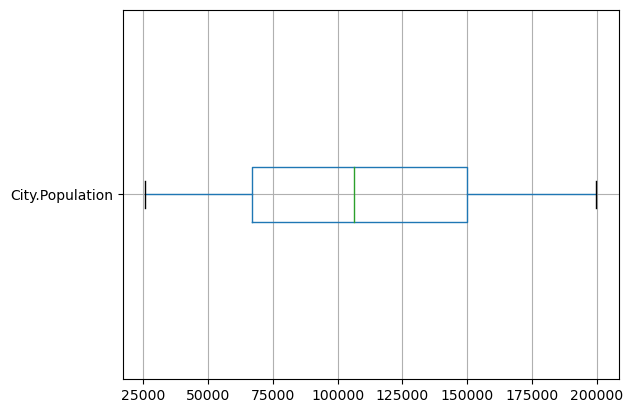

In [172]:
fraud.boxplot("City.Population",vert=False)

<AxesSubplot:>

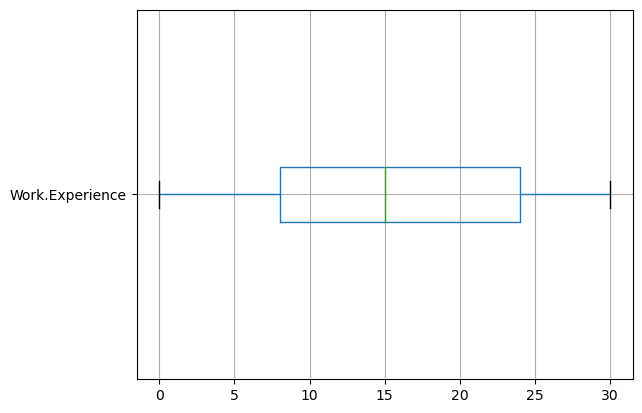

In [173]:
fraud.boxplot("Work.Experience",vert=False)

>> No ouliners

In [174]:
#Creating dummy vairables dropping first dummy variable
fraud =pd.get_dummies(fraud,columns=['Urban'] ,drop_first=True)

In [175]:
#Creating dummy vairables dropping first dummy variable
fraud =pd.get_dummies(fraud,columns=['Undergrad'] ,drop_first=True)

In [176]:
le = LabelEncoder()
le.fit_transform(fraud['Marital.Status'])

array([2, 0, 1, 2, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 1, 0, 0, 1, 0, 2, 2, 0,
       0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1, 2, 0,
       0, 1, 1, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1, 1, 0, 0, 2, 0,
       1, 1, 2, 2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2,
       1, 1, 0, 1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 1, 0, 0, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 0, 1, 2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 2, 1, 2, 2, 2,
       0, 2, 1, 0, 0, 2, 2, 0, 1, 1, 2, 2, 2, 0, 0, 0, 1, 2, 1, 2, 2, 0,
       2, 2, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 1, 1, 0, 2, 0, 1, 1, 2, 2, 2,
       1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 2, 2, 1, 2,
       2, 1, 2, 0, 2, 0, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 0,
       0, 2, 0, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 2, 0, 2, 2,
       0, 0, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 0, 1, 1, 2, 0, 1, 2, 0, 2, 1, 0, 0, 2,
       0, 2, 1, 2, 1, 2, 2, 0, 2, 1, 0, 1, 2, 2, 1,

In [177]:
fraud_new= fraud.copy()

In [178]:
fraud_new['Maritial'] = le.fit_transform(fraud['Marital.Status'])
fraud_new.head()

Marital.Status  Taxable.Income  City.Population  Work.Experience  Urban_YES  \
0         Single           68833            50047               10          1   
1       Divorced           33700           134075               18          1   
2        Married           36925           160205               30          1   
3         Single           50190           193264               15          1   
4        Married           81002            27533               28          0   

   Undergrad_YES  Maritial  
0              0         2  
1              1         0  
2              0         1  
3              1         2  
4              0         1

In [179]:
fraud_new.drop('Marital.Status',axis=1, inplace= True)

In [180]:
fraud_new.head()

Taxable.Income  City.Population  Work.Experience  Urban_YES  Undergrad_YES  \
0           68833            50047               10          1              0   
1           33700           134075               18          1              1   
2           36925           160205               30          1              0   
3           50190           193264               15          1              1   
4           81002            27533               28          0              0   

   Maritial  
0         2  
1         0  
2         1  
3         2  
4         1

In [181]:
fraud_new["income"]="<=30000"
fraud_new.loc[fraud_new["Taxable.Income"]>=30000,"income"]="Good"
fraud_new.loc[fraud_new["Taxable.Income"]<=30000,"income"]="Risky"

In [182]:
fraud_new.drop ('Taxable.Income', axis=1, inplace= True)

In [183]:
fraud_new.head()

City.Population  Work.Experience  Urban_YES  Undergrad_YES  Maritial income
0            50047               10          1              0         2   Good
1           134075               18          1              1         0   Good
2           160205               30          1              0         1   Good
3           193264               15          1              1         2   Good
4            27533               28          0              0         1   Good

In [184]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [185]:
# Normalized data frame (considering the numerical part of data)
fraud1 = norm_func(fraud_new.iloc[:,:2])
fraud1.head(10)

City.Population  Work.Experience
0         0.139472         0.333333
1         0.622394         0.600000
2         0.772568         1.000000
3         0.962563         0.500000
4         0.010081         0.933333
5         0.520710         0.000000
6         0.316732         0.266667
7         0.606176         0.100000
8         0.440819         0.400000
9         0.745424         0.133333

In [186]:
fraud_new.drop("City.Population", axis=1, inplace=True)
fraud_new.drop("Work.Experience", axis=1, inplace=True)

In [187]:
fraud_final= pd.concat([fraud1,fraud_new],axis=1)

In [188]:
fraud_final.head()

City.Population  Work.Experience  Urban_YES  Undergrad_YES  Maritial income
0         0.139472         0.333333          1              0         2   Good
1         0.622394         0.600000          1              1         0   Good
2         0.772568         1.000000          1              0         1   Good
3         0.962563         0.500000          1              1         2   Good
4         0.010081         0.933333          0              0         1   Good

In [189]:
fraud_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City.Population  600 non-null    float64
 1   Work.Experience  600 non-null    float64
 2   Urban_YES        600 non-null    uint8  
 3   Undergrad_YES    600 non-null    uint8  
 4   Maritial         600 non-null    int32  
 5   income           600 non-null    object 
dtypes: float64(2), int32(1), object(1), uint8(2)
memory usage: 17.7+ KB


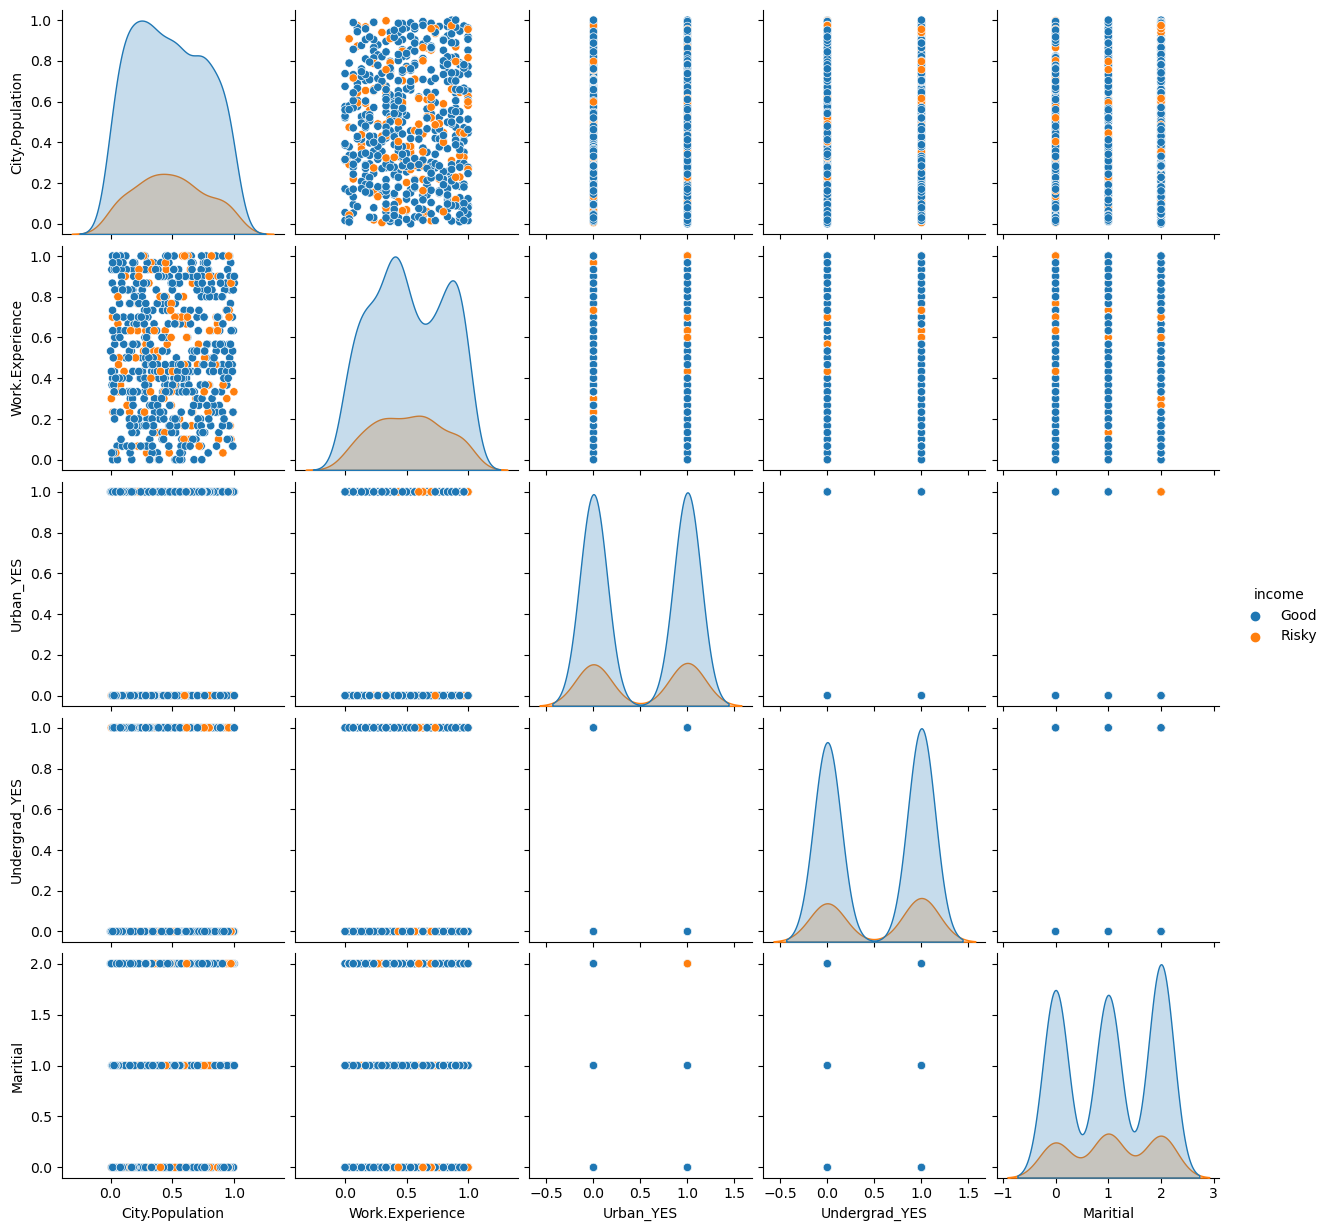

In [190]:
sns.pairplot(data=fraud_final, hue = 'income')

>> Pairplot shows people have more income (>30000) and work expierence plays vital role in it

In [191]:
fraud_final.corr()

City.Population  Work.Experience  Urban_YES  Undergrad_YES  \
City.Population         1.000000         0.013135  -0.040098       0.079579   
Work.Experience         0.013135         1.000000  -0.094559      -0.005362   
Urban_YES              -0.040098        -0.094559   1.000000      -0.000267   
Undergrad_YES           0.079579        -0.005362  -0.000267       1.000000   
Maritial               -0.001564        -0.002213   0.064562       0.042407   

                 Maritial  
City.Population -0.001564  
Work.Experience -0.002213  
Urban_YES        0.064562  
Undergrad_YES    0.042407  
Maritial         1.000000

<AxesSubplot:>

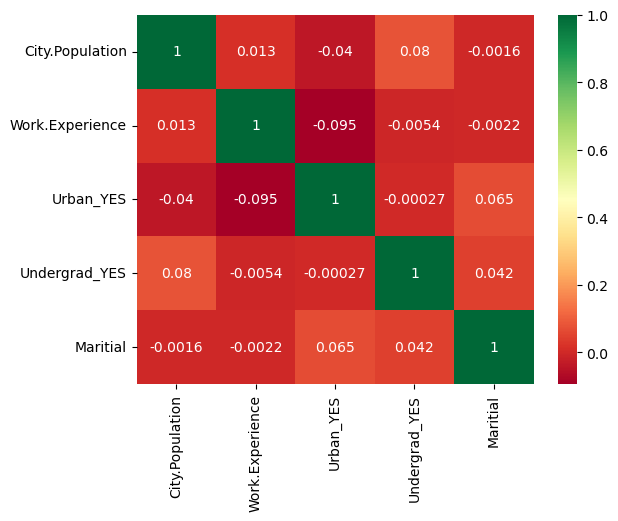

In [193]:
sns.heatmap(fraud_final.corr(),annot=True,cmap='RdYlGn')

In [194]:
le = LabelEncoder()
le.fit_transform(fraud_final['income'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [195]:
## Split into X and Y
X = fraud_final.drop("income",axis=1)
y = le.fit_transform(fraud_final['income'])

In [196]:
X.shape, y.shape

((600, 5), (600,))

In [197]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [198]:
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((480, 5), (480,), (120, 5), (120,))

## Random Forest Model without Paramters

In [199]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [200]:
Y_predtest=RF.predict(x_test)

In [201]:
Ac=accuracy_score(y_test,Y_predtest)

In [202]:
Ac

0.7583333333333333

## Grid Search Optimisation 

In [203]:
# Create the model
model = RandomForestClassifier() 

# Define the grid search parameters
tuned_paramerters= ({'n_estimators':[100,200,300,400,500],
                     'criterion':['gini','entropy'],
                     'max_depth':range(2,20),
                     'max_leaf_nodes':range(2,20)}) 

param_grid = tuned_paramerters

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)

In [40]:
grid_result= grid.fit(x_train,y_train)


Fitting 5 folds for each of 3240 candidates, totalling 16200 fits
[CV 1/5; 1/3240] START criterion=gini, max_depth=2, max_leaf_nodes=2, n_estimators=100
[CV 1/5; 1/3240] END criterion=gini, max_depth=2, max_leaf_nodes=2, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 1/3240] START criterion=gini, max_depth=2, max_leaf_nodes=2, n_estimators=100
[CV 2/5; 1/3240] END criterion=gini, max_depth=2, max_leaf_nodes=2, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 1/3240] START criterion=gini, max_depth=2, max_leaf_nodes=2, n_estimators=100
[CV 3/5; 1/3240] END criterion=gini, max_depth=2, max_leaf_nodes=2, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 1/3240] START criterion=gini, max_depth=2, max_leaf_nodes=2, n_estimators=100
[CV 4/5; 1/3240] END criterion=gini, max_depth=2, max_leaf_nodes=2, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 1/3240] START criterion=gini, max_depth=2, max_leaf_nodes=2, n_estimators=100
[CV 5/5; 1/3240] END criter

[CV 1/5; 9/3240] END criterion=gini, max_depth=2, max_leaf_nodes=3, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 9/3240] START criterion=gini, max_depth=2, max_leaf_nodes=3, n_estimators=400
[CV 2/5; 9/3240] END criterion=gini, max_depth=2, max_leaf_nodes=3, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 9/3240] START criterion=gini, max_depth=2, max_leaf_nodes=3, n_estimators=400
[CV 3/5; 9/3240] END criterion=gini, max_depth=2, max_leaf_nodes=3, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 9/3240] START criterion=gini, max_depth=2, max_leaf_nodes=3, n_estimators=400
[CV 4/5; 9/3240] END criterion=gini, max_depth=2, max_leaf_nodes=3, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 9/3240] START criterion=gini, max_depth=2, max_leaf_nodes=3, n_estimators=400
[CV 5/5; 9/3240] END criterion=gini, max_depth=2, max_leaf_nodes=3, n_estimators=400;, score=0.802 total time=   0.6s
[CV 1/5; 10/3240] START criterion=gini, max_depth=2, max_leaf_

[CV 1/5; 17/3240] END criterion=gini, max_depth=2, max_leaf_nodes=5, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 17/3240] START criterion=gini, max_depth=2, max_leaf_nodes=5, n_estimators=200
[CV 2/5; 17/3240] END criterion=gini, max_depth=2, max_leaf_nodes=5, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 17/3240] START criterion=gini, max_depth=2, max_leaf_nodes=5, n_estimators=200
[CV 3/5; 17/3240] END criterion=gini, max_depth=2, max_leaf_nodes=5, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 17/3240] START criterion=gini, max_depth=2, max_leaf_nodes=5, n_estimators=200
[CV 4/5; 17/3240] END criterion=gini, max_depth=2, max_leaf_nodes=5, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 17/3240] START criterion=gini, max_depth=2, max_leaf_nodes=5, n_estimators=200
[CV 5/5; 17/3240] END criterion=gini, max_depth=2, max_leaf_nodes=5, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 18/3240] START criterion=gini, max_depth=2, 

[CV 1/5; 25/3240] END criterion=gini, max_depth=2, max_leaf_nodes=6, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 25/3240] START criterion=gini, max_depth=2, max_leaf_nodes=6, n_estimators=500
[CV 2/5; 25/3240] END criterion=gini, max_depth=2, max_leaf_nodes=6, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 25/3240] START criterion=gini, max_depth=2, max_leaf_nodes=6, n_estimators=500
[CV 3/5; 25/3240] END criterion=gini, max_depth=2, max_leaf_nodes=6, n_estimators=500;, score=0.833 total time=   0.6s
[CV 4/5; 25/3240] START criterion=gini, max_depth=2, max_leaf_nodes=6, n_estimators=500
[CV 4/5; 25/3240] END criterion=gini, max_depth=2, max_leaf_nodes=6, n_estimators=500;, score=0.802 total time=   0.6s
[CV 5/5; 25/3240] START criterion=gini, max_depth=2, max_leaf_nodes=6, n_estimators=500
[CV 5/5; 25/3240] END criterion=gini, max_depth=2, max_leaf_nodes=6, n_estimators=500;, score=0.802 total time=   0.6s
[CV 1/5; 26/3240] START criterion=gini, max_depth=2, 

[CV 1/5; 33/3240] END criterion=gini, max_depth=2, max_leaf_nodes=8, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 33/3240] START criterion=gini, max_depth=2, max_leaf_nodes=8, n_estimators=300
[CV 2/5; 33/3240] END criterion=gini, max_depth=2, max_leaf_nodes=8, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 33/3240] START criterion=gini, max_depth=2, max_leaf_nodes=8, n_estimators=300
[CV 3/5; 33/3240] END criterion=gini, max_depth=2, max_leaf_nodes=8, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 33/3240] START criterion=gini, max_depth=2, max_leaf_nodes=8, n_estimators=300
[CV 4/5; 33/3240] END criterion=gini, max_depth=2, max_leaf_nodes=8, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 33/3240] START criterion=gini, max_depth=2, max_leaf_nodes=8, n_estimators=300
[CV 5/5; 33/3240] END criterion=gini, max_depth=2, max_leaf_nodes=8, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 34/3240] START criterion=gini, max_depth=2, 

[CV 2/5; 41/3240] END criterion=gini, max_depth=2, max_leaf_nodes=10, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 41/3240] START criterion=gini, max_depth=2, max_leaf_nodes=10, n_estimators=100
[CV 3/5; 41/3240] END criterion=gini, max_depth=2, max_leaf_nodes=10, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 41/3240] START criterion=gini, max_depth=2, max_leaf_nodes=10, n_estimators=100
[CV 4/5; 41/3240] END criterion=gini, max_depth=2, max_leaf_nodes=10, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 41/3240] START criterion=gini, max_depth=2, max_leaf_nodes=10, n_estimators=100
[CV 5/5; 41/3240] END criterion=gini, max_depth=2, max_leaf_nodes=10, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 42/3240] START criterion=gini, max_depth=2, max_leaf_nodes=10, n_estimators=200
[CV 1/5; 42/3240] END criterion=gini, max_depth=2, max_leaf_nodes=10, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 42/3240] START criterion=gini, max_

[CV 2/5; 49/3240] END criterion=gini, max_depth=2, max_leaf_nodes=11, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 49/3240] START criterion=gini, max_depth=2, max_leaf_nodes=11, n_estimators=400
[CV 3/5; 49/3240] END criterion=gini, max_depth=2, max_leaf_nodes=11, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 49/3240] START criterion=gini, max_depth=2, max_leaf_nodes=11, n_estimators=400
[CV 4/5; 49/3240] END criterion=gini, max_depth=2, max_leaf_nodes=11, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 49/3240] START criterion=gini, max_depth=2, max_leaf_nodes=11, n_estimators=400
[CV 5/5; 49/3240] END criterion=gini, max_depth=2, max_leaf_nodes=11, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 50/3240] START criterion=gini, max_depth=2, max_leaf_nodes=11, n_estimators=500
[CV 1/5; 50/3240] END criterion=gini, max_depth=2, max_leaf_nodes=11, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 50/3240] START criterion=gini, max_

[CV 2/5; 57/3240] END criterion=gini, max_depth=2, max_leaf_nodes=13, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 57/3240] START criterion=gini, max_depth=2, max_leaf_nodes=13, n_estimators=200
[CV 3/5; 57/3240] END criterion=gini, max_depth=2, max_leaf_nodes=13, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 57/3240] START criterion=gini, max_depth=2, max_leaf_nodes=13, n_estimators=200
[CV 4/5; 57/3240] END criterion=gini, max_depth=2, max_leaf_nodes=13, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 57/3240] START criterion=gini, max_depth=2, max_leaf_nodes=13, n_estimators=200
[CV 5/5; 57/3240] END criterion=gini, max_depth=2, max_leaf_nodes=13, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 58/3240] START criterion=gini, max_depth=2, max_leaf_nodes=13, n_estimators=300
[CV 1/5; 58/3240] END criterion=gini, max_depth=2, max_leaf_nodes=13, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 58/3240] START criterion=gini, max_

[CV 2/5; 65/3240] END criterion=gini, max_depth=2, max_leaf_nodes=14, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 65/3240] START criterion=gini, max_depth=2, max_leaf_nodes=14, n_estimators=500
[CV 3/5; 65/3240] END criterion=gini, max_depth=2, max_leaf_nodes=14, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 65/3240] START criterion=gini, max_depth=2, max_leaf_nodes=14, n_estimators=500
[CV 4/5; 65/3240] END criterion=gini, max_depth=2, max_leaf_nodes=14, n_estimators=500;, score=0.802 total time=   0.8s
[CV 5/5; 65/3240] START criterion=gini, max_depth=2, max_leaf_nodes=14, n_estimators=500
[CV 5/5; 65/3240] END criterion=gini, max_depth=2, max_leaf_nodes=14, n_estimators=500;, score=0.802 total time=   0.8s
[CV 1/5; 66/3240] START criterion=gini, max_depth=2, max_leaf_nodes=15, n_estimators=100
[CV 1/5; 66/3240] END criterion=gini, max_depth=2, max_leaf_nodes=15, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 66/3240] START criterion=gini, max_

[CV 2/5; 73/3240] END criterion=gini, max_depth=2, max_leaf_nodes=16, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 73/3240] START criterion=gini, max_depth=2, max_leaf_nodes=16, n_estimators=300
[CV 3/5; 73/3240] END criterion=gini, max_depth=2, max_leaf_nodes=16, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 73/3240] START criterion=gini, max_depth=2, max_leaf_nodes=16, n_estimators=300
[CV 4/5; 73/3240] END criterion=gini, max_depth=2, max_leaf_nodes=16, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 73/3240] START criterion=gini, max_depth=2, max_leaf_nodes=16, n_estimators=300
[CV 5/5; 73/3240] END criterion=gini, max_depth=2, max_leaf_nodes=16, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 74/3240] START criterion=gini, max_depth=2, max_leaf_nodes=16, n_estimators=400
[CV 1/5; 74/3240] END criterion=gini, max_depth=2, max_leaf_nodes=16, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 74/3240] START criterion=gini, max_

[CV 2/5; 81/3240] END criterion=gini, max_depth=2, max_leaf_nodes=18, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 81/3240] START criterion=gini, max_depth=2, max_leaf_nodes=18, n_estimators=100
[CV 3/5; 81/3240] END criterion=gini, max_depth=2, max_leaf_nodes=18, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 81/3240] START criterion=gini, max_depth=2, max_leaf_nodes=18, n_estimators=100
[CV 4/5; 81/3240] END criterion=gini, max_depth=2, max_leaf_nodes=18, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 81/3240] START criterion=gini, max_depth=2, max_leaf_nodes=18, n_estimators=100
[CV 5/5; 81/3240] END criterion=gini, max_depth=2, max_leaf_nodes=18, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 82/3240] START criterion=gini, max_depth=2, max_leaf_nodes=18, n_estimators=200
[CV 1/5; 82/3240] END criterion=gini, max_depth=2, max_leaf_nodes=18, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 82/3240] START criterion=gini, max_

[CV 2/5; 89/3240] END criterion=gini, max_depth=2, max_leaf_nodes=19, n_estimators=400;, score=0.760 total time=   0.6s
[CV 3/5; 89/3240] START criterion=gini, max_depth=2, max_leaf_nodes=19, n_estimators=400
[CV 3/5; 89/3240] END criterion=gini, max_depth=2, max_leaf_nodes=19, n_estimators=400;, score=0.833 total time=   0.6s
[CV 4/5; 89/3240] START criterion=gini, max_depth=2, max_leaf_nodes=19, n_estimators=400
[CV 4/5; 89/3240] END criterion=gini, max_depth=2, max_leaf_nodes=19, n_estimators=400;, score=0.802 total time=   0.6s
[CV 5/5; 89/3240] START criterion=gini, max_depth=2, max_leaf_nodes=19, n_estimators=400
[CV 5/5; 89/3240] END criterion=gini, max_depth=2, max_leaf_nodes=19, n_estimators=400;, score=0.802 total time=   0.6s
[CV 1/5; 90/3240] START criterion=gini, max_depth=2, max_leaf_nodes=19, n_estimators=500
[CV 1/5; 90/3240] END criterion=gini, max_depth=2, max_leaf_nodes=19, n_estimators=500;, score=0.781 total time=   0.8s
[CV 2/5; 90/3240] START criterion=gini, max_

[CV 2/5; 97/3240] END criterion=gini, max_depth=3, max_leaf_nodes=3, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 97/3240] START criterion=gini, max_depth=3, max_leaf_nodes=3, n_estimators=200
[CV 3/5; 97/3240] END criterion=gini, max_depth=3, max_leaf_nodes=3, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 97/3240] START criterion=gini, max_depth=3, max_leaf_nodes=3, n_estimators=200
[CV 4/5; 97/3240] END criterion=gini, max_depth=3, max_leaf_nodes=3, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 97/3240] START criterion=gini, max_depth=3, max_leaf_nodes=3, n_estimators=200
[CV 5/5; 97/3240] END criterion=gini, max_depth=3, max_leaf_nodes=3, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 98/3240] START criterion=gini, max_depth=3, max_leaf_nodes=3, n_estimators=300
[CV 1/5; 98/3240] END criterion=gini, max_depth=3, max_leaf_nodes=3, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 98/3240] START criterion=gini, max_depth=3, 

[CV 2/5; 105/3240] END criterion=gini, max_depth=3, max_leaf_nodes=4, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 105/3240] START criterion=gini, max_depth=3, max_leaf_nodes=4, n_estimators=500
[CV 3/5; 105/3240] END criterion=gini, max_depth=3, max_leaf_nodes=4, n_estimators=500;, score=0.833 total time=   1.0s
[CV 4/5; 105/3240] START criterion=gini, max_depth=3, max_leaf_nodes=4, n_estimators=500
[CV 4/5; 105/3240] END criterion=gini, max_depth=3, max_leaf_nodes=4, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 105/3240] START criterion=gini, max_depth=3, max_leaf_nodes=4, n_estimators=500
[CV 5/5; 105/3240] END criterion=gini, max_depth=3, max_leaf_nodes=4, n_estimators=500;, score=0.802 total time=   0.8s
[CV 1/5; 106/3240] START criterion=gini, max_depth=3, max_leaf_nodes=5, n_estimators=100
[CV 1/5; 106/3240] END criterion=gini, max_depth=3, max_leaf_nodes=5, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 106/3240] START criterion=gini, max

[CV 2/5; 113/3240] END criterion=gini, max_depth=3, max_leaf_nodes=6, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 113/3240] START criterion=gini, max_depth=3, max_leaf_nodes=6, n_estimators=300
[CV 3/5; 113/3240] END criterion=gini, max_depth=3, max_leaf_nodes=6, n_estimators=300;, score=0.833 total time=   0.5s
[CV 4/5; 113/3240] START criterion=gini, max_depth=3, max_leaf_nodes=6, n_estimators=300
[CV 4/5; 113/3240] END criterion=gini, max_depth=3, max_leaf_nodes=6, n_estimators=300;, score=0.802 total time=   0.6s
[CV 5/5; 113/3240] START criterion=gini, max_depth=3, max_leaf_nodes=6, n_estimators=300
[CV 5/5; 113/3240] END criterion=gini, max_depth=3, max_leaf_nodes=6, n_estimators=300;, score=0.802 total time=   0.5s
[CV 1/5; 114/3240] START criterion=gini, max_depth=3, max_leaf_nodes=6, n_estimators=400
[CV 1/5; 114/3240] END criterion=gini, max_depth=3, max_leaf_nodes=6, n_estimators=400;, score=0.781 total time=   0.6s
[CV 2/5; 114/3240] START criterion=gini, max

[CV 2/5; 121/3240] END criterion=gini, max_depth=3, max_leaf_nodes=8, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 121/3240] START criterion=gini, max_depth=3, max_leaf_nodes=8, n_estimators=100
[CV 3/5; 121/3240] END criterion=gini, max_depth=3, max_leaf_nodes=8, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 121/3240] START criterion=gini, max_depth=3, max_leaf_nodes=8, n_estimators=100
[CV 4/5; 121/3240] END criterion=gini, max_depth=3, max_leaf_nodes=8, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 121/3240] START criterion=gini, max_depth=3, max_leaf_nodes=8, n_estimators=100
[CV 5/5; 121/3240] END criterion=gini, max_depth=3, max_leaf_nodes=8, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 122/3240] START criterion=gini, max_depth=3, max_leaf_nodes=8, n_estimators=200
[CV 1/5; 122/3240] END criterion=gini, max_depth=3, max_leaf_nodes=8, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 122/3240] START criterion=gini, max

[CV 2/5; 129/3240] END criterion=gini, max_depth=3, max_leaf_nodes=9, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 129/3240] START criterion=gini, max_depth=3, max_leaf_nodes=9, n_estimators=400
[CV 3/5; 129/3240] END criterion=gini, max_depth=3, max_leaf_nodes=9, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 129/3240] START criterion=gini, max_depth=3, max_leaf_nodes=9, n_estimators=400
[CV 4/5; 129/3240] END criterion=gini, max_depth=3, max_leaf_nodes=9, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 129/3240] START criterion=gini, max_depth=3, max_leaf_nodes=9, n_estimators=400
[CV 5/5; 129/3240] END criterion=gini, max_depth=3, max_leaf_nodes=9, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 130/3240] START criterion=gini, max_depth=3, max_leaf_nodes=9, n_estimators=500
[CV 1/5; 130/3240] END criterion=gini, max_depth=3, max_leaf_nodes=9, n_estimators=500;, score=0.781 total time=   0.6s
[CV 2/5; 130/3240] START criterion=gini, max

[CV 1/5; 137/3240] END criterion=gini, max_depth=3, max_leaf_nodes=11, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 137/3240] START criterion=gini, max_depth=3, max_leaf_nodes=11, n_estimators=200
[CV 2/5; 137/3240] END criterion=gini, max_depth=3, max_leaf_nodes=11, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 137/3240] START criterion=gini, max_depth=3, max_leaf_nodes=11, n_estimators=200
[CV 3/5; 137/3240] END criterion=gini, max_depth=3, max_leaf_nodes=11, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 137/3240] START criterion=gini, max_depth=3, max_leaf_nodes=11, n_estimators=200
[CV 4/5; 137/3240] END criterion=gini, max_depth=3, max_leaf_nodes=11, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 137/3240] START criterion=gini, max_depth=3, max_leaf_nodes=11, n_estimators=200
[CV 5/5; 137/3240] END criterion=gini, max_depth=3, max_leaf_nodes=11, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 138/3240] START criterion=

[CV 5/5; 144/3240] END criterion=gini, max_depth=3, max_leaf_nodes=12, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 145/3240] START criterion=gini, max_depth=3, max_leaf_nodes=12, n_estimators=500
[CV 1/5; 145/3240] END criterion=gini, max_depth=3, max_leaf_nodes=12, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 145/3240] START criterion=gini, max_depth=3, max_leaf_nodes=12, n_estimators=500
[CV 2/5; 145/3240] END criterion=gini, max_depth=3, max_leaf_nodes=12, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 145/3240] START criterion=gini, max_depth=3, max_leaf_nodes=12, n_estimators=500
[CV 3/5; 145/3240] END criterion=gini, max_depth=3, max_leaf_nodes=12, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 145/3240] START criterion=gini, max_depth=3, max_leaf_nodes=12, n_estimators=500
[CV 4/5; 145/3240] END criterion=gini, max_depth=3, max_leaf_nodes=12, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 145/3240] START criterion=

[CV 4/5; 152/3240] END criterion=gini, max_depth=3, max_leaf_nodes=14, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 152/3240] START criterion=gini, max_depth=3, max_leaf_nodes=14, n_estimators=200
[CV 5/5; 152/3240] END criterion=gini, max_depth=3, max_leaf_nodes=14, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 153/3240] START criterion=gini, max_depth=3, max_leaf_nodes=14, n_estimators=300
[CV 1/5; 153/3240] END criterion=gini, max_depth=3, max_leaf_nodes=14, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 153/3240] START criterion=gini, max_depth=3, max_leaf_nodes=14, n_estimators=300
[CV 2/5; 153/3240] END criterion=gini, max_depth=3, max_leaf_nodes=14, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 153/3240] START criterion=gini, max_depth=3, max_leaf_nodes=14, n_estimators=300
[CV 3/5; 153/3240] END criterion=gini, max_depth=3, max_leaf_nodes=14, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 153/3240] START criterion=

[CV 3/5; 160/3240] END criterion=gini, max_depth=3, max_leaf_nodes=15, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 160/3240] START criterion=gini, max_depth=3, max_leaf_nodes=15, n_estimators=500
[CV 4/5; 160/3240] END criterion=gini, max_depth=3, max_leaf_nodes=15, n_estimators=500;, score=0.802 total time=   0.6s
[CV 5/5; 160/3240] START criterion=gini, max_depth=3, max_leaf_nodes=15, n_estimators=500
[CV 5/5; 160/3240] END criterion=gini, max_depth=3, max_leaf_nodes=15, n_estimators=500;, score=0.802 total time=   0.8s
[CV 1/5; 161/3240] START criterion=gini, max_depth=3, max_leaf_nodes=16, n_estimators=100
[CV 1/5; 161/3240] END criterion=gini, max_depth=3, max_leaf_nodes=16, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 161/3240] START criterion=gini, max_depth=3, max_leaf_nodes=16, n_estimators=100
[CV 2/5; 161/3240] END criterion=gini, max_depth=3, max_leaf_nodes=16, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 161/3240] START criterion=

[CV 2/5; 168/3240] END criterion=gini, max_depth=3, max_leaf_nodes=17, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 168/3240] START criterion=gini, max_depth=3, max_leaf_nodes=17, n_estimators=300
[CV 3/5; 168/3240] END criterion=gini, max_depth=3, max_leaf_nodes=17, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 168/3240] START criterion=gini, max_depth=3, max_leaf_nodes=17, n_estimators=300
[CV 4/5; 168/3240] END criterion=gini, max_depth=3, max_leaf_nodes=17, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 168/3240] START criterion=gini, max_depth=3, max_leaf_nodes=17, n_estimators=300
[CV 5/5; 168/3240] END criterion=gini, max_depth=3, max_leaf_nodes=17, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 169/3240] START criterion=gini, max_depth=3, max_leaf_nodes=17, n_estimators=400
[CV 1/5; 169/3240] END criterion=gini, max_depth=3, max_leaf_nodes=17, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 169/3240] START criterion=

[CV 2/5; 176/3240] END criterion=gini, max_depth=3, max_leaf_nodes=19, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 176/3240] START criterion=gini, max_depth=3, max_leaf_nodes=19, n_estimators=100
[CV 3/5; 176/3240] END criterion=gini, max_depth=3, max_leaf_nodes=19, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 176/3240] START criterion=gini, max_depth=3, max_leaf_nodes=19, n_estimators=100
[CV 4/5; 176/3240] END criterion=gini, max_depth=3, max_leaf_nodes=19, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 176/3240] START criterion=gini, max_depth=3, max_leaf_nodes=19, n_estimators=100
[CV 5/5; 176/3240] END criterion=gini, max_depth=3, max_leaf_nodes=19, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 177/3240] START criterion=gini, max_depth=3, max_leaf_nodes=19, n_estimators=200
[CV 1/5; 177/3240] END criterion=gini, max_depth=3, max_leaf_nodes=19, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 177/3240] START criterion=

[CV 1/5; 184/3240] END criterion=gini, max_depth=4, max_leaf_nodes=2, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 184/3240] START criterion=gini, max_depth=4, max_leaf_nodes=2, n_estimators=400
[CV 2/5; 184/3240] END criterion=gini, max_depth=4, max_leaf_nodes=2, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 184/3240] START criterion=gini, max_depth=4, max_leaf_nodes=2, n_estimators=400
[CV 3/5; 184/3240] END criterion=gini, max_depth=4, max_leaf_nodes=2, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 184/3240] START criterion=gini, max_depth=4, max_leaf_nodes=2, n_estimators=400
[CV 4/5; 184/3240] END criterion=gini, max_depth=4, max_leaf_nodes=2, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 184/3240] START criterion=gini, max_depth=4, max_leaf_nodes=2, n_estimators=400
[CV 5/5; 184/3240] END criterion=gini, max_depth=4, max_leaf_nodes=2, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 185/3240] START criterion=gini, max

[CV 1/5; 192/3240] END criterion=gini, max_depth=4, max_leaf_nodes=4, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 192/3240] START criterion=gini, max_depth=4, max_leaf_nodes=4, n_estimators=200
[CV 2/5; 192/3240] END criterion=gini, max_depth=4, max_leaf_nodes=4, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 192/3240] START criterion=gini, max_depth=4, max_leaf_nodes=4, n_estimators=200
[CV 3/5; 192/3240] END criterion=gini, max_depth=4, max_leaf_nodes=4, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 192/3240] START criterion=gini, max_depth=4, max_leaf_nodes=4, n_estimators=200
[CV 4/5; 192/3240] END criterion=gini, max_depth=4, max_leaf_nodes=4, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 192/3240] START criterion=gini, max_depth=4, max_leaf_nodes=4, n_estimators=200
[CV 5/5; 192/3240] END criterion=gini, max_depth=4, max_leaf_nodes=4, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 193/3240] START criterion=gini, max

[CV 1/5; 200/3240] END criterion=gini, max_depth=4, max_leaf_nodes=5, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 200/3240] START criterion=gini, max_depth=4, max_leaf_nodes=5, n_estimators=500
[CV 2/5; 200/3240] END criterion=gini, max_depth=4, max_leaf_nodes=5, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 200/3240] START criterion=gini, max_depth=4, max_leaf_nodes=5, n_estimators=500
[CV 3/5; 200/3240] END criterion=gini, max_depth=4, max_leaf_nodes=5, n_estimators=500;, score=0.833 total time=   0.6s
[CV 4/5; 200/3240] START criterion=gini, max_depth=4, max_leaf_nodes=5, n_estimators=500
[CV 4/5; 200/3240] END criterion=gini, max_depth=4, max_leaf_nodes=5, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 200/3240] START criterion=gini, max_depth=4, max_leaf_nodes=5, n_estimators=500
[CV 5/5; 200/3240] END criterion=gini, max_depth=4, max_leaf_nodes=5, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 201/3240] START criterion=gini, max

[CV 1/5; 208/3240] END criterion=gini, max_depth=4, max_leaf_nodes=7, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 208/3240] START criterion=gini, max_depth=4, max_leaf_nodes=7, n_estimators=300
[CV 2/5; 208/3240] END criterion=gini, max_depth=4, max_leaf_nodes=7, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 208/3240] START criterion=gini, max_depth=4, max_leaf_nodes=7, n_estimators=300
[CV 3/5; 208/3240] END criterion=gini, max_depth=4, max_leaf_nodes=7, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 208/3240] START criterion=gini, max_depth=4, max_leaf_nodes=7, n_estimators=300
[CV 4/5; 208/3240] END criterion=gini, max_depth=4, max_leaf_nodes=7, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 208/3240] START criterion=gini, max_depth=4, max_leaf_nodes=7, n_estimators=300
[CV 5/5; 208/3240] END criterion=gini, max_depth=4, max_leaf_nodes=7, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 209/3240] START criterion=gini, max

[CV 2/5; 216/3240] END criterion=gini, max_depth=4, max_leaf_nodes=9, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 216/3240] START criterion=gini, max_depth=4, max_leaf_nodes=9, n_estimators=100
[CV 3/5; 216/3240] END criterion=gini, max_depth=4, max_leaf_nodes=9, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 216/3240] START criterion=gini, max_depth=4, max_leaf_nodes=9, n_estimators=100
[CV 4/5; 216/3240] END criterion=gini, max_depth=4, max_leaf_nodes=9, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 216/3240] START criterion=gini, max_depth=4, max_leaf_nodes=9, n_estimators=100
[CV 5/5; 216/3240] END criterion=gini, max_depth=4, max_leaf_nodes=9, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 217/3240] START criterion=gini, max_depth=4, max_leaf_nodes=9, n_estimators=200
[CV 1/5; 217/3240] END criterion=gini, max_depth=4, max_leaf_nodes=9, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 217/3240] START criterion=gini, max

[CV 2/5; 224/3240] END criterion=gini, max_depth=4, max_leaf_nodes=10, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 224/3240] START criterion=gini, max_depth=4, max_leaf_nodes=10, n_estimators=400
[CV 3/5; 224/3240] END criterion=gini, max_depth=4, max_leaf_nodes=10, n_estimators=400;, score=0.833 total time=   0.6s
[CV 4/5; 224/3240] START criterion=gini, max_depth=4, max_leaf_nodes=10, n_estimators=400
[CV 4/5; 224/3240] END criterion=gini, max_depth=4, max_leaf_nodes=10, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 224/3240] START criterion=gini, max_depth=4, max_leaf_nodes=10, n_estimators=400
[CV 5/5; 224/3240] END criterion=gini, max_depth=4, max_leaf_nodes=10, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 225/3240] START criterion=gini, max_depth=4, max_leaf_nodes=10, n_estimators=500
[CV 1/5; 225/3240] END criterion=gini, max_depth=4, max_leaf_nodes=10, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 225/3240] START criterion=

[CV 1/5; 232/3240] END criterion=gini, max_depth=4, max_leaf_nodes=12, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 232/3240] START criterion=gini, max_depth=4, max_leaf_nodes=12, n_estimators=200
[CV 2/5; 232/3240] END criterion=gini, max_depth=4, max_leaf_nodes=12, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 232/3240] START criterion=gini, max_depth=4, max_leaf_nodes=12, n_estimators=200
[CV 3/5; 232/3240] END criterion=gini, max_depth=4, max_leaf_nodes=12, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 232/3240] START criterion=gini, max_depth=4, max_leaf_nodes=12, n_estimators=200
[CV 4/5; 232/3240] END criterion=gini, max_depth=4, max_leaf_nodes=12, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 232/3240] START criterion=gini, max_depth=4, max_leaf_nodes=12, n_estimators=200
[CV 5/5; 232/3240] END criterion=gini, max_depth=4, max_leaf_nodes=12, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 233/3240] START criterion=

[CV 5/5; 239/3240] END criterion=gini, max_depth=4, max_leaf_nodes=13, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 240/3240] START criterion=gini, max_depth=4, max_leaf_nodes=13, n_estimators=500
[CV 1/5; 240/3240] END criterion=gini, max_depth=4, max_leaf_nodes=13, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 240/3240] START criterion=gini, max_depth=4, max_leaf_nodes=13, n_estimators=500
[CV 2/5; 240/3240] END criterion=gini, max_depth=4, max_leaf_nodes=13, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 240/3240] START criterion=gini, max_depth=4, max_leaf_nodes=13, n_estimators=500
[CV 3/5; 240/3240] END criterion=gini, max_depth=4, max_leaf_nodes=13, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 240/3240] START criterion=gini, max_depth=4, max_leaf_nodes=13, n_estimators=500
[CV 4/5; 240/3240] END criterion=gini, max_depth=4, max_leaf_nodes=13, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 240/3240] START criterion=

[CV 4/5; 247/3240] END criterion=gini, max_depth=4, max_leaf_nodes=15, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 247/3240] START criterion=gini, max_depth=4, max_leaf_nodes=15, n_estimators=200
[CV 5/5; 247/3240] END criterion=gini, max_depth=4, max_leaf_nodes=15, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 248/3240] START criterion=gini, max_depth=4, max_leaf_nodes=15, n_estimators=300
[CV 1/5; 248/3240] END criterion=gini, max_depth=4, max_leaf_nodes=15, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 248/3240] START criterion=gini, max_depth=4, max_leaf_nodes=15, n_estimators=300
[CV 2/5; 248/3240] END criterion=gini, max_depth=4, max_leaf_nodes=15, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 248/3240] START criterion=gini, max_depth=4, max_leaf_nodes=15, n_estimators=300
[CV 3/5; 248/3240] END criterion=gini, max_depth=4, max_leaf_nodes=15, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 248/3240] START criterion=

[CV 3/5; 255/3240] END criterion=gini, max_depth=4, max_leaf_nodes=16, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 255/3240] START criterion=gini, max_depth=4, max_leaf_nodes=16, n_estimators=500
[CV 4/5; 255/3240] END criterion=gini, max_depth=4, max_leaf_nodes=16, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 255/3240] START criterion=gini, max_depth=4, max_leaf_nodes=16, n_estimators=500
[CV 5/5; 255/3240] END criterion=gini, max_depth=4, max_leaf_nodes=16, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 256/3240] START criterion=gini, max_depth=4, max_leaf_nodes=17, n_estimators=100
[CV 1/5; 256/3240] END criterion=gini, max_depth=4, max_leaf_nodes=17, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 256/3240] START criterion=gini, max_depth=4, max_leaf_nodes=17, n_estimators=100
[CV 2/5; 256/3240] END criterion=gini, max_depth=4, max_leaf_nodes=17, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 256/3240] START criterion=

[CV 2/5; 263/3240] END criterion=gini, max_depth=4, max_leaf_nodes=18, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 263/3240] START criterion=gini, max_depth=4, max_leaf_nodes=18, n_estimators=300
[CV 3/5; 263/3240] END criterion=gini, max_depth=4, max_leaf_nodes=18, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 263/3240] START criterion=gini, max_depth=4, max_leaf_nodes=18, n_estimators=300
[CV 4/5; 263/3240] END criterion=gini, max_depth=4, max_leaf_nodes=18, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 263/3240] START criterion=gini, max_depth=4, max_leaf_nodes=18, n_estimators=300
[CV 5/5; 263/3240] END criterion=gini, max_depth=4, max_leaf_nodes=18, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 264/3240] START criterion=gini, max_depth=4, max_leaf_nodes=18, n_estimators=400
[CV 1/5; 264/3240] END criterion=gini, max_depth=4, max_leaf_nodes=18, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 264/3240] START criterion=

[CV 2/5; 271/3240] END criterion=gini, max_depth=5, max_leaf_nodes=2, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 271/3240] START criterion=gini, max_depth=5, max_leaf_nodes=2, n_estimators=100
[CV 3/5; 271/3240] END criterion=gini, max_depth=5, max_leaf_nodes=2, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 271/3240] START criterion=gini, max_depth=5, max_leaf_nodes=2, n_estimators=100
[CV 4/5; 271/3240] END criterion=gini, max_depth=5, max_leaf_nodes=2, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 271/3240] START criterion=gini, max_depth=5, max_leaf_nodes=2, n_estimators=100
[CV 5/5; 271/3240] END criterion=gini, max_depth=5, max_leaf_nodes=2, n_estimators=100;, score=0.802 total time=   0.0s
[CV 1/5; 272/3240] START criterion=gini, max_depth=5, max_leaf_nodes=2, n_estimators=200
[CV 1/5; 272/3240] END criterion=gini, max_depth=5, max_leaf_nodes=2, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 272/3240] START criterion=gini, max

[CV 2/5; 279/3240] END criterion=gini, max_depth=5, max_leaf_nodes=3, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 279/3240] START criterion=gini, max_depth=5, max_leaf_nodes=3, n_estimators=400
[CV 3/5; 279/3240] END criterion=gini, max_depth=5, max_leaf_nodes=3, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 279/3240] START criterion=gini, max_depth=5, max_leaf_nodes=3, n_estimators=400
[CV 4/5; 279/3240] END criterion=gini, max_depth=5, max_leaf_nodes=3, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 279/3240] START criterion=gini, max_depth=5, max_leaf_nodes=3, n_estimators=400
[CV 5/5; 279/3240] END criterion=gini, max_depth=5, max_leaf_nodes=3, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 280/3240] START criterion=gini, max_depth=5, max_leaf_nodes=3, n_estimators=500
[CV 1/5; 280/3240] END criterion=gini, max_depth=5, max_leaf_nodes=3, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 280/3240] START criterion=gini, max

[CV 2/5; 287/3240] END criterion=gini, max_depth=5, max_leaf_nodes=5, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 287/3240] START criterion=gini, max_depth=5, max_leaf_nodes=5, n_estimators=200
[CV 3/5; 287/3240] END criterion=gini, max_depth=5, max_leaf_nodes=5, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 287/3240] START criterion=gini, max_depth=5, max_leaf_nodes=5, n_estimators=200
[CV 4/5; 287/3240] END criterion=gini, max_depth=5, max_leaf_nodes=5, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 287/3240] START criterion=gini, max_depth=5, max_leaf_nodes=5, n_estimators=200
[CV 5/5; 287/3240] END criterion=gini, max_depth=5, max_leaf_nodes=5, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 288/3240] START criterion=gini, max_depth=5, max_leaf_nodes=5, n_estimators=300
[CV 1/5; 288/3240] END criterion=gini, max_depth=5, max_leaf_nodes=5, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 288/3240] START criterion=gini, max

[CV 2/5; 295/3240] END criterion=gini, max_depth=5, max_leaf_nodes=6, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 295/3240] START criterion=gini, max_depth=5, max_leaf_nodes=6, n_estimators=500
[CV 3/5; 295/3240] END criterion=gini, max_depth=5, max_leaf_nodes=6, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 295/3240] START criterion=gini, max_depth=5, max_leaf_nodes=6, n_estimators=500
[CV 4/5; 295/3240] END criterion=gini, max_depth=5, max_leaf_nodes=6, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 295/3240] START criterion=gini, max_depth=5, max_leaf_nodes=6, n_estimators=500
[CV 5/5; 295/3240] END criterion=gini, max_depth=5, max_leaf_nodes=6, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 296/3240] START criterion=gini, max_depth=5, max_leaf_nodes=7, n_estimators=100
[CV 1/5; 296/3240] END criterion=gini, max_depth=5, max_leaf_nodes=7, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 296/3240] START criterion=gini, max

[CV 2/5; 303/3240] END criterion=gini, max_depth=5, max_leaf_nodes=8, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 303/3240] START criterion=gini, max_depth=5, max_leaf_nodes=8, n_estimators=300
[CV 3/5; 303/3240] END criterion=gini, max_depth=5, max_leaf_nodes=8, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 303/3240] START criterion=gini, max_depth=5, max_leaf_nodes=8, n_estimators=300
[CV 4/5; 303/3240] END criterion=gini, max_depth=5, max_leaf_nodes=8, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 303/3240] START criterion=gini, max_depth=5, max_leaf_nodes=8, n_estimators=300
[CV 5/5; 303/3240] END criterion=gini, max_depth=5, max_leaf_nodes=8, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 304/3240] START criterion=gini, max_depth=5, max_leaf_nodes=8, n_estimators=400
[CV 1/5; 304/3240] END criterion=gini, max_depth=5, max_leaf_nodes=8, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 304/3240] START criterion=gini, max

[CV 2/5; 311/3240] END criterion=gini, max_depth=5, max_leaf_nodes=10, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 311/3240] START criterion=gini, max_depth=5, max_leaf_nodes=10, n_estimators=100
[CV 3/5; 311/3240] END criterion=gini, max_depth=5, max_leaf_nodes=10, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 311/3240] START criterion=gini, max_depth=5, max_leaf_nodes=10, n_estimators=100
[CV 4/5; 311/3240] END criterion=gini, max_depth=5, max_leaf_nodes=10, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 311/3240] START criterion=gini, max_depth=5, max_leaf_nodes=10, n_estimators=100
[CV 5/5; 311/3240] END criterion=gini, max_depth=5, max_leaf_nodes=10, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 312/3240] START criterion=gini, max_depth=5, max_leaf_nodes=10, n_estimators=200
[CV 1/5; 312/3240] END criterion=gini, max_depth=5, max_leaf_nodes=10, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 312/3240] START criterion=

[CV 1/5; 319/3240] END criterion=gini, max_depth=5, max_leaf_nodes=11, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 319/3240] START criterion=gini, max_depth=5, max_leaf_nodes=11, n_estimators=400
[CV 2/5; 319/3240] END criterion=gini, max_depth=5, max_leaf_nodes=11, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 319/3240] START criterion=gini, max_depth=5, max_leaf_nodes=11, n_estimators=400
[CV 3/5; 319/3240] END criterion=gini, max_depth=5, max_leaf_nodes=11, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 319/3240] START criterion=gini, max_depth=5, max_leaf_nodes=11, n_estimators=400
[CV 4/5; 319/3240] END criterion=gini, max_depth=5, max_leaf_nodes=11, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 319/3240] START criterion=gini, max_depth=5, max_leaf_nodes=11, n_estimators=400
[CV 5/5; 319/3240] END criterion=gini, max_depth=5, max_leaf_nodes=11, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 320/3240] START criterion=

[CV 1/5; 327/3240] END criterion=gini, max_depth=5, max_leaf_nodes=13, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 327/3240] START criterion=gini, max_depth=5, max_leaf_nodes=13, n_estimators=200
[CV 2/5; 327/3240] END criterion=gini, max_depth=5, max_leaf_nodes=13, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 327/3240] START criterion=gini, max_depth=5, max_leaf_nodes=13, n_estimators=200
[CV 3/5; 327/3240] END criterion=gini, max_depth=5, max_leaf_nodes=13, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 327/3240] START criterion=gini, max_depth=5, max_leaf_nodes=13, n_estimators=200
[CV 4/5; 327/3240] END criterion=gini, max_depth=5, max_leaf_nodes=13, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 327/3240] START criterion=gini, max_depth=5, max_leaf_nodes=13, n_estimators=200
[CV 5/5; 327/3240] END criterion=gini, max_depth=5, max_leaf_nodes=13, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 328/3240] START criterion=

[CV 5/5; 334/3240] END criterion=gini, max_depth=5, max_leaf_nodes=14, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 335/3240] START criterion=gini, max_depth=5, max_leaf_nodes=14, n_estimators=500
[CV 1/5; 335/3240] END criterion=gini, max_depth=5, max_leaf_nodes=14, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 335/3240] START criterion=gini, max_depth=5, max_leaf_nodes=14, n_estimators=500
[CV 2/5; 335/3240] END criterion=gini, max_depth=5, max_leaf_nodes=14, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 335/3240] START criterion=gini, max_depth=5, max_leaf_nodes=14, n_estimators=500
[CV 3/5; 335/3240] END criterion=gini, max_depth=5, max_leaf_nodes=14, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 335/3240] START criterion=gini, max_depth=5, max_leaf_nodes=14, n_estimators=500
[CV 4/5; 335/3240] END criterion=gini, max_depth=5, max_leaf_nodes=14, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 335/3240] START criterion=

[CV 4/5; 342/3240] END criterion=gini, max_depth=5, max_leaf_nodes=16, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 342/3240] START criterion=gini, max_depth=5, max_leaf_nodes=16, n_estimators=200
[CV 5/5; 342/3240] END criterion=gini, max_depth=5, max_leaf_nodes=16, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 343/3240] START criterion=gini, max_depth=5, max_leaf_nodes=16, n_estimators=300
[CV 1/5; 343/3240] END criterion=gini, max_depth=5, max_leaf_nodes=16, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 343/3240] START criterion=gini, max_depth=5, max_leaf_nodes=16, n_estimators=300
[CV 2/5; 343/3240] END criterion=gini, max_depth=5, max_leaf_nodes=16, n_estimators=300;, score=0.760 total time=   0.5s
[CV 3/5; 343/3240] START criterion=gini, max_depth=5, max_leaf_nodes=16, n_estimators=300
[CV 3/5; 343/3240] END criterion=gini, max_depth=5, max_leaf_nodes=16, n_estimators=300;, score=0.833 total time=   0.5s
[CV 4/5; 343/3240] START criterion=

[CV 3/5; 350/3240] END criterion=gini, max_depth=5, max_leaf_nodes=17, n_estimators=500;, score=0.833 total time=   0.8s
[CV 4/5; 350/3240] START criterion=gini, max_depth=5, max_leaf_nodes=17, n_estimators=500
[CV 4/5; 350/3240] END criterion=gini, max_depth=5, max_leaf_nodes=17, n_estimators=500;, score=0.802 total time=   0.8s
[CV 5/5; 350/3240] START criterion=gini, max_depth=5, max_leaf_nodes=17, n_estimators=500
[CV 5/5; 350/3240] END criterion=gini, max_depth=5, max_leaf_nodes=17, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 351/3240] START criterion=gini, max_depth=5, max_leaf_nodes=18, n_estimators=100
[CV 1/5; 351/3240] END criterion=gini, max_depth=5, max_leaf_nodes=18, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 351/3240] START criterion=gini, max_depth=5, max_leaf_nodes=18, n_estimators=100
[CV 2/5; 351/3240] END criterion=gini, max_depth=5, max_leaf_nodes=18, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 351/3240] START criterion=

[CV 2/5; 358/3240] END criterion=gini, max_depth=5, max_leaf_nodes=19, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 358/3240] START criterion=gini, max_depth=5, max_leaf_nodes=19, n_estimators=300
[CV 3/5; 358/3240] END criterion=gini, max_depth=5, max_leaf_nodes=19, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 358/3240] START criterion=gini, max_depth=5, max_leaf_nodes=19, n_estimators=300
[CV 4/5; 358/3240] END criterion=gini, max_depth=5, max_leaf_nodes=19, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 358/3240] START criterion=gini, max_depth=5, max_leaf_nodes=19, n_estimators=300
[CV 5/5; 358/3240] END criterion=gini, max_depth=5, max_leaf_nodes=19, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 359/3240] START criterion=gini, max_depth=5, max_leaf_nodes=19, n_estimators=400
[CV 1/5; 359/3240] END criterion=gini, max_depth=5, max_leaf_nodes=19, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 359/3240] START criterion=

[CV 2/5; 366/3240] END criterion=gini, max_depth=6, max_leaf_nodes=3, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 366/3240] START criterion=gini, max_depth=6, max_leaf_nodes=3, n_estimators=100
[CV 3/5; 366/3240] END criterion=gini, max_depth=6, max_leaf_nodes=3, n_estimators=100;, score=0.833 total time=   0.0s
[CV 4/5; 366/3240] START criterion=gini, max_depth=6, max_leaf_nodes=3, n_estimators=100
[CV 4/5; 366/3240] END criterion=gini, max_depth=6, max_leaf_nodes=3, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 366/3240] START criterion=gini, max_depth=6, max_leaf_nodes=3, n_estimators=100
[CV 5/5; 366/3240] END criterion=gini, max_depth=6, max_leaf_nodes=3, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 367/3240] START criterion=gini, max_depth=6, max_leaf_nodes=3, n_estimators=200
[CV 1/5; 367/3240] END criterion=gini, max_depth=6, max_leaf_nodes=3, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 367/3240] START criterion=gini, max

[CV 2/5; 374/3240] END criterion=gini, max_depth=6, max_leaf_nodes=4, n_estimators=400;, score=0.760 total time=   0.8s
[CV 3/5; 374/3240] START criterion=gini, max_depth=6, max_leaf_nodes=4, n_estimators=400
[CV 3/5; 374/3240] END criterion=gini, max_depth=6, max_leaf_nodes=4, n_estimators=400;, score=0.833 total time=   0.7s
[CV 4/5; 374/3240] START criterion=gini, max_depth=6, max_leaf_nodes=4, n_estimators=400
[CV 4/5; 374/3240] END criterion=gini, max_depth=6, max_leaf_nodes=4, n_estimators=400;, score=0.802 total time=   0.6s
[CV 5/5; 374/3240] START criterion=gini, max_depth=6, max_leaf_nodes=4, n_estimators=400
[CV 5/5; 374/3240] END criterion=gini, max_depth=6, max_leaf_nodes=4, n_estimators=400;, score=0.802 total time=   0.6s
[CV 1/5; 375/3240] START criterion=gini, max_depth=6, max_leaf_nodes=4, n_estimators=500
[CV 1/5; 375/3240] END criterion=gini, max_depth=6, max_leaf_nodes=4, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 375/3240] START criterion=gini, max

[CV 2/5; 382/3240] END criterion=gini, max_depth=6, max_leaf_nodes=6, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 382/3240] START criterion=gini, max_depth=6, max_leaf_nodes=6, n_estimators=200
[CV 3/5; 382/3240] END criterion=gini, max_depth=6, max_leaf_nodes=6, n_estimators=200;, score=0.833 total time=   0.3s
[CV 4/5; 382/3240] START criterion=gini, max_depth=6, max_leaf_nodes=6, n_estimators=200
[CV 4/5; 382/3240] END criterion=gini, max_depth=6, max_leaf_nodes=6, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 382/3240] START criterion=gini, max_depth=6, max_leaf_nodes=6, n_estimators=200
[CV 5/5; 382/3240] END criterion=gini, max_depth=6, max_leaf_nodes=6, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 383/3240] START criterion=gini, max_depth=6, max_leaf_nodes=6, n_estimators=300
[CV 1/5; 383/3240] END criterion=gini, max_depth=6, max_leaf_nodes=6, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 383/3240] START criterion=gini, max

[CV 2/5; 390/3240] END criterion=gini, max_depth=6, max_leaf_nodes=7, n_estimators=500;, score=0.760 total time=   0.9s
[CV 3/5; 390/3240] START criterion=gini, max_depth=6, max_leaf_nodes=7, n_estimators=500
[CV 3/5; 390/3240] END criterion=gini, max_depth=6, max_leaf_nodes=7, n_estimators=500;, score=0.833 total time=   0.8s
[CV 4/5; 390/3240] START criterion=gini, max_depth=6, max_leaf_nodes=7, n_estimators=500
[CV 4/5; 390/3240] END criterion=gini, max_depth=6, max_leaf_nodes=7, n_estimators=500;, score=0.802 total time=   0.9s
[CV 5/5; 390/3240] START criterion=gini, max_depth=6, max_leaf_nodes=7, n_estimators=500
[CV 5/5; 390/3240] END criterion=gini, max_depth=6, max_leaf_nodes=7, n_estimators=500;, score=0.802 total time=   0.8s
[CV 1/5; 391/3240] START criterion=gini, max_depth=6, max_leaf_nodes=8, n_estimators=100
[CV 1/5; 391/3240] END criterion=gini, max_depth=6, max_leaf_nodes=8, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 391/3240] START criterion=gini, max

[CV 2/5; 398/3240] END criterion=gini, max_depth=6, max_leaf_nodes=9, n_estimators=300;, score=0.760 total time=   1.8s
[CV 3/5; 398/3240] START criterion=gini, max_depth=6, max_leaf_nodes=9, n_estimators=300
[CV 3/5; 398/3240] END criterion=gini, max_depth=6, max_leaf_nodes=9, n_estimators=300;, score=0.833 total time=   1.0s
[CV 4/5; 398/3240] START criterion=gini, max_depth=6, max_leaf_nodes=9, n_estimators=300
[CV 4/5; 398/3240] END criterion=gini, max_depth=6, max_leaf_nodes=9, n_estimators=300;, score=0.802 total time=   0.5s
[CV 5/5; 398/3240] START criterion=gini, max_depth=6, max_leaf_nodes=9, n_estimators=300
[CV 5/5; 398/3240] END criterion=gini, max_depth=6, max_leaf_nodes=9, n_estimators=300;, score=0.802 total time=   0.6s
[CV 1/5; 399/3240] START criterion=gini, max_depth=6, max_leaf_nodes=9, n_estimators=400
[CV 1/5; 399/3240] END criterion=gini, max_depth=6, max_leaf_nodes=9, n_estimators=400;, score=0.781 total time=   0.7s
[CV 2/5; 399/3240] START criterion=gini, max

[CV 1/5; 406/3240] END criterion=gini, max_depth=6, max_leaf_nodes=11, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 406/3240] START criterion=gini, max_depth=6, max_leaf_nodes=11, n_estimators=100
[CV 2/5; 406/3240] END criterion=gini, max_depth=6, max_leaf_nodes=11, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 406/3240] START criterion=gini, max_depth=6, max_leaf_nodes=11, n_estimators=100
[CV 3/5; 406/3240] END criterion=gini, max_depth=6, max_leaf_nodes=11, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 406/3240] START criterion=gini, max_depth=6, max_leaf_nodes=11, n_estimators=100
[CV 4/5; 406/3240] END criterion=gini, max_depth=6, max_leaf_nodes=11, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 406/3240] START criterion=gini, max_depth=6, max_leaf_nodes=11, n_estimators=100
[CV 5/5; 406/3240] END criterion=gini, max_depth=6, max_leaf_nodes=11, n_estimators=100;, score=0.802 total time=   0.2s
[CV 1/5; 407/3240] START criterion=

[CV 5/5; 413/3240] END criterion=gini, max_depth=6, max_leaf_nodes=12, n_estimators=300;, score=0.802 total time=   0.5s
[CV 1/5; 414/3240] START criterion=gini, max_depth=6, max_leaf_nodes=12, n_estimators=400
[CV 1/5; 414/3240] END criterion=gini, max_depth=6, max_leaf_nodes=12, n_estimators=400;, score=0.781 total time=   0.8s
[CV 2/5; 414/3240] START criterion=gini, max_depth=6, max_leaf_nodes=12, n_estimators=400
[CV 2/5; 414/3240] END criterion=gini, max_depth=6, max_leaf_nodes=12, n_estimators=400;, score=0.760 total time=   0.9s
[CV 3/5; 414/3240] START criterion=gini, max_depth=6, max_leaf_nodes=12, n_estimators=400
[CV 3/5; 414/3240] END criterion=gini, max_depth=6, max_leaf_nodes=12, n_estimators=400;, score=0.833 total time=   0.9s
[CV 4/5; 414/3240] START criterion=gini, max_depth=6, max_leaf_nodes=12, n_estimators=400
[CV 4/5; 414/3240] END criterion=gini, max_depth=6, max_leaf_nodes=12, n_estimators=400;, score=0.802 total time=   0.8s
[CV 5/5; 414/3240] START criterion=

[CV 4/5; 421/3240] END criterion=gini, max_depth=6, max_leaf_nodes=14, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 421/3240] START criterion=gini, max_depth=6, max_leaf_nodes=14, n_estimators=100
[CV 5/5; 421/3240] END criterion=gini, max_depth=6, max_leaf_nodes=14, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 422/3240] START criterion=gini, max_depth=6, max_leaf_nodes=14, n_estimators=200
[CV 1/5; 422/3240] END criterion=gini, max_depth=6, max_leaf_nodes=14, n_estimators=200;, score=0.781 total time=   0.3s
[CV 2/5; 422/3240] START criterion=gini, max_depth=6, max_leaf_nodes=14, n_estimators=200
[CV 2/5; 422/3240] END criterion=gini, max_depth=6, max_leaf_nodes=14, n_estimators=200;, score=0.760 total time=   0.3s
[CV 3/5; 422/3240] START criterion=gini, max_depth=6, max_leaf_nodes=14, n_estimators=200
[CV 3/5; 422/3240] END criterion=gini, max_depth=6, max_leaf_nodes=14, n_estimators=200;, score=0.833 total time=   0.3s
[CV 4/5; 422/3240] START criterion=

[CV 3/5; 429/3240] END criterion=gini, max_depth=6, max_leaf_nodes=15, n_estimators=400;, score=0.833 total time=   0.7s
[CV 4/5; 429/3240] START criterion=gini, max_depth=6, max_leaf_nodes=15, n_estimators=400
[CV 4/5; 429/3240] END criterion=gini, max_depth=6, max_leaf_nodes=15, n_estimators=400;, score=0.802 total time=   0.8s
[CV 5/5; 429/3240] START criterion=gini, max_depth=6, max_leaf_nodes=15, n_estimators=400
[CV 5/5; 429/3240] END criterion=gini, max_depth=6, max_leaf_nodes=15, n_estimators=400;, score=0.802 total time=   0.7s
[CV 1/5; 430/3240] START criterion=gini, max_depth=6, max_leaf_nodes=15, n_estimators=500
[CV 1/5; 430/3240] END criterion=gini, max_depth=6, max_leaf_nodes=15, n_estimators=500;, score=0.781 total time=   0.9s
[CV 2/5; 430/3240] START criterion=gini, max_depth=6, max_leaf_nodes=15, n_estimators=500
[CV 2/5; 430/3240] END criterion=gini, max_depth=6, max_leaf_nodes=15, n_estimators=500;, score=0.760 total time=   0.9s
[CV 3/5; 430/3240] START criterion=

[CV 2/5; 437/3240] END criterion=gini, max_depth=6, max_leaf_nodes=17, n_estimators=200;, score=0.760 total time=   0.3s
[CV 3/5; 437/3240] START criterion=gini, max_depth=6, max_leaf_nodes=17, n_estimators=200
[CV 3/5; 437/3240] END criterion=gini, max_depth=6, max_leaf_nodes=17, n_estimators=200;, score=0.833 total time=   0.3s
[CV 4/5; 437/3240] START criterion=gini, max_depth=6, max_leaf_nodes=17, n_estimators=200
[CV 4/5; 437/3240] END criterion=gini, max_depth=6, max_leaf_nodes=17, n_estimators=200;, score=0.802 total time=   0.3s
[CV 5/5; 437/3240] START criterion=gini, max_depth=6, max_leaf_nodes=17, n_estimators=200
[CV 5/5; 437/3240] END criterion=gini, max_depth=6, max_leaf_nodes=17, n_estimators=200;, score=0.802 total time=   0.3s
[CV 1/5; 438/3240] START criterion=gini, max_depth=6, max_leaf_nodes=17, n_estimators=300
[CV 1/5; 438/3240] END criterion=gini, max_depth=6, max_leaf_nodes=17, n_estimators=300;, score=0.781 total time=   0.5s
[CV 2/5; 438/3240] START criterion=

[CV 1/5; 445/3240] END criterion=gini, max_depth=6, max_leaf_nodes=18, n_estimators=500;, score=0.781 total time=   0.9s
[CV 2/5; 445/3240] START criterion=gini, max_depth=6, max_leaf_nodes=18, n_estimators=500
[CV 2/5; 445/3240] END criterion=gini, max_depth=6, max_leaf_nodes=18, n_estimators=500;, score=0.760 total time=   0.9s
[CV 3/5; 445/3240] START criterion=gini, max_depth=6, max_leaf_nodes=18, n_estimators=500
[CV 3/5; 445/3240] END criterion=gini, max_depth=6, max_leaf_nodes=18, n_estimators=500;, score=0.833 total time=   0.9s
[CV 4/5; 445/3240] START criterion=gini, max_depth=6, max_leaf_nodes=18, n_estimators=500
[CV 4/5; 445/3240] END criterion=gini, max_depth=6, max_leaf_nodes=18, n_estimators=500;, score=0.802 total time=   0.9s
[CV 5/5; 445/3240] START criterion=gini, max_depth=6, max_leaf_nodes=18, n_estimators=500
[CV 5/5; 445/3240] END criterion=gini, max_depth=6, max_leaf_nodes=18, n_estimators=500;, score=0.802 total time=   0.9s
[CV 1/5; 446/3240] START criterion=

[CV 5/5; 452/3240] END criterion=gini, max_depth=7, max_leaf_nodes=2, n_estimators=200;, score=0.802 total time=   0.3s
[CV 1/5; 453/3240] START criterion=gini, max_depth=7, max_leaf_nodes=2, n_estimators=300
[CV 1/5; 453/3240] END criterion=gini, max_depth=7, max_leaf_nodes=2, n_estimators=300;, score=0.781 total time=   0.5s
[CV 2/5; 453/3240] START criterion=gini, max_depth=7, max_leaf_nodes=2, n_estimators=300
[CV 2/5; 453/3240] END criterion=gini, max_depth=7, max_leaf_nodes=2, n_estimators=300;, score=0.760 total time=   0.6s
[CV 3/5; 453/3240] START criterion=gini, max_depth=7, max_leaf_nodes=2, n_estimators=300
[CV 3/5; 453/3240] END criterion=gini, max_depth=7, max_leaf_nodes=2, n_estimators=300;, score=0.833 total time=   0.6s
[CV 4/5; 453/3240] START criterion=gini, max_depth=7, max_leaf_nodes=2, n_estimators=300
[CV 4/5; 453/3240] END criterion=gini, max_depth=7, max_leaf_nodes=2, n_estimators=300;, score=0.802 total time=   0.6s
[CV 5/5; 453/3240] START criterion=gini, max

[CV 5/5; 460/3240] END criterion=gini, max_depth=7, max_leaf_nodes=3, n_estimators=500;, score=0.802 total time=   1.0s
[CV 1/5; 461/3240] START criterion=gini, max_depth=7, max_leaf_nodes=4, n_estimators=100
[CV 1/5; 461/3240] END criterion=gini, max_depth=7, max_leaf_nodes=4, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 461/3240] START criterion=gini, max_depth=7, max_leaf_nodes=4, n_estimators=100
[CV 2/5; 461/3240] END criterion=gini, max_depth=7, max_leaf_nodes=4, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 461/3240] START criterion=gini, max_depth=7, max_leaf_nodes=4, n_estimators=100
[CV 3/5; 461/3240] END criterion=gini, max_depth=7, max_leaf_nodes=4, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 461/3240] START criterion=gini, max_depth=7, max_leaf_nodes=4, n_estimators=100
[CV 4/5; 461/3240] END criterion=gini, max_depth=7, max_leaf_nodes=4, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 461/3240] START criterion=gini, max

[CV 5/5; 468/3240] END criterion=gini, max_depth=7, max_leaf_nodes=5, n_estimators=300;, score=0.802 total time=   0.5s
[CV 1/5; 469/3240] START criterion=gini, max_depth=7, max_leaf_nodes=5, n_estimators=400
[CV 1/5; 469/3240] END criterion=gini, max_depth=7, max_leaf_nodes=5, n_estimators=400;, score=0.781 total time=   0.7s
[CV 2/5; 469/3240] START criterion=gini, max_depth=7, max_leaf_nodes=5, n_estimators=400
[CV 2/5; 469/3240] END criterion=gini, max_depth=7, max_leaf_nodes=5, n_estimators=400;, score=0.760 total time=   0.7s
[CV 3/5; 469/3240] START criterion=gini, max_depth=7, max_leaf_nodes=5, n_estimators=400
[CV 3/5; 469/3240] END criterion=gini, max_depth=7, max_leaf_nodes=5, n_estimators=400;, score=0.833 total time=   0.7s
[CV 4/5; 469/3240] START criterion=gini, max_depth=7, max_leaf_nodes=5, n_estimators=400
[CV 4/5; 469/3240] END criterion=gini, max_depth=7, max_leaf_nodes=5, n_estimators=400;, score=0.802 total time=   0.7s
[CV 5/5; 469/3240] START criterion=gini, max

[CV 5/5; 476/3240] END criterion=gini, max_depth=7, max_leaf_nodes=7, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 477/3240] START criterion=gini, max_depth=7, max_leaf_nodes=7, n_estimators=200
[CV 1/5; 477/3240] END criterion=gini, max_depth=7, max_leaf_nodes=7, n_estimators=200;, score=0.781 total time=   0.3s
[CV 2/5; 477/3240] START criterion=gini, max_depth=7, max_leaf_nodes=7, n_estimators=200
[CV 2/5; 477/3240] END criterion=gini, max_depth=7, max_leaf_nodes=7, n_estimators=200;, score=0.760 total time=   0.3s
[CV 3/5; 477/3240] START criterion=gini, max_depth=7, max_leaf_nodes=7, n_estimators=200
[CV 3/5; 477/3240] END criterion=gini, max_depth=7, max_leaf_nodes=7, n_estimators=200;, score=0.833 total time=   0.3s
[CV 4/5; 477/3240] START criterion=gini, max_depth=7, max_leaf_nodes=7, n_estimators=200
[CV 4/5; 477/3240] END criterion=gini, max_depth=7, max_leaf_nodes=7, n_estimators=200;, score=0.802 total time=   0.3s
[CV 5/5; 477/3240] START criterion=gini, max

[CV 5/5; 484/3240] END criterion=gini, max_depth=7, max_leaf_nodes=8, n_estimators=400;, score=0.802 total time=   0.7s
[CV 1/5; 485/3240] START criterion=gini, max_depth=7, max_leaf_nodes=8, n_estimators=500
[CV 1/5; 485/3240] END criterion=gini, max_depth=7, max_leaf_nodes=8, n_estimators=500;, score=0.781 total time=   0.9s
[CV 2/5; 485/3240] START criterion=gini, max_depth=7, max_leaf_nodes=8, n_estimators=500
[CV 2/5; 485/3240] END criterion=gini, max_depth=7, max_leaf_nodes=8, n_estimators=500;, score=0.760 total time=   0.9s
[CV 3/5; 485/3240] START criterion=gini, max_depth=7, max_leaf_nodes=8, n_estimators=500
[CV 3/5; 485/3240] END criterion=gini, max_depth=7, max_leaf_nodes=8, n_estimators=500;, score=0.833 total time=   0.9s
[CV 4/5; 485/3240] START criterion=gini, max_depth=7, max_leaf_nodes=8, n_estimators=500
[CV 4/5; 485/3240] END criterion=gini, max_depth=7, max_leaf_nodes=8, n_estimators=500;, score=0.802 total time=   0.9s
[CV 5/5; 485/3240] START criterion=gini, max

[CV 5/5; 492/3240] END criterion=gini, max_depth=7, max_leaf_nodes=10, n_estimators=200;, score=0.802 total time=   0.3s
[CV 1/5; 493/3240] START criterion=gini, max_depth=7, max_leaf_nodes=10, n_estimators=300
[CV 1/5; 493/3240] END criterion=gini, max_depth=7, max_leaf_nodes=10, n_estimators=300;, score=0.781 total time=   0.5s
[CV 2/5; 493/3240] START criterion=gini, max_depth=7, max_leaf_nodes=10, n_estimators=300
[CV 2/5; 493/3240] END criterion=gini, max_depth=7, max_leaf_nodes=10, n_estimators=300;, score=0.760 total time=   0.5s
[CV 3/5; 493/3240] START criterion=gini, max_depth=7, max_leaf_nodes=10, n_estimators=300
[CV 3/5; 493/3240] END criterion=gini, max_depth=7, max_leaf_nodes=10, n_estimators=300;, score=0.833 total time=   0.5s
[CV 4/5; 493/3240] START criterion=gini, max_depth=7, max_leaf_nodes=10, n_estimators=300
[CV 4/5; 493/3240] END criterion=gini, max_depth=7, max_leaf_nodes=10, n_estimators=300;, score=0.802 total time=   0.5s
[CV 5/5; 493/3240] START criterion=

[CV 4/5; 500/3240] END criterion=gini, max_depth=7, max_leaf_nodes=11, n_estimators=500;, score=0.802 total time=   0.8s
[CV 5/5; 500/3240] START criterion=gini, max_depth=7, max_leaf_nodes=11, n_estimators=500
[CV 5/5; 500/3240] END criterion=gini, max_depth=7, max_leaf_nodes=11, n_estimators=500;, score=0.802 total time=   0.9s
[CV 1/5; 501/3240] START criterion=gini, max_depth=7, max_leaf_nodes=12, n_estimators=100
[CV 1/5; 501/3240] END criterion=gini, max_depth=7, max_leaf_nodes=12, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 501/3240] START criterion=gini, max_depth=7, max_leaf_nodes=12, n_estimators=100
[CV 2/5; 501/3240] END criterion=gini, max_depth=7, max_leaf_nodes=12, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 501/3240] START criterion=gini, max_depth=7, max_leaf_nodes=12, n_estimators=100
[CV 3/5; 501/3240] END criterion=gini, max_depth=7, max_leaf_nodes=12, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 501/3240] START criterion=

[CV 3/5; 508/3240] END criterion=gini, max_depth=7, max_leaf_nodes=13, n_estimators=300;, score=0.833 total time=   0.5s
[CV 4/5; 508/3240] START criterion=gini, max_depth=7, max_leaf_nodes=13, n_estimators=300
[CV 4/5; 508/3240] END criterion=gini, max_depth=7, max_leaf_nodes=13, n_estimators=300;, score=0.802 total time=   0.5s
[CV 5/5; 508/3240] START criterion=gini, max_depth=7, max_leaf_nodes=13, n_estimators=300
[CV 5/5; 508/3240] END criterion=gini, max_depth=7, max_leaf_nodes=13, n_estimators=300;, score=0.802 total time=   0.5s
[CV 1/5; 509/3240] START criterion=gini, max_depth=7, max_leaf_nodes=13, n_estimators=400
[CV 1/5; 509/3240] END criterion=gini, max_depth=7, max_leaf_nodes=13, n_estimators=400;, score=0.781 total time=   0.7s
[CV 2/5; 509/3240] START criterion=gini, max_depth=7, max_leaf_nodes=13, n_estimators=400
[CV 2/5; 509/3240] END criterion=gini, max_depth=7, max_leaf_nodes=13, n_estimators=400;, score=0.760 total time=   0.7s
[CV 3/5; 509/3240] START criterion=

[CV 2/5; 516/3240] END criterion=gini, max_depth=7, max_leaf_nodes=15, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 516/3240] START criterion=gini, max_depth=7, max_leaf_nodes=15, n_estimators=100
[CV 3/5; 516/3240] END criterion=gini, max_depth=7, max_leaf_nodes=15, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 516/3240] START criterion=gini, max_depth=7, max_leaf_nodes=15, n_estimators=100
[CV 4/5; 516/3240] END criterion=gini, max_depth=7, max_leaf_nodes=15, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 516/3240] START criterion=gini, max_depth=7, max_leaf_nodes=15, n_estimators=100
[CV 5/5; 516/3240] END criterion=gini, max_depth=7, max_leaf_nodes=15, n_estimators=100;, score=0.802 total time=   0.2s
[CV 1/5; 517/3240] START criterion=gini, max_depth=7, max_leaf_nodes=15, n_estimators=200
[CV 1/5; 517/3240] END criterion=gini, max_depth=7, max_leaf_nodes=15, n_estimators=200;, score=0.781 total time=   0.3s
[CV 2/5; 517/3240] START criterion=

[CV 1/5; 524/3240] END criterion=gini, max_depth=7, max_leaf_nodes=16, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 524/3240] START criterion=gini, max_depth=7, max_leaf_nodes=16, n_estimators=400
[CV 2/5; 524/3240] END criterion=gini, max_depth=7, max_leaf_nodes=16, n_estimators=400;, score=0.760 total time=   0.6s
[CV 3/5; 524/3240] START criterion=gini, max_depth=7, max_leaf_nodes=16, n_estimators=400
[CV 3/5; 524/3240] END criterion=gini, max_depth=7, max_leaf_nodes=16, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 524/3240] START criterion=gini, max_depth=7, max_leaf_nodes=16, n_estimators=400
[CV 4/5; 524/3240] END criterion=gini, max_depth=7, max_leaf_nodes=16, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 524/3240] START criterion=gini, max_depth=7, max_leaf_nodes=16, n_estimators=400
[CV 5/5; 524/3240] END criterion=gini, max_depth=7, max_leaf_nodes=16, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 525/3240] START criterion=

[CV 5/5; 531/3240] END criterion=gini, max_depth=7, max_leaf_nodes=18, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 532/3240] START criterion=gini, max_depth=7, max_leaf_nodes=18, n_estimators=200
[CV 1/5; 532/3240] END criterion=gini, max_depth=7, max_leaf_nodes=18, n_estimators=200;, score=0.781 total time=   0.3s
[CV 2/5; 532/3240] START criterion=gini, max_depth=7, max_leaf_nodes=18, n_estimators=200
[CV 2/5; 532/3240] END criterion=gini, max_depth=7, max_leaf_nodes=18, n_estimators=200;, score=0.760 total time=   0.3s
[CV 3/5; 532/3240] START criterion=gini, max_depth=7, max_leaf_nodes=18, n_estimators=200
[CV 3/5; 532/3240] END criterion=gini, max_depth=7, max_leaf_nodes=18, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 532/3240] START criterion=gini, max_depth=7, max_leaf_nodes=18, n_estimators=200
[CV 4/5; 532/3240] END criterion=gini, max_depth=7, max_leaf_nodes=18, n_estimators=200;, score=0.802 total time=   0.3s
[CV 5/5; 532/3240] START criterion=

[CV 4/5; 539/3240] END criterion=gini, max_depth=7, max_leaf_nodes=19, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 539/3240] START criterion=gini, max_depth=7, max_leaf_nodes=19, n_estimators=400
[CV 5/5; 539/3240] END criterion=gini, max_depth=7, max_leaf_nodes=19, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 540/3240] START criterion=gini, max_depth=7, max_leaf_nodes=19, n_estimators=500
[CV 1/5; 540/3240] END criterion=gini, max_depth=7, max_leaf_nodes=19, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 540/3240] START criterion=gini, max_depth=7, max_leaf_nodes=19, n_estimators=500
[CV 2/5; 540/3240] END criterion=gini, max_depth=7, max_leaf_nodes=19, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 540/3240] START criterion=gini, max_depth=7, max_leaf_nodes=19, n_estimators=500
[CV 3/5; 540/3240] END criterion=gini, max_depth=7, max_leaf_nodes=19, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 540/3240] START criterion=

[CV 4/5; 547/3240] END criterion=gini, max_depth=8, max_leaf_nodes=3, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 547/3240] START criterion=gini, max_depth=8, max_leaf_nodes=3, n_estimators=200
[CV 5/5; 547/3240] END criterion=gini, max_depth=8, max_leaf_nodes=3, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 548/3240] START criterion=gini, max_depth=8, max_leaf_nodes=3, n_estimators=300
[CV 1/5; 548/3240] END criterion=gini, max_depth=8, max_leaf_nodes=3, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 548/3240] START criterion=gini, max_depth=8, max_leaf_nodes=3, n_estimators=300
[CV 2/5; 548/3240] END criterion=gini, max_depth=8, max_leaf_nodes=3, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 548/3240] START criterion=gini, max_depth=8, max_leaf_nodes=3, n_estimators=300
[CV 3/5; 548/3240] END criterion=gini, max_depth=8, max_leaf_nodes=3, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 548/3240] START criterion=gini, max

[CV 4/5; 555/3240] END criterion=gini, max_depth=8, max_leaf_nodes=4, n_estimators=500;, score=0.802 total time=   0.6s
[CV 5/5; 555/3240] START criterion=gini, max_depth=8, max_leaf_nodes=4, n_estimators=500
[CV 5/5; 555/3240] END criterion=gini, max_depth=8, max_leaf_nodes=4, n_estimators=500;, score=0.802 total time=   0.6s
[CV 1/5; 556/3240] START criterion=gini, max_depth=8, max_leaf_nodes=5, n_estimators=100
[CV 1/5; 556/3240] END criterion=gini, max_depth=8, max_leaf_nodes=5, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 556/3240] START criterion=gini, max_depth=8, max_leaf_nodes=5, n_estimators=100
[CV 2/5; 556/3240] END criterion=gini, max_depth=8, max_leaf_nodes=5, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 556/3240] START criterion=gini, max_depth=8, max_leaf_nodes=5, n_estimators=100
[CV 3/5; 556/3240] END criterion=gini, max_depth=8, max_leaf_nodes=5, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 556/3240] START criterion=gini, max

[CV 4/5; 563/3240] END criterion=gini, max_depth=8, max_leaf_nodes=6, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 563/3240] START criterion=gini, max_depth=8, max_leaf_nodes=6, n_estimators=300
[CV 5/5; 563/3240] END criterion=gini, max_depth=8, max_leaf_nodes=6, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 564/3240] START criterion=gini, max_depth=8, max_leaf_nodes=6, n_estimators=400
[CV 1/5; 564/3240] END criterion=gini, max_depth=8, max_leaf_nodes=6, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 564/3240] START criterion=gini, max_depth=8, max_leaf_nodes=6, n_estimators=400
[CV 2/5; 564/3240] END criterion=gini, max_depth=8, max_leaf_nodes=6, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 564/3240] START criterion=gini, max_depth=8, max_leaf_nodes=6, n_estimators=400
[CV 3/5; 564/3240] END criterion=gini, max_depth=8, max_leaf_nodes=6, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 564/3240] START criterion=gini, max

[CV 4/5; 571/3240] END criterion=gini, max_depth=8, max_leaf_nodes=8, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 571/3240] START criterion=gini, max_depth=8, max_leaf_nodes=8, n_estimators=100
[CV 5/5; 571/3240] END criterion=gini, max_depth=8, max_leaf_nodes=8, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 572/3240] START criterion=gini, max_depth=8, max_leaf_nodes=8, n_estimators=200
[CV 1/5; 572/3240] END criterion=gini, max_depth=8, max_leaf_nodes=8, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 572/3240] START criterion=gini, max_depth=8, max_leaf_nodes=8, n_estimators=200
[CV 2/5; 572/3240] END criterion=gini, max_depth=8, max_leaf_nodes=8, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 572/3240] START criterion=gini, max_depth=8, max_leaf_nodes=8, n_estimators=200
[CV 3/5; 572/3240] END criterion=gini, max_depth=8, max_leaf_nodes=8, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 572/3240] START criterion=gini, max

[CV 4/5; 579/3240] END criterion=gini, max_depth=8, max_leaf_nodes=9, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 579/3240] START criterion=gini, max_depth=8, max_leaf_nodes=9, n_estimators=400
[CV 5/5; 579/3240] END criterion=gini, max_depth=8, max_leaf_nodes=9, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 580/3240] START criterion=gini, max_depth=8, max_leaf_nodes=9, n_estimators=500
[CV 1/5; 580/3240] END criterion=gini, max_depth=8, max_leaf_nodes=9, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 580/3240] START criterion=gini, max_depth=8, max_leaf_nodes=9, n_estimators=500
[CV 2/5; 580/3240] END criterion=gini, max_depth=8, max_leaf_nodes=9, n_estimators=500;, score=0.760 total time=   0.6s
[CV 3/5; 580/3240] START criterion=gini, max_depth=8, max_leaf_nodes=9, n_estimators=500
[CV 3/5; 580/3240] END criterion=gini, max_depth=8, max_leaf_nodes=9, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 580/3240] START criterion=gini, max

[CV 3/5; 587/3240] END criterion=gini, max_depth=8, max_leaf_nodes=11, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 587/3240] START criterion=gini, max_depth=8, max_leaf_nodes=11, n_estimators=200
[CV 4/5; 587/3240] END criterion=gini, max_depth=8, max_leaf_nodes=11, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 587/3240] START criterion=gini, max_depth=8, max_leaf_nodes=11, n_estimators=200
[CV 5/5; 587/3240] END criterion=gini, max_depth=8, max_leaf_nodes=11, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 588/3240] START criterion=gini, max_depth=8, max_leaf_nodes=11, n_estimators=300
[CV 1/5; 588/3240] END criterion=gini, max_depth=8, max_leaf_nodes=11, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 588/3240] START criterion=gini, max_depth=8, max_leaf_nodes=11, n_estimators=300
[CV 2/5; 588/3240] END criterion=gini, max_depth=8, max_leaf_nodes=11, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 588/3240] START criterion=

[CV 2/5; 595/3240] END criterion=gini, max_depth=8, max_leaf_nodes=12, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 595/3240] START criterion=gini, max_depth=8, max_leaf_nodes=12, n_estimators=500
[CV 3/5; 595/3240] END criterion=gini, max_depth=8, max_leaf_nodes=12, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 595/3240] START criterion=gini, max_depth=8, max_leaf_nodes=12, n_estimators=500
[CV 4/5; 595/3240] END criterion=gini, max_depth=8, max_leaf_nodes=12, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 595/3240] START criterion=gini, max_depth=8, max_leaf_nodes=12, n_estimators=500
[CV 5/5; 595/3240] END criterion=gini, max_depth=8, max_leaf_nodes=12, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 596/3240] START criterion=gini, max_depth=8, max_leaf_nodes=13, n_estimators=100
[CV 1/5; 596/3240] END criterion=gini, max_depth=8, max_leaf_nodes=13, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 596/3240] START criterion=

[CV 1/5; 603/3240] END criterion=gini, max_depth=8, max_leaf_nodes=14, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 603/3240] START criterion=gini, max_depth=8, max_leaf_nodes=14, n_estimators=300
[CV 2/5; 603/3240] END criterion=gini, max_depth=8, max_leaf_nodes=14, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 603/3240] START criterion=gini, max_depth=8, max_leaf_nodes=14, n_estimators=300
[CV 3/5; 603/3240] END criterion=gini, max_depth=8, max_leaf_nodes=14, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 603/3240] START criterion=gini, max_depth=8, max_leaf_nodes=14, n_estimators=300
[CV 4/5; 603/3240] END criterion=gini, max_depth=8, max_leaf_nodes=14, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 603/3240] START criterion=gini, max_depth=8, max_leaf_nodes=14, n_estimators=300
[CV 5/5; 603/3240] END criterion=gini, max_depth=8, max_leaf_nodes=14, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 604/3240] START criterion=

[CV 5/5; 610/3240] END criterion=gini, max_depth=8, max_leaf_nodes=15, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 611/3240] START criterion=gini, max_depth=8, max_leaf_nodes=16, n_estimators=100
[CV 1/5; 611/3240] END criterion=gini, max_depth=8, max_leaf_nodes=16, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 611/3240] START criterion=gini, max_depth=8, max_leaf_nodes=16, n_estimators=100
[CV 2/5; 611/3240] END criterion=gini, max_depth=8, max_leaf_nodes=16, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 611/3240] START criterion=gini, max_depth=8, max_leaf_nodes=16, n_estimators=100
[CV 3/5; 611/3240] END criterion=gini, max_depth=8, max_leaf_nodes=16, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 611/3240] START criterion=gini, max_depth=8, max_leaf_nodes=16, n_estimators=100
[CV 4/5; 611/3240] END criterion=gini, max_depth=8, max_leaf_nodes=16, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 611/3240] START criterion=

[CV 4/5; 618/3240] END criterion=gini, max_depth=8, max_leaf_nodes=17, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 618/3240] START criterion=gini, max_depth=8, max_leaf_nodes=17, n_estimators=300
[CV 5/5; 618/3240] END criterion=gini, max_depth=8, max_leaf_nodes=17, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 619/3240] START criterion=gini, max_depth=8, max_leaf_nodes=17, n_estimators=400
[CV 1/5; 619/3240] END criterion=gini, max_depth=8, max_leaf_nodes=17, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 619/3240] START criterion=gini, max_depth=8, max_leaf_nodes=17, n_estimators=400
[CV 2/5; 619/3240] END criterion=gini, max_depth=8, max_leaf_nodes=17, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 619/3240] START criterion=gini, max_depth=8, max_leaf_nodes=17, n_estimators=400
[CV 3/5; 619/3240] END criterion=gini, max_depth=8, max_leaf_nodes=17, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 619/3240] START criterion=

[CV 4/5; 626/3240] END criterion=gini, max_depth=8, max_leaf_nodes=19, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 626/3240] START criterion=gini, max_depth=8, max_leaf_nodes=19, n_estimators=100
[CV 5/5; 626/3240] END criterion=gini, max_depth=8, max_leaf_nodes=19, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 627/3240] START criterion=gini, max_depth=8, max_leaf_nodes=19, n_estimators=200
[CV 1/5; 627/3240] END criterion=gini, max_depth=8, max_leaf_nodes=19, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 627/3240] START criterion=gini, max_depth=8, max_leaf_nodes=19, n_estimators=200
[CV 2/5; 627/3240] END criterion=gini, max_depth=8, max_leaf_nodes=19, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 627/3240] START criterion=gini, max_depth=8, max_leaf_nodes=19, n_estimators=200
[CV 3/5; 627/3240] END criterion=gini, max_depth=8, max_leaf_nodes=19, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 627/3240] START criterion=

[CV 3/5; 634/3240] END criterion=gini, max_depth=9, max_leaf_nodes=2, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 634/3240] START criterion=gini, max_depth=9, max_leaf_nodes=2, n_estimators=400
[CV 4/5; 634/3240] END criterion=gini, max_depth=9, max_leaf_nodes=2, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 634/3240] START criterion=gini, max_depth=9, max_leaf_nodes=2, n_estimators=400
[CV 5/5; 634/3240] END criterion=gini, max_depth=9, max_leaf_nodes=2, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 635/3240] START criterion=gini, max_depth=9, max_leaf_nodes=2, n_estimators=500
[CV 1/5; 635/3240] END criterion=gini, max_depth=9, max_leaf_nodes=2, n_estimators=500;, score=0.781 total time=   0.8s
[CV 2/5; 635/3240] START criterion=gini, max_depth=9, max_leaf_nodes=2, n_estimators=500
[CV 2/5; 635/3240] END criterion=gini, max_depth=9, max_leaf_nodes=2, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 635/3240] START criterion=gini, max

[CV 3/5; 642/3240] END criterion=gini, max_depth=9, max_leaf_nodes=4, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 642/3240] START criterion=gini, max_depth=9, max_leaf_nodes=4, n_estimators=200
[CV 4/5; 642/3240] END criterion=gini, max_depth=9, max_leaf_nodes=4, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 642/3240] START criterion=gini, max_depth=9, max_leaf_nodes=4, n_estimators=200
[CV 5/5; 642/3240] END criterion=gini, max_depth=9, max_leaf_nodes=4, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 643/3240] START criterion=gini, max_depth=9, max_leaf_nodes=4, n_estimators=300
[CV 1/5; 643/3240] END criterion=gini, max_depth=9, max_leaf_nodes=4, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 643/3240] START criterion=gini, max_depth=9, max_leaf_nodes=4, n_estimators=300
[CV 2/5; 643/3240] END criterion=gini, max_depth=9, max_leaf_nodes=4, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 643/3240] START criterion=gini, max

[CV 3/5; 650/3240] END criterion=gini, max_depth=9, max_leaf_nodes=5, n_estimators=500;, score=0.833 total time=   0.6s
[CV 4/5; 650/3240] START criterion=gini, max_depth=9, max_leaf_nodes=5, n_estimators=500
[CV 4/5; 650/3240] END criterion=gini, max_depth=9, max_leaf_nodes=5, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 650/3240] START criterion=gini, max_depth=9, max_leaf_nodes=5, n_estimators=500
[CV 5/5; 650/3240] END criterion=gini, max_depth=9, max_leaf_nodes=5, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 651/3240] START criterion=gini, max_depth=9, max_leaf_nodes=6, n_estimators=100
[CV 1/5; 651/3240] END criterion=gini, max_depth=9, max_leaf_nodes=6, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 651/3240] START criterion=gini, max_depth=9, max_leaf_nodes=6, n_estimators=100
[CV 2/5; 651/3240] END criterion=gini, max_depth=9, max_leaf_nodes=6, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 651/3240] START criterion=gini, max

[CV 3/5; 658/3240] END criterion=gini, max_depth=9, max_leaf_nodes=7, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 658/3240] START criterion=gini, max_depth=9, max_leaf_nodes=7, n_estimators=300
[CV 4/5; 658/3240] END criterion=gini, max_depth=9, max_leaf_nodes=7, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 658/3240] START criterion=gini, max_depth=9, max_leaf_nodes=7, n_estimators=300
[CV 5/5; 658/3240] END criterion=gini, max_depth=9, max_leaf_nodes=7, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 659/3240] START criterion=gini, max_depth=9, max_leaf_nodes=7, n_estimators=400
[CV 1/5; 659/3240] END criterion=gini, max_depth=9, max_leaf_nodes=7, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 659/3240] START criterion=gini, max_depth=9, max_leaf_nodes=7, n_estimators=400
[CV 2/5; 659/3240] END criterion=gini, max_depth=9, max_leaf_nodes=7, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 659/3240] START criterion=gini, max

[CV 4/5; 666/3240] END criterion=gini, max_depth=9, max_leaf_nodes=9, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 666/3240] START criterion=gini, max_depth=9, max_leaf_nodes=9, n_estimators=100
[CV 5/5; 666/3240] END criterion=gini, max_depth=9, max_leaf_nodes=9, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 667/3240] START criterion=gini, max_depth=9, max_leaf_nodes=9, n_estimators=200
[CV 1/5; 667/3240] END criterion=gini, max_depth=9, max_leaf_nodes=9, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 667/3240] START criterion=gini, max_depth=9, max_leaf_nodes=9, n_estimators=200
[CV 2/5; 667/3240] END criterion=gini, max_depth=9, max_leaf_nodes=9, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 667/3240] START criterion=gini, max_depth=9, max_leaf_nodes=9, n_estimators=200
[CV 3/5; 667/3240] END criterion=gini, max_depth=9, max_leaf_nodes=9, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 667/3240] START criterion=gini, max

[CV 4/5; 674/3240] END criterion=gini, max_depth=9, max_leaf_nodes=10, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 674/3240] START criterion=gini, max_depth=9, max_leaf_nodes=10, n_estimators=400
[CV 5/5; 674/3240] END criterion=gini, max_depth=9, max_leaf_nodes=10, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 675/3240] START criterion=gini, max_depth=9, max_leaf_nodes=10, n_estimators=500
[CV 1/5; 675/3240] END criterion=gini, max_depth=9, max_leaf_nodes=10, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 675/3240] START criterion=gini, max_depth=9, max_leaf_nodes=10, n_estimators=500
[CV 2/5; 675/3240] END criterion=gini, max_depth=9, max_leaf_nodes=10, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 675/3240] START criterion=gini, max_depth=9, max_leaf_nodes=10, n_estimators=500
[CV 3/5; 675/3240] END criterion=gini, max_depth=9, max_leaf_nodes=10, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 675/3240] START criterion=

[CV 3/5; 682/3240] END criterion=gini, max_depth=9, max_leaf_nodes=12, n_estimators=200;, score=0.833 total time=   0.3s
[CV 4/5; 682/3240] START criterion=gini, max_depth=9, max_leaf_nodes=12, n_estimators=200
[CV 4/5; 682/3240] END criterion=gini, max_depth=9, max_leaf_nodes=12, n_estimators=200;, score=0.802 total time=   0.3s
[CV 5/5; 682/3240] START criterion=gini, max_depth=9, max_leaf_nodes=12, n_estimators=200
[CV 5/5; 682/3240] END criterion=gini, max_depth=9, max_leaf_nodes=12, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 683/3240] START criterion=gini, max_depth=9, max_leaf_nodes=12, n_estimators=300
[CV 1/5; 683/3240] END criterion=gini, max_depth=9, max_leaf_nodes=12, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 683/3240] START criterion=gini, max_depth=9, max_leaf_nodes=12, n_estimators=300
[CV 2/5; 683/3240] END criterion=gini, max_depth=9, max_leaf_nodes=12, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 683/3240] START criterion=

[CV 2/5; 690/3240] END criterion=gini, max_depth=9, max_leaf_nodes=13, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 690/3240] START criterion=gini, max_depth=9, max_leaf_nodes=13, n_estimators=500
[CV 3/5; 690/3240] END criterion=gini, max_depth=9, max_leaf_nodes=13, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 690/3240] START criterion=gini, max_depth=9, max_leaf_nodes=13, n_estimators=500
[CV 4/5; 690/3240] END criterion=gini, max_depth=9, max_leaf_nodes=13, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 690/3240] START criterion=gini, max_depth=9, max_leaf_nodes=13, n_estimators=500
[CV 5/5; 690/3240] END criterion=gini, max_depth=9, max_leaf_nodes=13, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 691/3240] START criterion=gini, max_depth=9, max_leaf_nodes=14, n_estimators=100
[CV 1/5; 691/3240] END criterion=gini, max_depth=9, max_leaf_nodes=14, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 691/3240] START criterion=

[CV 1/5; 698/3240] END criterion=gini, max_depth=9, max_leaf_nodes=15, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 698/3240] START criterion=gini, max_depth=9, max_leaf_nodes=15, n_estimators=300
[CV 2/5; 698/3240] END criterion=gini, max_depth=9, max_leaf_nodes=15, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 698/3240] START criterion=gini, max_depth=9, max_leaf_nodes=15, n_estimators=300
[CV 3/5; 698/3240] END criterion=gini, max_depth=9, max_leaf_nodes=15, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 698/3240] START criterion=gini, max_depth=9, max_leaf_nodes=15, n_estimators=300
[CV 4/5; 698/3240] END criterion=gini, max_depth=9, max_leaf_nodes=15, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 698/3240] START criterion=gini, max_depth=9, max_leaf_nodes=15, n_estimators=300
[CV 5/5; 698/3240] END criterion=gini, max_depth=9, max_leaf_nodes=15, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 699/3240] START criterion=

[CV 5/5; 705/3240] END criterion=gini, max_depth=9, max_leaf_nodes=16, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 706/3240] START criterion=gini, max_depth=9, max_leaf_nodes=17, n_estimators=100
[CV 1/5; 706/3240] END criterion=gini, max_depth=9, max_leaf_nodes=17, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 706/3240] START criterion=gini, max_depth=9, max_leaf_nodes=17, n_estimators=100
[CV 2/5; 706/3240] END criterion=gini, max_depth=9, max_leaf_nodes=17, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 706/3240] START criterion=gini, max_depth=9, max_leaf_nodes=17, n_estimators=100
[CV 3/5; 706/3240] END criterion=gini, max_depth=9, max_leaf_nodes=17, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 706/3240] START criterion=gini, max_depth=9, max_leaf_nodes=17, n_estimators=100
[CV 4/5; 706/3240] END criterion=gini, max_depth=9, max_leaf_nodes=17, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 706/3240] START criterion=

[CV 4/5; 713/3240] END criterion=gini, max_depth=9, max_leaf_nodes=18, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 713/3240] START criterion=gini, max_depth=9, max_leaf_nodes=18, n_estimators=300
[CV 5/5; 713/3240] END criterion=gini, max_depth=9, max_leaf_nodes=18, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 714/3240] START criterion=gini, max_depth=9, max_leaf_nodes=18, n_estimators=400
[CV 1/5; 714/3240] END criterion=gini, max_depth=9, max_leaf_nodes=18, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 714/3240] START criterion=gini, max_depth=9, max_leaf_nodes=18, n_estimators=400
[CV 2/5; 714/3240] END criterion=gini, max_depth=9, max_leaf_nodes=18, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 714/3240] START criterion=gini, max_depth=9, max_leaf_nodes=18, n_estimators=400
[CV 3/5; 714/3240] END criterion=gini, max_depth=9, max_leaf_nodes=18, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 714/3240] START criterion=

[CV 4/5; 721/3240] END criterion=gini, max_depth=10, max_leaf_nodes=2, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 721/3240] START criterion=gini, max_depth=10, max_leaf_nodes=2, n_estimators=100
[CV 5/5; 721/3240] END criterion=gini, max_depth=10, max_leaf_nodes=2, n_estimators=100;, score=0.802 total time=   0.0s
[CV 1/5; 722/3240] START criterion=gini, max_depth=10, max_leaf_nodes=2, n_estimators=200
[CV 1/5; 722/3240] END criterion=gini, max_depth=10, max_leaf_nodes=2, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 722/3240] START criterion=gini, max_depth=10, max_leaf_nodes=2, n_estimators=200
[CV 2/5; 722/3240] END criterion=gini, max_depth=10, max_leaf_nodes=2, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 722/3240] START criterion=gini, max_depth=10, max_leaf_nodes=2, n_estimators=200
[CV 3/5; 722/3240] END criterion=gini, max_depth=10, max_leaf_nodes=2, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 722/3240] START criterion=

[CV 3/5; 729/3240] END criterion=gini, max_depth=10, max_leaf_nodes=3, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 729/3240] START criterion=gini, max_depth=10, max_leaf_nodes=3, n_estimators=400
[CV 4/5; 729/3240] END criterion=gini, max_depth=10, max_leaf_nodes=3, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 729/3240] START criterion=gini, max_depth=10, max_leaf_nodes=3, n_estimators=400
[CV 5/5; 729/3240] END criterion=gini, max_depth=10, max_leaf_nodes=3, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 730/3240] START criterion=gini, max_depth=10, max_leaf_nodes=3, n_estimators=500
[CV 1/5; 730/3240] END criterion=gini, max_depth=10, max_leaf_nodes=3, n_estimators=500;, score=0.781 total time=   0.6s
[CV 2/5; 730/3240] START criterion=gini, max_depth=10, max_leaf_nodes=3, n_estimators=500
[CV 2/5; 730/3240] END criterion=gini, max_depth=10, max_leaf_nodes=3, n_estimators=500;, score=0.760 total time=   0.6s
[CV 3/5; 730/3240] START criterion=

[CV 2/5; 737/3240] END criterion=gini, max_depth=10, max_leaf_nodes=5, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 737/3240] START criterion=gini, max_depth=10, max_leaf_nodes=5, n_estimators=200
[CV 3/5; 737/3240] END criterion=gini, max_depth=10, max_leaf_nodes=5, n_estimators=200;, score=0.833 total time=   0.3s
[CV 4/5; 737/3240] START criterion=gini, max_depth=10, max_leaf_nodes=5, n_estimators=200
[CV 4/5; 737/3240] END criterion=gini, max_depth=10, max_leaf_nodes=5, n_estimators=200;, score=0.802 total time=   0.3s
[CV 5/5; 737/3240] START criterion=gini, max_depth=10, max_leaf_nodes=5, n_estimators=200
[CV 5/5; 737/3240] END criterion=gini, max_depth=10, max_leaf_nodes=5, n_estimators=200;, score=0.802 total time=   0.3s
[CV 1/5; 738/3240] START criterion=gini, max_depth=10, max_leaf_nodes=5, n_estimators=300
[CV 1/5; 738/3240] END criterion=gini, max_depth=10, max_leaf_nodes=5, n_estimators=300;, score=0.781 total time=   0.8s
[CV 2/5; 738/3240] START criterion=

[CV 1/5; 745/3240] END criterion=gini, max_depth=10, max_leaf_nodes=6, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 745/3240] START criterion=gini, max_depth=10, max_leaf_nodes=6, n_estimators=500
[CV 2/5; 745/3240] END criterion=gini, max_depth=10, max_leaf_nodes=6, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 745/3240] START criterion=gini, max_depth=10, max_leaf_nodes=6, n_estimators=500
[CV 3/5; 745/3240] END criterion=gini, max_depth=10, max_leaf_nodes=6, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 745/3240] START criterion=gini, max_depth=10, max_leaf_nodes=6, n_estimators=500
[CV 4/5; 745/3240] END criterion=gini, max_depth=10, max_leaf_nodes=6, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 745/3240] START criterion=gini, max_depth=10, max_leaf_nodes=6, n_estimators=500
[CV 5/5; 745/3240] END criterion=gini, max_depth=10, max_leaf_nodes=6, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 746/3240] START criterion=

[CV 5/5; 752/3240] END criterion=gini, max_depth=10, max_leaf_nodes=8, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 753/3240] START criterion=gini, max_depth=10, max_leaf_nodes=8, n_estimators=300
[CV 1/5; 753/3240] END criterion=gini, max_depth=10, max_leaf_nodes=8, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 753/3240] START criterion=gini, max_depth=10, max_leaf_nodes=8, n_estimators=300
[CV 2/5; 753/3240] END criterion=gini, max_depth=10, max_leaf_nodes=8, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 753/3240] START criterion=gini, max_depth=10, max_leaf_nodes=8, n_estimators=300
[CV 3/5; 753/3240] END criterion=gini, max_depth=10, max_leaf_nodes=8, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 753/3240] START criterion=gini, max_depth=10, max_leaf_nodes=8, n_estimators=300
[CV 4/5; 753/3240] END criterion=gini, max_depth=10, max_leaf_nodes=8, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 753/3240] START criterion=

[CV 4/5; 760/3240] END criterion=gini, max_depth=10, max_leaf_nodes=9, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 760/3240] START criterion=gini, max_depth=10, max_leaf_nodes=9, n_estimators=500
[CV 5/5; 760/3240] END criterion=gini, max_depth=10, max_leaf_nodes=9, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 761/3240] START criterion=gini, max_depth=10, max_leaf_nodes=10, n_estimators=100
[CV 1/5; 761/3240] END criterion=gini, max_depth=10, max_leaf_nodes=10, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 761/3240] START criterion=gini, max_depth=10, max_leaf_nodes=10, n_estimators=100
[CV 2/5; 761/3240] END criterion=gini, max_depth=10, max_leaf_nodes=10, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 761/3240] START criterion=gini, max_depth=10, max_leaf_nodes=10, n_estimators=100
[CV 3/5; 761/3240] END criterion=gini, max_depth=10, max_leaf_nodes=10, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 761/3240] START crit

[CV 3/5; 768/3240] END criterion=gini, max_depth=10, max_leaf_nodes=11, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 768/3240] START criterion=gini, max_depth=10, max_leaf_nodes=11, n_estimators=300
[CV 4/5; 768/3240] END criterion=gini, max_depth=10, max_leaf_nodes=11, n_estimators=300;, score=0.802 total time=   0.5s
[CV 5/5; 768/3240] START criterion=gini, max_depth=10, max_leaf_nodes=11, n_estimators=300
[CV 5/5; 768/3240] END criterion=gini, max_depth=10, max_leaf_nodes=11, n_estimators=300;, score=0.802 total time=   0.5s
[CV 1/5; 769/3240] START criterion=gini, max_depth=10, max_leaf_nodes=11, n_estimators=400
[CV 1/5; 769/3240] END criterion=gini, max_depth=10, max_leaf_nodes=11, n_estimators=400;, score=0.781 total time=   0.6s
[CV 2/5; 769/3240] START criterion=gini, max_depth=10, max_leaf_nodes=11, n_estimators=400
[CV 2/5; 769/3240] END criterion=gini, max_depth=10, max_leaf_nodes=11, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 769/3240] START c

[CV 2/5; 776/3240] END criterion=gini, max_depth=10, max_leaf_nodes=13, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 776/3240] START criterion=gini, max_depth=10, max_leaf_nodes=13, n_estimators=100
[CV 3/5; 776/3240] END criterion=gini, max_depth=10, max_leaf_nodes=13, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 776/3240] START criterion=gini, max_depth=10, max_leaf_nodes=13, n_estimators=100
[CV 4/5; 776/3240] END criterion=gini, max_depth=10, max_leaf_nodes=13, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 776/3240] START criterion=gini, max_depth=10, max_leaf_nodes=13, n_estimators=100
[CV 5/5; 776/3240] END criterion=gini, max_depth=10, max_leaf_nodes=13, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 777/3240] START criterion=gini, max_depth=10, max_leaf_nodes=13, n_estimators=200
[CV 1/5; 777/3240] END criterion=gini, max_depth=10, max_leaf_nodes=13, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 777/3240] START c

[CV 1/5; 784/3240] END criterion=gini, max_depth=10, max_leaf_nodes=14, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 784/3240] START criterion=gini, max_depth=10, max_leaf_nodes=14, n_estimators=400
[CV 2/5; 784/3240] END criterion=gini, max_depth=10, max_leaf_nodes=14, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 784/3240] START criterion=gini, max_depth=10, max_leaf_nodes=14, n_estimators=400
[CV 3/5; 784/3240] END criterion=gini, max_depth=10, max_leaf_nodes=14, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 784/3240] START criterion=gini, max_depth=10, max_leaf_nodes=14, n_estimators=400
[CV 4/5; 784/3240] END criterion=gini, max_depth=10, max_leaf_nodes=14, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 784/3240] START criterion=gini, max_depth=10, max_leaf_nodes=14, n_estimators=400
[CV 5/5; 784/3240] END criterion=gini, max_depth=10, max_leaf_nodes=14, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 785/3240] START c

[CV 1/5; 792/3240] END criterion=gini, max_depth=10, max_leaf_nodes=16, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 792/3240] START criterion=gini, max_depth=10, max_leaf_nodes=16, n_estimators=200
[CV 2/5; 792/3240] END criterion=gini, max_depth=10, max_leaf_nodes=16, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 792/3240] START criterion=gini, max_depth=10, max_leaf_nodes=16, n_estimators=200
[CV 3/5; 792/3240] END criterion=gini, max_depth=10, max_leaf_nodes=16, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 792/3240] START criterion=gini, max_depth=10, max_leaf_nodes=16, n_estimators=200
[CV 4/5; 792/3240] END criterion=gini, max_depth=10, max_leaf_nodes=16, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 792/3240] START criterion=gini, max_depth=10, max_leaf_nodes=16, n_estimators=200
[CV 5/5; 792/3240] END criterion=gini, max_depth=10, max_leaf_nodes=16, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 793/3240] START c

[CV 5/5; 799/3240] END criterion=gini, max_depth=10, max_leaf_nodes=17, n_estimators=400;, score=0.802 total time=   0.6s
[CV 1/5; 800/3240] START criterion=gini, max_depth=10, max_leaf_nodes=17, n_estimators=500
[CV 1/5; 800/3240] END criterion=gini, max_depth=10, max_leaf_nodes=17, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 800/3240] START criterion=gini, max_depth=10, max_leaf_nodes=17, n_estimators=500
[CV 2/5; 800/3240] END criterion=gini, max_depth=10, max_leaf_nodes=17, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 800/3240] START criterion=gini, max_depth=10, max_leaf_nodes=17, n_estimators=500
[CV 3/5; 800/3240] END criterion=gini, max_depth=10, max_leaf_nodes=17, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 800/3240] START criterion=gini, max_depth=10, max_leaf_nodes=17, n_estimators=500
[CV 4/5; 800/3240] END criterion=gini, max_depth=10, max_leaf_nodes=17, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 800/3240] START c

[CV 4/5; 807/3240] END criterion=gini, max_depth=10, max_leaf_nodes=19, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 807/3240] START criterion=gini, max_depth=10, max_leaf_nodes=19, n_estimators=200
[CV 5/5; 807/3240] END criterion=gini, max_depth=10, max_leaf_nodes=19, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 808/3240] START criterion=gini, max_depth=10, max_leaf_nodes=19, n_estimators=300
[CV 1/5; 808/3240] END criterion=gini, max_depth=10, max_leaf_nodes=19, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 808/3240] START criterion=gini, max_depth=10, max_leaf_nodes=19, n_estimators=300
[CV 2/5; 808/3240] END criterion=gini, max_depth=10, max_leaf_nodes=19, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 808/3240] START criterion=gini, max_depth=10, max_leaf_nodes=19, n_estimators=300
[CV 3/5; 808/3240] END criterion=gini, max_depth=10, max_leaf_nodes=19, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 808/3240] START c

[CV 3/5; 815/3240] END criterion=gini, max_depth=11, max_leaf_nodes=2, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 815/3240] START criterion=gini, max_depth=11, max_leaf_nodes=2, n_estimators=500
[CV 4/5; 815/3240] END criterion=gini, max_depth=11, max_leaf_nodes=2, n_estimators=500;, score=0.802 total time=   0.6s
[CV 5/5; 815/3240] START criterion=gini, max_depth=11, max_leaf_nodes=2, n_estimators=500
[CV 5/5; 815/3240] END criterion=gini, max_depth=11, max_leaf_nodes=2, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 816/3240] START criterion=gini, max_depth=11, max_leaf_nodes=3, n_estimators=100
[CV 1/5; 816/3240] END criterion=gini, max_depth=11, max_leaf_nodes=3, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 816/3240] START criterion=gini, max_depth=11, max_leaf_nodes=3, n_estimators=100
[CV 2/5; 816/3240] END criterion=gini, max_depth=11, max_leaf_nodes=3, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 816/3240] START criterion=

[CV 2/5; 823/3240] END criterion=gini, max_depth=11, max_leaf_nodes=4, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 823/3240] START criterion=gini, max_depth=11, max_leaf_nodes=4, n_estimators=300
[CV 3/5; 823/3240] END criterion=gini, max_depth=11, max_leaf_nodes=4, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 823/3240] START criterion=gini, max_depth=11, max_leaf_nodes=4, n_estimators=300
[CV 4/5; 823/3240] END criterion=gini, max_depth=11, max_leaf_nodes=4, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 823/3240] START criterion=gini, max_depth=11, max_leaf_nodes=4, n_estimators=300
[CV 5/5; 823/3240] END criterion=gini, max_depth=11, max_leaf_nodes=4, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 824/3240] START criterion=gini, max_depth=11, max_leaf_nodes=4, n_estimators=400
[CV 1/5; 824/3240] END criterion=gini, max_depth=11, max_leaf_nodes=4, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 824/3240] START criterion=

[CV 2/5; 831/3240] END criterion=gini, max_depth=11, max_leaf_nodes=6, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 831/3240] START criterion=gini, max_depth=11, max_leaf_nodes=6, n_estimators=100
[CV 3/5; 831/3240] END criterion=gini, max_depth=11, max_leaf_nodes=6, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 831/3240] START criterion=gini, max_depth=11, max_leaf_nodes=6, n_estimators=100
[CV 4/5; 831/3240] END criterion=gini, max_depth=11, max_leaf_nodes=6, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 831/3240] START criterion=gini, max_depth=11, max_leaf_nodes=6, n_estimators=100
[CV 5/5; 831/3240] END criterion=gini, max_depth=11, max_leaf_nodes=6, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 832/3240] START criterion=gini, max_depth=11, max_leaf_nodes=6, n_estimators=200
[CV 1/5; 832/3240] END criterion=gini, max_depth=11, max_leaf_nodes=6, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 832/3240] START criterion=

[CV 1/5; 839/3240] END criterion=gini, max_depth=11, max_leaf_nodes=7, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 839/3240] START criterion=gini, max_depth=11, max_leaf_nodes=7, n_estimators=400
[CV 2/5; 839/3240] END criterion=gini, max_depth=11, max_leaf_nodes=7, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 839/3240] START criterion=gini, max_depth=11, max_leaf_nodes=7, n_estimators=400
[CV 3/5; 839/3240] END criterion=gini, max_depth=11, max_leaf_nodes=7, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 839/3240] START criterion=gini, max_depth=11, max_leaf_nodes=7, n_estimators=400
[CV 4/5; 839/3240] END criterion=gini, max_depth=11, max_leaf_nodes=7, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 839/3240] START criterion=gini, max_depth=11, max_leaf_nodes=7, n_estimators=400
[CV 5/5; 839/3240] END criterion=gini, max_depth=11, max_leaf_nodes=7, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 840/3240] START criterion=

[CV 1/5; 847/3240] END criterion=gini, max_depth=11, max_leaf_nodes=9, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 847/3240] START criterion=gini, max_depth=11, max_leaf_nodes=9, n_estimators=200
[CV 2/5; 847/3240] END criterion=gini, max_depth=11, max_leaf_nodes=9, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 847/3240] START criterion=gini, max_depth=11, max_leaf_nodes=9, n_estimators=200
[CV 3/5; 847/3240] END criterion=gini, max_depth=11, max_leaf_nodes=9, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 847/3240] START criterion=gini, max_depth=11, max_leaf_nodes=9, n_estimators=200
[CV 4/5; 847/3240] END criterion=gini, max_depth=11, max_leaf_nodes=9, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 847/3240] START criterion=gini, max_depth=11, max_leaf_nodes=9, n_estimators=200
[CV 5/5; 847/3240] END criterion=gini, max_depth=11, max_leaf_nodes=9, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 848/3240] START criterion=

[CV 5/5; 854/3240] END criterion=gini, max_depth=11, max_leaf_nodes=10, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 855/3240] START criterion=gini, max_depth=11, max_leaf_nodes=10, n_estimators=500
[CV 1/5; 855/3240] END criterion=gini, max_depth=11, max_leaf_nodes=10, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 855/3240] START criterion=gini, max_depth=11, max_leaf_nodes=10, n_estimators=500
[CV 2/5; 855/3240] END criterion=gini, max_depth=11, max_leaf_nodes=10, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 855/3240] START criterion=gini, max_depth=11, max_leaf_nodes=10, n_estimators=500
[CV 3/5; 855/3240] END criterion=gini, max_depth=11, max_leaf_nodes=10, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 855/3240] START criterion=gini, max_depth=11, max_leaf_nodes=10, n_estimators=500
[CV 4/5; 855/3240] END criterion=gini, max_depth=11, max_leaf_nodes=10, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 855/3240] START c

[CV 4/5; 862/3240] END criterion=gini, max_depth=11, max_leaf_nodes=12, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 862/3240] START criterion=gini, max_depth=11, max_leaf_nodes=12, n_estimators=200
[CV 5/5; 862/3240] END criterion=gini, max_depth=11, max_leaf_nodes=12, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 863/3240] START criterion=gini, max_depth=11, max_leaf_nodes=12, n_estimators=300
[CV 1/5; 863/3240] END criterion=gini, max_depth=11, max_leaf_nodes=12, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 863/3240] START criterion=gini, max_depth=11, max_leaf_nodes=12, n_estimators=300
[CV 2/5; 863/3240] END criterion=gini, max_depth=11, max_leaf_nodes=12, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 863/3240] START criterion=gini, max_depth=11, max_leaf_nodes=12, n_estimators=300
[CV 3/5; 863/3240] END criterion=gini, max_depth=11, max_leaf_nodes=12, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 863/3240] START c

[CV 3/5; 870/3240] END criterion=gini, max_depth=11, max_leaf_nodes=13, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 870/3240] START criterion=gini, max_depth=11, max_leaf_nodes=13, n_estimators=500
[CV 4/5; 870/3240] END criterion=gini, max_depth=11, max_leaf_nodes=13, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 870/3240] START criterion=gini, max_depth=11, max_leaf_nodes=13, n_estimators=500
[CV 5/5; 870/3240] END criterion=gini, max_depth=11, max_leaf_nodes=13, n_estimators=500;, score=0.802 total time=   0.8s
[CV 1/5; 871/3240] START criterion=gini, max_depth=11, max_leaf_nodes=14, n_estimators=100
[CV 1/5; 871/3240] END criterion=gini, max_depth=11, max_leaf_nodes=14, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 871/3240] START criterion=gini, max_depth=11, max_leaf_nodes=14, n_estimators=100
[CV 2/5; 871/3240] END criterion=gini, max_depth=11, max_leaf_nodes=14, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 871/3240] START c

[CV 2/5; 878/3240] END criterion=gini, max_depth=11, max_leaf_nodes=15, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 878/3240] START criterion=gini, max_depth=11, max_leaf_nodes=15, n_estimators=300
[CV 3/5; 878/3240] END criterion=gini, max_depth=11, max_leaf_nodes=15, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 878/3240] START criterion=gini, max_depth=11, max_leaf_nodes=15, n_estimators=300
[CV 4/5; 878/3240] END criterion=gini, max_depth=11, max_leaf_nodes=15, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 878/3240] START criterion=gini, max_depth=11, max_leaf_nodes=15, n_estimators=300
[CV 5/5; 878/3240] END criterion=gini, max_depth=11, max_leaf_nodes=15, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 879/3240] START criterion=gini, max_depth=11, max_leaf_nodes=15, n_estimators=400
[CV 1/5; 879/3240] END criterion=gini, max_depth=11, max_leaf_nodes=15, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 879/3240] START c

[CV 2/5; 886/3240] END criterion=gini, max_depth=11, max_leaf_nodes=17, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 886/3240] START criterion=gini, max_depth=11, max_leaf_nodes=17, n_estimators=100
[CV 3/5; 886/3240] END criterion=gini, max_depth=11, max_leaf_nodes=17, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 886/3240] START criterion=gini, max_depth=11, max_leaf_nodes=17, n_estimators=100
[CV 4/5; 886/3240] END criterion=gini, max_depth=11, max_leaf_nodes=17, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 886/3240] START criterion=gini, max_depth=11, max_leaf_nodes=17, n_estimators=100
[CV 5/5; 886/3240] END criterion=gini, max_depth=11, max_leaf_nodes=17, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 887/3240] START criterion=gini, max_depth=11, max_leaf_nodes=17, n_estimators=200
[CV 1/5; 887/3240] END criterion=gini, max_depth=11, max_leaf_nodes=17, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 887/3240] START c

[CV 1/5; 894/3240] END criterion=gini, max_depth=11, max_leaf_nodes=18, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 894/3240] START criterion=gini, max_depth=11, max_leaf_nodes=18, n_estimators=400
[CV 2/5; 894/3240] END criterion=gini, max_depth=11, max_leaf_nodes=18, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 894/3240] START criterion=gini, max_depth=11, max_leaf_nodes=18, n_estimators=400
[CV 3/5; 894/3240] END criterion=gini, max_depth=11, max_leaf_nodes=18, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 894/3240] START criterion=gini, max_depth=11, max_leaf_nodes=18, n_estimators=400
[CV 4/5; 894/3240] END criterion=gini, max_depth=11, max_leaf_nodes=18, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 894/3240] START criterion=gini, max_depth=11, max_leaf_nodes=18, n_estimators=400
[CV 5/5; 894/3240] END criterion=gini, max_depth=11, max_leaf_nodes=18, n_estimators=400;, score=0.802 total time=   0.6s
[CV 1/5; 895/3240] START c

[CV 1/5; 902/3240] END criterion=gini, max_depth=12, max_leaf_nodes=2, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 902/3240] START criterion=gini, max_depth=12, max_leaf_nodes=2, n_estimators=200
[CV 2/5; 902/3240] END criterion=gini, max_depth=12, max_leaf_nodes=2, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 902/3240] START criterion=gini, max_depth=12, max_leaf_nodes=2, n_estimators=200
[CV 3/5; 902/3240] END criterion=gini, max_depth=12, max_leaf_nodes=2, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 902/3240] START criterion=gini, max_depth=12, max_leaf_nodes=2, n_estimators=200
[CV 4/5; 902/3240] END criterion=gini, max_depth=12, max_leaf_nodes=2, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 902/3240] START criterion=gini, max_depth=12, max_leaf_nodes=2, n_estimators=200
[CV 5/5; 902/3240] END criterion=gini, max_depth=12, max_leaf_nodes=2, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 903/3240] START criterion=

[CV 5/5; 909/3240] END criterion=gini, max_depth=12, max_leaf_nodes=3, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 910/3240] START criterion=gini, max_depth=12, max_leaf_nodes=3, n_estimators=500
[CV 1/5; 910/3240] END criterion=gini, max_depth=12, max_leaf_nodes=3, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 910/3240] START criterion=gini, max_depth=12, max_leaf_nodes=3, n_estimators=500
[CV 2/5; 910/3240] END criterion=gini, max_depth=12, max_leaf_nodes=3, n_estimators=500;, score=0.760 total time=   0.6s
[CV 3/5; 910/3240] START criterion=gini, max_depth=12, max_leaf_nodes=3, n_estimators=500
[CV 3/5; 910/3240] END criterion=gini, max_depth=12, max_leaf_nodes=3, n_estimators=500;, score=0.833 total time=   0.6s
[CV 4/5; 910/3240] START criterion=gini, max_depth=12, max_leaf_nodes=3, n_estimators=500
[CV 4/5; 910/3240] END criterion=gini, max_depth=12, max_leaf_nodes=3, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 910/3240] START criterion=

[CV 4/5; 917/3240] END criterion=gini, max_depth=12, max_leaf_nodes=5, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 917/3240] START criterion=gini, max_depth=12, max_leaf_nodes=5, n_estimators=200
[CV 5/5; 917/3240] END criterion=gini, max_depth=12, max_leaf_nodes=5, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 918/3240] START criterion=gini, max_depth=12, max_leaf_nodes=5, n_estimators=300
[CV 1/5; 918/3240] END criterion=gini, max_depth=12, max_leaf_nodes=5, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 918/3240] START criterion=gini, max_depth=12, max_leaf_nodes=5, n_estimators=300
[CV 2/5; 918/3240] END criterion=gini, max_depth=12, max_leaf_nodes=5, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 918/3240] START criterion=gini, max_depth=12, max_leaf_nodes=5, n_estimators=300
[CV 3/5; 918/3240] END criterion=gini, max_depth=12, max_leaf_nodes=5, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 918/3240] START criterion=

[CV 3/5; 925/3240] END criterion=gini, max_depth=12, max_leaf_nodes=6, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 925/3240] START criterion=gini, max_depth=12, max_leaf_nodes=6, n_estimators=500
[CV 4/5; 925/3240] END criterion=gini, max_depth=12, max_leaf_nodes=6, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 925/3240] START criterion=gini, max_depth=12, max_leaf_nodes=6, n_estimators=500
[CV 5/5; 925/3240] END criterion=gini, max_depth=12, max_leaf_nodes=6, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 926/3240] START criterion=gini, max_depth=12, max_leaf_nodes=7, n_estimators=100
[CV 1/5; 926/3240] END criterion=gini, max_depth=12, max_leaf_nodes=7, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 926/3240] START criterion=gini, max_depth=12, max_leaf_nodes=7, n_estimators=100
[CV 2/5; 926/3240] END criterion=gini, max_depth=12, max_leaf_nodes=7, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 926/3240] START criterion=

[CV 2/5; 933/3240] END criterion=gini, max_depth=12, max_leaf_nodes=8, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 933/3240] START criterion=gini, max_depth=12, max_leaf_nodes=8, n_estimators=300
[CV 3/5; 933/3240] END criterion=gini, max_depth=12, max_leaf_nodes=8, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 933/3240] START criterion=gini, max_depth=12, max_leaf_nodes=8, n_estimators=300
[CV 4/5; 933/3240] END criterion=gini, max_depth=12, max_leaf_nodes=8, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 933/3240] START criterion=gini, max_depth=12, max_leaf_nodes=8, n_estimators=300
[CV 5/5; 933/3240] END criterion=gini, max_depth=12, max_leaf_nodes=8, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 934/3240] START criterion=gini, max_depth=12, max_leaf_nodes=8, n_estimators=400
[CV 1/5; 934/3240] END criterion=gini, max_depth=12, max_leaf_nodes=8, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 934/3240] START criterion=

[CV 2/5; 941/3240] END criterion=gini, max_depth=12, max_leaf_nodes=10, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 941/3240] START criterion=gini, max_depth=12, max_leaf_nodes=10, n_estimators=100
[CV 3/5; 941/3240] END criterion=gini, max_depth=12, max_leaf_nodes=10, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 941/3240] START criterion=gini, max_depth=12, max_leaf_nodes=10, n_estimators=100
[CV 4/5; 941/3240] END criterion=gini, max_depth=12, max_leaf_nodes=10, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 941/3240] START criterion=gini, max_depth=12, max_leaf_nodes=10, n_estimators=100
[CV 5/5; 941/3240] END criterion=gini, max_depth=12, max_leaf_nodes=10, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 942/3240] START criterion=gini, max_depth=12, max_leaf_nodes=10, n_estimators=200
[CV 1/5; 942/3240] END criterion=gini, max_depth=12, max_leaf_nodes=10, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 942/3240] START c

[CV 1/5; 949/3240] END criterion=gini, max_depth=12, max_leaf_nodes=11, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 949/3240] START criterion=gini, max_depth=12, max_leaf_nodes=11, n_estimators=400
[CV 2/5; 949/3240] END criterion=gini, max_depth=12, max_leaf_nodes=11, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 949/3240] START criterion=gini, max_depth=12, max_leaf_nodes=11, n_estimators=400
[CV 3/5; 949/3240] END criterion=gini, max_depth=12, max_leaf_nodes=11, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 949/3240] START criterion=gini, max_depth=12, max_leaf_nodes=11, n_estimators=400
[CV 4/5; 949/3240] END criterion=gini, max_depth=12, max_leaf_nodes=11, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 949/3240] START criterion=gini, max_depth=12, max_leaf_nodes=11, n_estimators=400
[CV 5/5; 949/3240] END criterion=gini, max_depth=12, max_leaf_nodes=11, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 950/3240] START c

[CV 1/5; 957/3240] END criterion=gini, max_depth=12, max_leaf_nodes=13, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 957/3240] START criterion=gini, max_depth=12, max_leaf_nodes=13, n_estimators=200
[CV 2/5; 957/3240] END criterion=gini, max_depth=12, max_leaf_nodes=13, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 957/3240] START criterion=gini, max_depth=12, max_leaf_nodes=13, n_estimators=200
[CV 3/5; 957/3240] END criterion=gini, max_depth=12, max_leaf_nodes=13, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 957/3240] START criterion=gini, max_depth=12, max_leaf_nodes=13, n_estimators=200
[CV 4/5; 957/3240] END criterion=gini, max_depth=12, max_leaf_nodes=13, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 957/3240] START criterion=gini, max_depth=12, max_leaf_nodes=13, n_estimators=200
[CV 5/5; 957/3240] END criterion=gini, max_depth=12, max_leaf_nodes=13, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 958/3240] START c

[CV 5/5; 964/3240] END criterion=gini, max_depth=12, max_leaf_nodes=14, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 965/3240] START criterion=gini, max_depth=12, max_leaf_nodes=14, n_estimators=500
[CV 1/5; 965/3240] END criterion=gini, max_depth=12, max_leaf_nodes=14, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 965/3240] START criterion=gini, max_depth=12, max_leaf_nodes=14, n_estimators=500
[CV 2/5; 965/3240] END criterion=gini, max_depth=12, max_leaf_nodes=14, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 965/3240] START criterion=gini, max_depth=12, max_leaf_nodes=14, n_estimators=500
[CV 3/5; 965/3240] END criterion=gini, max_depth=12, max_leaf_nodes=14, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 965/3240] START criterion=gini, max_depth=12, max_leaf_nodes=14, n_estimators=500
[CV 4/5; 965/3240] END criterion=gini, max_depth=12, max_leaf_nodes=14, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 965/3240] START c

[CV 4/5; 972/3240] END criterion=gini, max_depth=12, max_leaf_nodes=16, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 972/3240] START criterion=gini, max_depth=12, max_leaf_nodes=16, n_estimators=200
[CV 5/5; 972/3240] END criterion=gini, max_depth=12, max_leaf_nodes=16, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 973/3240] START criterion=gini, max_depth=12, max_leaf_nodes=16, n_estimators=300
[CV 1/5; 973/3240] END criterion=gini, max_depth=12, max_leaf_nodes=16, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 973/3240] START criterion=gini, max_depth=12, max_leaf_nodes=16, n_estimators=300
[CV 2/5; 973/3240] END criterion=gini, max_depth=12, max_leaf_nodes=16, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 973/3240] START criterion=gini, max_depth=12, max_leaf_nodes=16, n_estimators=300
[CV 3/5; 973/3240] END criterion=gini, max_depth=12, max_leaf_nodes=16, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 973/3240] START c

[CV 3/5; 980/3240] END criterion=gini, max_depth=12, max_leaf_nodes=17, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 980/3240] START criterion=gini, max_depth=12, max_leaf_nodes=17, n_estimators=500
[CV 4/5; 980/3240] END criterion=gini, max_depth=12, max_leaf_nodes=17, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 980/3240] START criterion=gini, max_depth=12, max_leaf_nodes=17, n_estimators=500
[CV 5/5; 980/3240] END criterion=gini, max_depth=12, max_leaf_nodes=17, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 981/3240] START criterion=gini, max_depth=12, max_leaf_nodes=18, n_estimators=100
[CV 1/5; 981/3240] END criterion=gini, max_depth=12, max_leaf_nodes=18, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 981/3240] START criterion=gini, max_depth=12, max_leaf_nodes=18, n_estimators=100
[CV 2/5; 981/3240] END criterion=gini, max_depth=12, max_leaf_nodes=18, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 981/3240] START c

[CV 2/5; 988/3240] END criterion=gini, max_depth=12, max_leaf_nodes=19, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 988/3240] START criterion=gini, max_depth=12, max_leaf_nodes=19, n_estimators=300
[CV 3/5; 988/3240] END criterion=gini, max_depth=12, max_leaf_nodes=19, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 988/3240] START criterion=gini, max_depth=12, max_leaf_nodes=19, n_estimators=300
[CV 4/5; 988/3240] END criterion=gini, max_depth=12, max_leaf_nodes=19, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 988/3240] START criterion=gini, max_depth=12, max_leaf_nodes=19, n_estimators=300
[CV 5/5; 988/3240] END criterion=gini, max_depth=12, max_leaf_nodes=19, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 989/3240] START criterion=gini, max_depth=12, max_leaf_nodes=19, n_estimators=400
[CV 1/5; 989/3240] END criterion=gini, max_depth=12, max_leaf_nodes=19, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 989/3240] START c

[CV 2/5; 996/3240] END criterion=gini, max_depth=13, max_leaf_nodes=3, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 996/3240] START criterion=gini, max_depth=13, max_leaf_nodes=3, n_estimators=100
[CV 3/5; 996/3240] END criterion=gini, max_depth=13, max_leaf_nodes=3, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 996/3240] START criterion=gini, max_depth=13, max_leaf_nodes=3, n_estimators=100
[CV 4/5; 996/3240] END criterion=gini, max_depth=13, max_leaf_nodes=3, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 996/3240] START criterion=gini, max_depth=13, max_leaf_nodes=3, n_estimators=100
[CV 5/5; 996/3240] END criterion=gini, max_depth=13, max_leaf_nodes=3, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 997/3240] START criterion=gini, max_depth=13, max_leaf_nodes=3, n_estimators=200
[CV 1/5; 997/3240] END criterion=gini, max_depth=13, max_leaf_nodes=3, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 997/3240] START criterion=

[CV 1/5; 1004/3240] END criterion=gini, max_depth=13, max_leaf_nodes=4, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 1004/3240] START criterion=gini, max_depth=13, max_leaf_nodes=4, n_estimators=400
[CV 2/5; 1004/3240] END criterion=gini, max_depth=13, max_leaf_nodes=4, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 1004/3240] START criterion=gini, max_depth=13, max_leaf_nodes=4, n_estimators=400
[CV 3/5; 1004/3240] END criterion=gini, max_depth=13, max_leaf_nodes=4, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 1004/3240] START criterion=gini, max_depth=13, max_leaf_nodes=4, n_estimators=400
[CV 4/5; 1004/3240] END criterion=gini, max_depth=13, max_leaf_nodes=4, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 1004/3240] START criterion=gini, max_depth=13, max_leaf_nodes=4, n_estimators=400
[CV 5/5; 1004/3240] END criterion=gini, max_depth=13, max_leaf_nodes=4, n_estimators=400;, score=0.802 total time=   0.6s
[CV 1/5; 1005/3240] START 

[CV 1/5; 1012/3240] END criterion=gini, max_depth=13, max_leaf_nodes=6, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 1012/3240] START criterion=gini, max_depth=13, max_leaf_nodes=6, n_estimators=200
[CV 2/5; 1012/3240] END criterion=gini, max_depth=13, max_leaf_nodes=6, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 1012/3240] START criterion=gini, max_depth=13, max_leaf_nodes=6, n_estimators=200
[CV 3/5; 1012/3240] END criterion=gini, max_depth=13, max_leaf_nodes=6, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 1012/3240] START criterion=gini, max_depth=13, max_leaf_nodes=6, n_estimators=200
[CV 4/5; 1012/3240] END criterion=gini, max_depth=13, max_leaf_nodes=6, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 1012/3240] START criterion=gini, max_depth=13, max_leaf_nodes=6, n_estimators=200
[CV 5/5; 1012/3240] END criterion=gini, max_depth=13, max_leaf_nodes=6, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1013/3240] START 

[CV 5/5; 1019/3240] END criterion=gini, max_depth=13, max_leaf_nodes=7, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 1020/3240] START criterion=gini, max_depth=13, max_leaf_nodes=7, n_estimators=500
[CV 1/5; 1020/3240] END criterion=gini, max_depth=13, max_leaf_nodes=7, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 1020/3240] START criterion=gini, max_depth=13, max_leaf_nodes=7, n_estimators=500
[CV 2/5; 1020/3240] END criterion=gini, max_depth=13, max_leaf_nodes=7, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 1020/3240] START criterion=gini, max_depth=13, max_leaf_nodes=7, n_estimators=500
[CV 3/5; 1020/3240] END criterion=gini, max_depth=13, max_leaf_nodes=7, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 1020/3240] START criterion=gini, max_depth=13, max_leaf_nodes=7, n_estimators=500
[CV 4/5; 1020/3240] END criterion=gini, max_depth=13, max_leaf_nodes=7, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 1020/3240] START 

[CV 4/5; 1027/3240] END criterion=gini, max_depth=13, max_leaf_nodes=9, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 1027/3240] START criterion=gini, max_depth=13, max_leaf_nodes=9, n_estimators=200
[CV 5/5; 1027/3240] END criterion=gini, max_depth=13, max_leaf_nodes=9, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1028/3240] START criterion=gini, max_depth=13, max_leaf_nodes=9, n_estimators=300
[CV 1/5; 1028/3240] END criterion=gini, max_depth=13, max_leaf_nodes=9, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 1028/3240] START criterion=gini, max_depth=13, max_leaf_nodes=9, n_estimators=300
[CV 2/5; 1028/3240] END criterion=gini, max_depth=13, max_leaf_nodes=9, n_estimators=300;, score=0.760 total time=   0.5s
[CV 3/5; 1028/3240] START criterion=gini, max_depth=13, max_leaf_nodes=9, n_estimators=300
[CV 3/5; 1028/3240] END criterion=gini, max_depth=13, max_leaf_nodes=9, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 1028/3240] START 

[CV 3/5; 1035/3240] END criterion=gini, max_depth=13, max_leaf_nodes=10, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 1035/3240] START criterion=gini, max_depth=13, max_leaf_nodes=10, n_estimators=500
[CV 4/5; 1035/3240] END criterion=gini, max_depth=13, max_leaf_nodes=10, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 1035/3240] START criterion=gini, max_depth=13, max_leaf_nodes=10, n_estimators=500
[CV 5/5; 1035/3240] END criterion=gini, max_depth=13, max_leaf_nodes=10, n_estimators=500;, score=0.802 total time=   0.8s
[CV 1/5; 1036/3240] START criterion=gini, max_depth=13, max_leaf_nodes=11, n_estimators=100
[CV 1/5; 1036/3240] END criterion=gini, max_depth=13, max_leaf_nodes=11, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 1036/3240] START criterion=gini, max_depth=13, max_leaf_nodes=11, n_estimators=100
[CV 2/5; 1036/3240] END criterion=gini, max_depth=13, max_leaf_nodes=11, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 1036/324

[CV 2/5; 1043/3240] END criterion=gini, max_depth=13, max_leaf_nodes=12, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 1043/3240] START criterion=gini, max_depth=13, max_leaf_nodes=12, n_estimators=300
[CV 3/5; 1043/3240] END criterion=gini, max_depth=13, max_leaf_nodes=12, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 1043/3240] START criterion=gini, max_depth=13, max_leaf_nodes=12, n_estimators=300
[CV 4/5; 1043/3240] END criterion=gini, max_depth=13, max_leaf_nodes=12, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 1043/3240] START criterion=gini, max_depth=13, max_leaf_nodes=12, n_estimators=300
[CV 5/5; 1043/3240] END criterion=gini, max_depth=13, max_leaf_nodes=12, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 1044/3240] START criterion=gini, max_depth=13, max_leaf_nodes=12, n_estimators=400
[CV 1/5; 1044/3240] END criterion=gini, max_depth=13, max_leaf_nodes=12, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 1044/324

[CV 2/5; 1051/3240] END criterion=gini, max_depth=13, max_leaf_nodes=14, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 1051/3240] START criterion=gini, max_depth=13, max_leaf_nodes=14, n_estimators=100
[CV 3/5; 1051/3240] END criterion=gini, max_depth=13, max_leaf_nodes=14, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 1051/3240] START criterion=gini, max_depth=13, max_leaf_nodes=14, n_estimators=100
[CV 4/5; 1051/3240] END criterion=gini, max_depth=13, max_leaf_nodes=14, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 1051/3240] START criterion=gini, max_depth=13, max_leaf_nodes=14, n_estimators=100
[CV 5/5; 1051/3240] END criterion=gini, max_depth=13, max_leaf_nodes=14, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 1052/3240] START criterion=gini, max_depth=13, max_leaf_nodes=14, n_estimators=200
[CV 1/5; 1052/3240] END criterion=gini, max_depth=13, max_leaf_nodes=14, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 1052/324

[CV 1/5; 1059/3240] END criterion=gini, max_depth=13, max_leaf_nodes=15, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 1059/3240] START criterion=gini, max_depth=13, max_leaf_nodes=15, n_estimators=400
[CV 2/5; 1059/3240] END criterion=gini, max_depth=13, max_leaf_nodes=15, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 1059/3240] START criterion=gini, max_depth=13, max_leaf_nodes=15, n_estimators=400
[CV 3/5; 1059/3240] END criterion=gini, max_depth=13, max_leaf_nodes=15, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 1059/3240] START criterion=gini, max_depth=13, max_leaf_nodes=15, n_estimators=400
[CV 4/5; 1059/3240] END criterion=gini, max_depth=13, max_leaf_nodes=15, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 1059/3240] START criterion=gini, max_depth=13, max_leaf_nodes=15, n_estimators=400
[CV 5/5; 1059/3240] END criterion=gini, max_depth=13, max_leaf_nodes=15, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 1060/324

[CV 1/5; 1067/3240] END criterion=gini, max_depth=13, max_leaf_nodes=17, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 1067/3240] START criterion=gini, max_depth=13, max_leaf_nodes=17, n_estimators=200
[CV 2/5; 1067/3240] END criterion=gini, max_depth=13, max_leaf_nodes=17, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 1067/3240] START criterion=gini, max_depth=13, max_leaf_nodes=17, n_estimators=200
[CV 3/5; 1067/3240] END criterion=gini, max_depth=13, max_leaf_nodes=17, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 1067/3240] START criterion=gini, max_depth=13, max_leaf_nodes=17, n_estimators=200
[CV 4/5; 1067/3240] END criterion=gini, max_depth=13, max_leaf_nodes=17, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 1067/3240] START criterion=gini, max_depth=13, max_leaf_nodes=17, n_estimators=200
[CV 5/5; 1067/3240] END criterion=gini, max_depth=13, max_leaf_nodes=17, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1068/324

[CV 5/5; 1074/3240] END criterion=gini, max_depth=13, max_leaf_nodes=18, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 1075/3240] START criterion=gini, max_depth=13, max_leaf_nodes=18, n_estimators=500
[CV 1/5; 1075/3240] END criterion=gini, max_depth=13, max_leaf_nodes=18, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 1075/3240] START criterion=gini, max_depth=13, max_leaf_nodes=18, n_estimators=500
[CV 2/5; 1075/3240] END criterion=gini, max_depth=13, max_leaf_nodes=18, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 1075/3240] START criterion=gini, max_depth=13, max_leaf_nodes=18, n_estimators=500
[CV 3/5; 1075/3240] END criterion=gini, max_depth=13, max_leaf_nodes=18, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 1075/3240] START criterion=gini, max_depth=13, max_leaf_nodes=18, n_estimators=500
[CV 4/5; 1075/3240] END criterion=gini, max_depth=13, max_leaf_nodes=18, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 1075/324

[CV 4/5; 1082/3240] END criterion=gini, max_depth=14, max_leaf_nodes=2, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 1082/3240] START criterion=gini, max_depth=14, max_leaf_nodes=2, n_estimators=200
[CV 5/5; 1082/3240] END criterion=gini, max_depth=14, max_leaf_nodes=2, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1083/3240] START criterion=gini, max_depth=14, max_leaf_nodes=2, n_estimators=300
[CV 1/5; 1083/3240] END criterion=gini, max_depth=14, max_leaf_nodes=2, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 1083/3240] START criterion=gini, max_depth=14, max_leaf_nodes=2, n_estimators=300
[CV 2/5; 1083/3240] END criterion=gini, max_depth=14, max_leaf_nodes=2, n_estimators=300;, score=0.760 total time=   0.3s
[CV 3/5; 1083/3240] START criterion=gini, max_depth=14, max_leaf_nodes=2, n_estimators=300
[CV 3/5; 1083/3240] END criterion=gini, max_depth=14, max_leaf_nodes=2, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 1083/3240] START 

[CV 3/5; 1090/3240] END criterion=gini, max_depth=14, max_leaf_nodes=3, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 1090/3240] START criterion=gini, max_depth=14, max_leaf_nodes=3, n_estimators=500
[CV 4/5; 1090/3240] END criterion=gini, max_depth=14, max_leaf_nodes=3, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 1090/3240] START criterion=gini, max_depth=14, max_leaf_nodes=3, n_estimators=500
[CV 5/5; 1090/3240] END criterion=gini, max_depth=14, max_leaf_nodes=3, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 1091/3240] START criterion=gini, max_depth=14, max_leaf_nodes=4, n_estimators=100
[CV 1/5; 1091/3240] END criterion=gini, max_depth=14, max_leaf_nodes=4, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 1091/3240] START criterion=gini, max_depth=14, max_leaf_nodes=4, n_estimators=100
[CV 2/5; 1091/3240] END criterion=gini, max_depth=14, max_leaf_nodes=4, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 1091/3240] START 

[CV 2/5; 1098/3240] END criterion=gini, max_depth=14, max_leaf_nodes=5, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 1098/3240] START criterion=gini, max_depth=14, max_leaf_nodes=5, n_estimators=300
[CV 3/5; 1098/3240] END criterion=gini, max_depth=14, max_leaf_nodes=5, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 1098/3240] START criterion=gini, max_depth=14, max_leaf_nodes=5, n_estimators=300
[CV 4/5; 1098/3240] END criterion=gini, max_depth=14, max_leaf_nodes=5, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 1098/3240] START criterion=gini, max_depth=14, max_leaf_nodes=5, n_estimators=300
[CV 5/5; 1098/3240] END criterion=gini, max_depth=14, max_leaf_nodes=5, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 1099/3240] START criterion=gini, max_depth=14, max_leaf_nodes=5, n_estimators=400
[CV 1/5; 1099/3240] END criterion=gini, max_depth=14, max_leaf_nodes=5, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 1099/3240] START 

[CV 2/5; 1106/3240] END criterion=gini, max_depth=14, max_leaf_nodes=7, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 1106/3240] START criterion=gini, max_depth=14, max_leaf_nodes=7, n_estimators=100
[CV 3/5; 1106/3240] END criterion=gini, max_depth=14, max_leaf_nodes=7, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 1106/3240] START criterion=gini, max_depth=14, max_leaf_nodes=7, n_estimators=100
[CV 4/5; 1106/3240] END criterion=gini, max_depth=14, max_leaf_nodes=7, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 1106/3240] START criterion=gini, max_depth=14, max_leaf_nodes=7, n_estimators=100
[CV 5/5; 1106/3240] END criterion=gini, max_depth=14, max_leaf_nodes=7, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 1107/3240] START criterion=gini, max_depth=14, max_leaf_nodes=7, n_estimators=200
[CV 1/5; 1107/3240] END criterion=gini, max_depth=14, max_leaf_nodes=7, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 1107/3240] START 

[CV 1/5; 1114/3240] END criterion=gini, max_depth=14, max_leaf_nodes=8, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 1114/3240] START criterion=gini, max_depth=14, max_leaf_nodes=8, n_estimators=400
[CV 2/5; 1114/3240] END criterion=gini, max_depth=14, max_leaf_nodes=8, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 1114/3240] START criterion=gini, max_depth=14, max_leaf_nodes=8, n_estimators=400
[CV 3/5; 1114/3240] END criterion=gini, max_depth=14, max_leaf_nodes=8, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 1114/3240] START criterion=gini, max_depth=14, max_leaf_nodes=8, n_estimators=400
[CV 4/5; 1114/3240] END criterion=gini, max_depth=14, max_leaf_nodes=8, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 1114/3240] START criterion=gini, max_depth=14, max_leaf_nodes=8, n_estimators=400
[CV 5/5; 1114/3240] END criterion=gini, max_depth=14, max_leaf_nodes=8, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 1115/3240] START 

[CV 1/5; 1122/3240] END criterion=gini, max_depth=14, max_leaf_nodes=10, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 1122/3240] START criterion=gini, max_depth=14, max_leaf_nodes=10, n_estimators=200
[CV 2/5; 1122/3240] END criterion=gini, max_depth=14, max_leaf_nodes=10, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 1122/3240] START criterion=gini, max_depth=14, max_leaf_nodes=10, n_estimators=200
[CV 3/5; 1122/3240] END criterion=gini, max_depth=14, max_leaf_nodes=10, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 1122/3240] START criterion=gini, max_depth=14, max_leaf_nodes=10, n_estimators=200
[CV 4/5; 1122/3240] END criterion=gini, max_depth=14, max_leaf_nodes=10, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 1122/3240] START criterion=gini, max_depth=14, max_leaf_nodes=10, n_estimators=200
[CV 5/5; 1122/3240] END criterion=gini, max_depth=14, max_leaf_nodes=10, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1123/324

[CV 5/5; 1129/3240] END criterion=gini, max_depth=14, max_leaf_nodes=11, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 1130/3240] START criterion=gini, max_depth=14, max_leaf_nodes=11, n_estimators=500
[CV 1/5; 1130/3240] END criterion=gini, max_depth=14, max_leaf_nodes=11, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 1130/3240] START criterion=gini, max_depth=14, max_leaf_nodes=11, n_estimators=500
[CV 2/5; 1130/3240] END criterion=gini, max_depth=14, max_leaf_nodes=11, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 1130/3240] START criterion=gini, max_depth=14, max_leaf_nodes=11, n_estimators=500
[CV 3/5; 1130/3240] END criterion=gini, max_depth=14, max_leaf_nodes=11, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 1130/3240] START criterion=gini, max_depth=14, max_leaf_nodes=11, n_estimators=500
[CV 4/5; 1130/3240] END criterion=gini, max_depth=14, max_leaf_nodes=11, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 1130/324

[CV 4/5; 1137/3240] END criterion=gini, max_depth=14, max_leaf_nodes=13, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 1137/3240] START criterion=gini, max_depth=14, max_leaf_nodes=13, n_estimators=200
[CV 5/5; 1137/3240] END criterion=gini, max_depth=14, max_leaf_nodes=13, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1138/3240] START criterion=gini, max_depth=14, max_leaf_nodes=13, n_estimators=300
[CV 1/5; 1138/3240] END criterion=gini, max_depth=14, max_leaf_nodes=13, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 1138/3240] START criterion=gini, max_depth=14, max_leaf_nodes=13, n_estimators=300
[CV 2/5; 1138/3240] END criterion=gini, max_depth=14, max_leaf_nodes=13, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 1138/3240] START criterion=gini, max_depth=14, max_leaf_nodes=13, n_estimators=300
[CV 3/5; 1138/3240] END criterion=gini, max_depth=14, max_leaf_nodes=13, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 1138/324

[CV 3/5; 1145/3240] END criterion=gini, max_depth=14, max_leaf_nodes=14, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 1145/3240] START criterion=gini, max_depth=14, max_leaf_nodes=14, n_estimators=500
[CV 4/5; 1145/3240] END criterion=gini, max_depth=14, max_leaf_nodes=14, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 1145/3240] START criterion=gini, max_depth=14, max_leaf_nodes=14, n_estimators=500
[CV 5/5; 1145/3240] END criterion=gini, max_depth=14, max_leaf_nodes=14, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 1146/3240] START criterion=gini, max_depth=14, max_leaf_nodes=15, n_estimators=100
[CV 1/5; 1146/3240] END criterion=gini, max_depth=14, max_leaf_nodes=15, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 1146/3240] START criterion=gini, max_depth=14, max_leaf_nodes=15, n_estimators=100
[CV 2/5; 1146/3240] END criterion=gini, max_depth=14, max_leaf_nodes=15, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 1146/324

[CV 2/5; 1153/3240] END criterion=gini, max_depth=14, max_leaf_nodes=16, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 1153/3240] START criterion=gini, max_depth=14, max_leaf_nodes=16, n_estimators=300
[CV 3/5; 1153/3240] END criterion=gini, max_depth=14, max_leaf_nodes=16, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 1153/3240] START criterion=gini, max_depth=14, max_leaf_nodes=16, n_estimators=300
[CV 4/5; 1153/3240] END criterion=gini, max_depth=14, max_leaf_nodes=16, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 1153/3240] START criterion=gini, max_depth=14, max_leaf_nodes=16, n_estimators=300
[CV 5/5; 1153/3240] END criterion=gini, max_depth=14, max_leaf_nodes=16, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 1154/3240] START criterion=gini, max_depth=14, max_leaf_nodes=16, n_estimators=400
[CV 1/5; 1154/3240] END criterion=gini, max_depth=14, max_leaf_nodes=16, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 1154/324

[CV 2/5; 1161/3240] END criterion=gini, max_depth=14, max_leaf_nodes=18, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 1161/3240] START criterion=gini, max_depth=14, max_leaf_nodes=18, n_estimators=100
[CV 3/5; 1161/3240] END criterion=gini, max_depth=14, max_leaf_nodes=18, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 1161/3240] START criterion=gini, max_depth=14, max_leaf_nodes=18, n_estimators=100
[CV 4/5; 1161/3240] END criterion=gini, max_depth=14, max_leaf_nodes=18, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 1161/3240] START criterion=gini, max_depth=14, max_leaf_nodes=18, n_estimators=100
[CV 5/5; 1161/3240] END criterion=gini, max_depth=14, max_leaf_nodes=18, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 1162/3240] START criterion=gini, max_depth=14, max_leaf_nodes=18, n_estimators=200
[CV 1/5; 1162/3240] END criterion=gini, max_depth=14, max_leaf_nodes=18, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 1162/324

[CV 1/5; 1169/3240] END criterion=gini, max_depth=14, max_leaf_nodes=19, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 1169/3240] START criterion=gini, max_depth=14, max_leaf_nodes=19, n_estimators=400
[CV 2/5; 1169/3240] END criterion=gini, max_depth=14, max_leaf_nodes=19, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 1169/3240] START criterion=gini, max_depth=14, max_leaf_nodes=19, n_estimators=400
[CV 3/5; 1169/3240] END criterion=gini, max_depth=14, max_leaf_nodes=19, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 1169/3240] START criterion=gini, max_depth=14, max_leaf_nodes=19, n_estimators=400
[CV 4/5; 1169/3240] END criterion=gini, max_depth=14, max_leaf_nodes=19, n_estimators=400;, score=0.802 total time=   0.6s
[CV 5/5; 1169/3240] START criterion=gini, max_depth=14, max_leaf_nodes=19, n_estimators=400
[CV 5/5; 1169/3240] END criterion=gini, max_depth=14, max_leaf_nodes=19, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 1170/324

[CV 1/5; 1177/3240] END criterion=gini, max_depth=15, max_leaf_nodes=3, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 1177/3240] START criterion=gini, max_depth=15, max_leaf_nodes=3, n_estimators=200
[CV 2/5; 1177/3240] END criterion=gini, max_depth=15, max_leaf_nodes=3, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 1177/3240] START criterion=gini, max_depth=15, max_leaf_nodes=3, n_estimators=200
[CV 3/5; 1177/3240] END criterion=gini, max_depth=15, max_leaf_nodes=3, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 1177/3240] START criterion=gini, max_depth=15, max_leaf_nodes=3, n_estimators=200
[CV 4/5; 1177/3240] END criterion=gini, max_depth=15, max_leaf_nodes=3, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 1177/3240] START criterion=gini, max_depth=15, max_leaf_nodes=3, n_estimators=200
[CV 5/5; 1177/3240] END criterion=gini, max_depth=15, max_leaf_nodes=3, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1178/3240] START 

[CV 5/5; 1184/3240] END criterion=gini, max_depth=15, max_leaf_nodes=4, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 1185/3240] START criterion=gini, max_depth=15, max_leaf_nodes=4, n_estimators=500
[CV 1/5; 1185/3240] END criterion=gini, max_depth=15, max_leaf_nodes=4, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 1185/3240] START criterion=gini, max_depth=15, max_leaf_nodes=4, n_estimators=500
[CV 2/5; 1185/3240] END criterion=gini, max_depth=15, max_leaf_nodes=4, n_estimators=500;, score=0.760 total time=   0.6s
[CV 3/5; 1185/3240] START criterion=gini, max_depth=15, max_leaf_nodes=4, n_estimators=500
[CV 3/5; 1185/3240] END criterion=gini, max_depth=15, max_leaf_nodes=4, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 1185/3240] START criterion=gini, max_depth=15, max_leaf_nodes=4, n_estimators=500
[CV 4/5; 1185/3240] END criterion=gini, max_depth=15, max_leaf_nodes=4, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 1185/3240] START 

[CV 4/5; 1192/3240] END criterion=gini, max_depth=15, max_leaf_nodes=6, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 1192/3240] START criterion=gini, max_depth=15, max_leaf_nodes=6, n_estimators=200
[CV 5/5; 1192/3240] END criterion=gini, max_depth=15, max_leaf_nodes=6, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1193/3240] START criterion=gini, max_depth=15, max_leaf_nodes=6, n_estimators=300
[CV 1/5; 1193/3240] END criterion=gini, max_depth=15, max_leaf_nodes=6, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 1193/3240] START criterion=gini, max_depth=15, max_leaf_nodes=6, n_estimators=300
[CV 2/5; 1193/3240] END criterion=gini, max_depth=15, max_leaf_nodes=6, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 1193/3240] START criterion=gini, max_depth=15, max_leaf_nodes=6, n_estimators=300
[CV 3/5; 1193/3240] END criterion=gini, max_depth=15, max_leaf_nodes=6, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 1193/3240] START 

[CV 3/5; 1200/3240] END criterion=gini, max_depth=15, max_leaf_nodes=7, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 1200/3240] START criterion=gini, max_depth=15, max_leaf_nodes=7, n_estimators=500
[CV 4/5; 1200/3240] END criterion=gini, max_depth=15, max_leaf_nodes=7, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 1200/3240] START criterion=gini, max_depth=15, max_leaf_nodes=7, n_estimators=500
[CV 5/5; 1200/3240] END criterion=gini, max_depth=15, max_leaf_nodes=7, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 1201/3240] START criterion=gini, max_depth=15, max_leaf_nodes=8, n_estimators=100
[CV 1/5; 1201/3240] END criterion=gini, max_depth=15, max_leaf_nodes=8, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 1201/3240] START criterion=gini, max_depth=15, max_leaf_nodes=8, n_estimators=100
[CV 2/5; 1201/3240] END criterion=gini, max_depth=15, max_leaf_nodes=8, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 1201/3240] START 

[CV 2/5; 1208/3240] END criterion=gini, max_depth=15, max_leaf_nodes=9, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 1208/3240] START criterion=gini, max_depth=15, max_leaf_nodes=9, n_estimators=300
[CV 3/5; 1208/3240] END criterion=gini, max_depth=15, max_leaf_nodes=9, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 1208/3240] START criterion=gini, max_depth=15, max_leaf_nodes=9, n_estimators=300
[CV 4/5; 1208/3240] END criterion=gini, max_depth=15, max_leaf_nodes=9, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 1208/3240] START criterion=gini, max_depth=15, max_leaf_nodes=9, n_estimators=300
[CV 5/5; 1208/3240] END criterion=gini, max_depth=15, max_leaf_nodes=9, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 1209/3240] START criterion=gini, max_depth=15, max_leaf_nodes=9, n_estimators=400
[CV 1/5; 1209/3240] END criterion=gini, max_depth=15, max_leaf_nodes=9, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 1209/3240] START 

[CV 2/5; 1216/3240] END criterion=gini, max_depth=15, max_leaf_nodes=11, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 1216/3240] START criterion=gini, max_depth=15, max_leaf_nodes=11, n_estimators=100
[CV 3/5; 1216/3240] END criterion=gini, max_depth=15, max_leaf_nodes=11, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 1216/3240] START criterion=gini, max_depth=15, max_leaf_nodes=11, n_estimators=100
[CV 4/5; 1216/3240] END criterion=gini, max_depth=15, max_leaf_nodes=11, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 1216/3240] START criterion=gini, max_depth=15, max_leaf_nodes=11, n_estimators=100
[CV 5/5; 1216/3240] END criterion=gini, max_depth=15, max_leaf_nodes=11, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 1217/3240] START criterion=gini, max_depth=15, max_leaf_nodes=11, n_estimators=200
[CV 1/5; 1217/3240] END criterion=gini, max_depth=15, max_leaf_nodes=11, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 1217/324

[CV 1/5; 1224/3240] END criterion=gini, max_depth=15, max_leaf_nodes=12, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 1224/3240] START criterion=gini, max_depth=15, max_leaf_nodes=12, n_estimators=400
[CV 2/5; 1224/3240] END criterion=gini, max_depth=15, max_leaf_nodes=12, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 1224/3240] START criterion=gini, max_depth=15, max_leaf_nodes=12, n_estimators=400
[CV 3/5; 1224/3240] END criterion=gini, max_depth=15, max_leaf_nodes=12, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 1224/3240] START criterion=gini, max_depth=15, max_leaf_nodes=12, n_estimators=400
[CV 4/5; 1224/3240] END criterion=gini, max_depth=15, max_leaf_nodes=12, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 1224/3240] START criterion=gini, max_depth=15, max_leaf_nodes=12, n_estimators=400
[CV 5/5; 1224/3240] END criterion=gini, max_depth=15, max_leaf_nodes=12, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 1225/324

[CV 1/5; 1232/3240] END criterion=gini, max_depth=15, max_leaf_nodes=14, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 1232/3240] START criterion=gini, max_depth=15, max_leaf_nodes=14, n_estimators=200
[CV 2/5; 1232/3240] END criterion=gini, max_depth=15, max_leaf_nodes=14, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 1232/3240] START criterion=gini, max_depth=15, max_leaf_nodes=14, n_estimators=200
[CV 3/5; 1232/3240] END criterion=gini, max_depth=15, max_leaf_nodes=14, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 1232/3240] START criterion=gini, max_depth=15, max_leaf_nodes=14, n_estimators=200
[CV 4/5; 1232/3240] END criterion=gini, max_depth=15, max_leaf_nodes=14, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 1232/3240] START criterion=gini, max_depth=15, max_leaf_nodes=14, n_estimators=200
[CV 5/5; 1232/3240] END criterion=gini, max_depth=15, max_leaf_nodes=14, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1233/324

[CV 5/5; 1239/3240] END criterion=gini, max_depth=15, max_leaf_nodes=15, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 1240/3240] START criterion=gini, max_depth=15, max_leaf_nodes=15, n_estimators=500
[CV 1/5; 1240/3240] END criterion=gini, max_depth=15, max_leaf_nodes=15, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 1240/3240] START criterion=gini, max_depth=15, max_leaf_nodes=15, n_estimators=500
[CV 2/5; 1240/3240] END criterion=gini, max_depth=15, max_leaf_nodes=15, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 1240/3240] START criterion=gini, max_depth=15, max_leaf_nodes=15, n_estimators=500
[CV 3/5; 1240/3240] END criterion=gini, max_depth=15, max_leaf_nodes=15, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 1240/3240] START criterion=gini, max_depth=15, max_leaf_nodes=15, n_estimators=500
[CV 4/5; 1240/3240] END criterion=gini, max_depth=15, max_leaf_nodes=15, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 1240/324

[CV 4/5; 1247/3240] END criterion=gini, max_depth=15, max_leaf_nodes=17, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 1247/3240] START criterion=gini, max_depth=15, max_leaf_nodes=17, n_estimators=200
[CV 5/5; 1247/3240] END criterion=gini, max_depth=15, max_leaf_nodes=17, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1248/3240] START criterion=gini, max_depth=15, max_leaf_nodes=17, n_estimators=300
[CV 1/5; 1248/3240] END criterion=gini, max_depth=15, max_leaf_nodes=17, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 1248/3240] START criterion=gini, max_depth=15, max_leaf_nodes=17, n_estimators=300
[CV 2/5; 1248/3240] END criterion=gini, max_depth=15, max_leaf_nodes=17, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 1248/3240] START criterion=gini, max_depth=15, max_leaf_nodes=17, n_estimators=300
[CV 3/5; 1248/3240] END criterion=gini, max_depth=15, max_leaf_nodes=17, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 1248/324

[CV 3/5; 1255/3240] END criterion=gini, max_depth=15, max_leaf_nodes=18, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 1255/3240] START criterion=gini, max_depth=15, max_leaf_nodes=18, n_estimators=500
[CV 4/5; 1255/3240] END criterion=gini, max_depth=15, max_leaf_nodes=18, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 1255/3240] START criterion=gini, max_depth=15, max_leaf_nodes=18, n_estimators=500
[CV 5/5; 1255/3240] END criterion=gini, max_depth=15, max_leaf_nodes=18, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 1256/3240] START criterion=gini, max_depth=15, max_leaf_nodes=19, n_estimators=100
[CV 1/5; 1256/3240] END criterion=gini, max_depth=15, max_leaf_nodes=19, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 1256/3240] START criterion=gini, max_depth=15, max_leaf_nodes=19, n_estimators=100
[CV 2/5; 1256/3240] END criterion=gini, max_depth=15, max_leaf_nodes=19, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 1256/324

[CV 2/5; 1263/3240] END criterion=gini, max_depth=16, max_leaf_nodes=2, n_estimators=300;, score=0.760 total time=   0.3s
[CV 3/5; 1263/3240] START criterion=gini, max_depth=16, max_leaf_nodes=2, n_estimators=300
[CV 3/5; 1263/3240] END criterion=gini, max_depth=16, max_leaf_nodes=2, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 1263/3240] START criterion=gini, max_depth=16, max_leaf_nodes=2, n_estimators=300
[CV 4/5; 1263/3240] END criterion=gini, max_depth=16, max_leaf_nodes=2, n_estimators=300;, score=0.802 total time=   0.3s
[CV 5/5; 1263/3240] START criterion=gini, max_depth=16, max_leaf_nodes=2, n_estimators=300
[CV 5/5; 1263/3240] END criterion=gini, max_depth=16, max_leaf_nodes=2, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 1264/3240] START criterion=gini, max_depth=16, max_leaf_nodes=2, n_estimators=400
[CV 1/5; 1264/3240] END criterion=gini, max_depth=16, max_leaf_nodes=2, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 1264/3240] START 

[CV 2/5; 1271/3240] END criterion=gini, max_depth=16, max_leaf_nodes=4, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 1271/3240] START criterion=gini, max_depth=16, max_leaf_nodes=4, n_estimators=100
[CV 3/5; 1271/3240] END criterion=gini, max_depth=16, max_leaf_nodes=4, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 1271/3240] START criterion=gini, max_depth=16, max_leaf_nodes=4, n_estimators=100
[CV 4/5; 1271/3240] END criterion=gini, max_depth=16, max_leaf_nodes=4, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 1271/3240] START criterion=gini, max_depth=16, max_leaf_nodes=4, n_estimators=100
[CV 5/5; 1271/3240] END criterion=gini, max_depth=16, max_leaf_nodes=4, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 1272/3240] START criterion=gini, max_depth=16, max_leaf_nodes=4, n_estimators=200
[CV 1/5; 1272/3240] END criterion=gini, max_depth=16, max_leaf_nodes=4, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 1272/3240] START 

[CV 1/5; 1279/3240] END criterion=gini, max_depth=16, max_leaf_nodes=5, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 1279/3240] START criterion=gini, max_depth=16, max_leaf_nodes=5, n_estimators=400
[CV 2/5; 1279/3240] END criterion=gini, max_depth=16, max_leaf_nodes=5, n_estimators=400;, score=0.760 total time=   0.6s
[CV 3/5; 1279/3240] START criterion=gini, max_depth=16, max_leaf_nodes=5, n_estimators=400
[CV 3/5; 1279/3240] END criterion=gini, max_depth=16, max_leaf_nodes=5, n_estimators=400;, score=0.833 total time=   0.6s
[CV 4/5; 1279/3240] START criterion=gini, max_depth=16, max_leaf_nodes=5, n_estimators=400
[CV 4/5; 1279/3240] END criterion=gini, max_depth=16, max_leaf_nodes=5, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 1279/3240] START criterion=gini, max_depth=16, max_leaf_nodes=5, n_estimators=400
[CV 5/5; 1279/3240] END criterion=gini, max_depth=16, max_leaf_nodes=5, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 1280/3240] START 

[CV 1/5; 1287/3240] END criterion=gini, max_depth=16, max_leaf_nodes=7, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 1287/3240] START criterion=gini, max_depth=16, max_leaf_nodes=7, n_estimators=200
[CV 2/5; 1287/3240] END criterion=gini, max_depth=16, max_leaf_nodes=7, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 1287/3240] START criterion=gini, max_depth=16, max_leaf_nodes=7, n_estimators=200
[CV 3/5; 1287/3240] END criterion=gini, max_depth=16, max_leaf_nodes=7, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 1287/3240] START criterion=gini, max_depth=16, max_leaf_nodes=7, n_estimators=200
[CV 4/5; 1287/3240] END criterion=gini, max_depth=16, max_leaf_nodes=7, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 1287/3240] START criterion=gini, max_depth=16, max_leaf_nodes=7, n_estimators=200
[CV 5/5; 1287/3240] END criterion=gini, max_depth=16, max_leaf_nodes=7, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1288/3240] START 

[CV 5/5; 1294/3240] END criterion=gini, max_depth=16, max_leaf_nodes=8, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 1295/3240] START criterion=gini, max_depth=16, max_leaf_nodes=8, n_estimators=500
[CV 1/5; 1295/3240] END criterion=gini, max_depth=16, max_leaf_nodes=8, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 1295/3240] START criterion=gini, max_depth=16, max_leaf_nodes=8, n_estimators=500
[CV 2/5; 1295/3240] END criterion=gini, max_depth=16, max_leaf_nodes=8, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 1295/3240] START criterion=gini, max_depth=16, max_leaf_nodes=8, n_estimators=500
[CV 3/5; 1295/3240] END criterion=gini, max_depth=16, max_leaf_nodes=8, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 1295/3240] START criterion=gini, max_depth=16, max_leaf_nodes=8, n_estimators=500
[CV 4/5; 1295/3240] END criterion=gini, max_depth=16, max_leaf_nodes=8, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 1295/3240] START 

[CV 4/5; 1302/3240] END criterion=gini, max_depth=16, max_leaf_nodes=10, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 1302/3240] START criterion=gini, max_depth=16, max_leaf_nodes=10, n_estimators=200
[CV 5/5; 1302/3240] END criterion=gini, max_depth=16, max_leaf_nodes=10, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1303/3240] START criterion=gini, max_depth=16, max_leaf_nodes=10, n_estimators=300
[CV 1/5; 1303/3240] END criterion=gini, max_depth=16, max_leaf_nodes=10, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 1303/3240] START criterion=gini, max_depth=16, max_leaf_nodes=10, n_estimators=300
[CV 2/5; 1303/3240] END criterion=gini, max_depth=16, max_leaf_nodes=10, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 1303/3240] START criterion=gini, max_depth=16, max_leaf_nodes=10, n_estimators=300
[CV 3/5; 1303/3240] END criterion=gini, max_depth=16, max_leaf_nodes=10, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 1303/324

[CV 3/5; 1310/3240] END criterion=gini, max_depth=16, max_leaf_nodes=11, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 1310/3240] START criterion=gini, max_depth=16, max_leaf_nodes=11, n_estimators=500
[CV 4/5; 1310/3240] END criterion=gini, max_depth=16, max_leaf_nodes=11, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 1310/3240] START criterion=gini, max_depth=16, max_leaf_nodes=11, n_estimators=500
[CV 5/5; 1310/3240] END criterion=gini, max_depth=16, max_leaf_nodes=11, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 1311/3240] START criterion=gini, max_depth=16, max_leaf_nodes=12, n_estimators=100
[CV 1/5; 1311/3240] END criterion=gini, max_depth=16, max_leaf_nodes=12, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 1311/3240] START criterion=gini, max_depth=16, max_leaf_nodes=12, n_estimators=100
[CV 2/5; 1311/3240] END criterion=gini, max_depth=16, max_leaf_nodes=12, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 1311/324

[CV 2/5; 1318/3240] END criterion=gini, max_depth=16, max_leaf_nodes=13, n_estimators=300;, score=0.760 total time=   0.8s
[CV 3/5; 1318/3240] START criterion=gini, max_depth=16, max_leaf_nodes=13, n_estimators=300
[CV 3/5; 1318/3240] END criterion=gini, max_depth=16, max_leaf_nodes=13, n_estimators=300;, score=0.833 total time=   1.1s
[CV 4/5; 1318/3240] START criterion=gini, max_depth=16, max_leaf_nodes=13, n_estimators=300
[CV 4/5; 1318/3240] END criterion=gini, max_depth=16, max_leaf_nodes=13, n_estimators=300;, score=0.802 total time=   0.5s
[CV 5/5; 1318/3240] START criterion=gini, max_depth=16, max_leaf_nodes=13, n_estimators=300
[CV 5/5; 1318/3240] END criterion=gini, max_depth=16, max_leaf_nodes=13, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 1319/3240] START criterion=gini, max_depth=16, max_leaf_nodes=13, n_estimators=400
[CV 1/5; 1319/3240] END criterion=gini, max_depth=16, max_leaf_nodes=13, n_estimators=400;, score=0.781 total time=   1.1s
[CV 2/5; 1319/324

[CV 2/5; 1326/3240] END criterion=gini, max_depth=16, max_leaf_nodes=15, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 1326/3240] START criterion=gini, max_depth=16, max_leaf_nodes=15, n_estimators=100
[CV 3/5; 1326/3240] END criterion=gini, max_depth=16, max_leaf_nodes=15, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 1326/3240] START criterion=gini, max_depth=16, max_leaf_nodes=15, n_estimators=100
[CV 4/5; 1326/3240] END criterion=gini, max_depth=16, max_leaf_nodes=15, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 1326/3240] START criterion=gini, max_depth=16, max_leaf_nodes=15, n_estimators=100
[CV 5/5; 1326/3240] END criterion=gini, max_depth=16, max_leaf_nodes=15, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 1327/3240] START criterion=gini, max_depth=16, max_leaf_nodes=15, n_estimators=200
[CV 1/5; 1327/3240] END criterion=gini, max_depth=16, max_leaf_nodes=15, n_estimators=200;, score=0.781 total time=   0.3s
[CV 2/5; 1327/324

[CV 1/5; 1334/3240] END criterion=gini, max_depth=16, max_leaf_nodes=16, n_estimators=400;, score=0.781 total time=   0.6s
[CV 2/5; 1334/3240] START criterion=gini, max_depth=16, max_leaf_nodes=16, n_estimators=400
[CV 2/5; 1334/3240] END criterion=gini, max_depth=16, max_leaf_nodes=16, n_estimators=400;, score=0.760 total time=   0.6s
[CV 3/5; 1334/3240] START criterion=gini, max_depth=16, max_leaf_nodes=16, n_estimators=400
[CV 3/5; 1334/3240] END criterion=gini, max_depth=16, max_leaf_nodes=16, n_estimators=400;, score=0.833 total time=   0.6s
[CV 4/5; 1334/3240] START criterion=gini, max_depth=16, max_leaf_nodes=16, n_estimators=400
[CV 4/5; 1334/3240] END criterion=gini, max_depth=16, max_leaf_nodes=16, n_estimators=400;, score=0.802 total time=   0.6s
[CV 5/5; 1334/3240] START criterion=gini, max_depth=16, max_leaf_nodes=16, n_estimators=400
[CV 5/5; 1334/3240] END criterion=gini, max_depth=16, max_leaf_nodes=16, n_estimators=400;, score=0.802 total time=   0.6s
[CV 1/5; 1335/324

[CV 1/5; 1342/3240] END criterion=gini, max_depth=16, max_leaf_nodes=18, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 1342/3240] START criterion=gini, max_depth=16, max_leaf_nodes=18, n_estimators=200
[CV 2/5; 1342/3240] END criterion=gini, max_depth=16, max_leaf_nodes=18, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 1342/3240] START criterion=gini, max_depth=16, max_leaf_nodes=18, n_estimators=200
[CV 3/5; 1342/3240] END criterion=gini, max_depth=16, max_leaf_nodes=18, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 1342/3240] START criterion=gini, max_depth=16, max_leaf_nodes=18, n_estimators=200
[CV 4/5; 1342/3240] END criterion=gini, max_depth=16, max_leaf_nodes=18, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 1342/3240] START criterion=gini, max_depth=16, max_leaf_nodes=18, n_estimators=200
[CV 5/5; 1342/3240] END criterion=gini, max_depth=16, max_leaf_nodes=18, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1343/324

[CV 5/5; 1349/3240] END criterion=gini, max_depth=16, max_leaf_nodes=19, n_estimators=400;, score=0.802 total time=   0.6s
[CV 1/5; 1350/3240] START criterion=gini, max_depth=16, max_leaf_nodes=19, n_estimators=500
[CV 1/5; 1350/3240] END criterion=gini, max_depth=16, max_leaf_nodes=19, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 1350/3240] START criterion=gini, max_depth=16, max_leaf_nodes=19, n_estimators=500
[CV 2/5; 1350/3240] END criterion=gini, max_depth=16, max_leaf_nodes=19, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 1350/3240] START criterion=gini, max_depth=16, max_leaf_nodes=19, n_estimators=500
[CV 3/5; 1350/3240] END criterion=gini, max_depth=16, max_leaf_nodes=19, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 1350/3240] START criterion=gini, max_depth=16, max_leaf_nodes=19, n_estimators=500
[CV 4/5; 1350/3240] END criterion=gini, max_depth=16, max_leaf_nodes=19, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 1350/324

[CV 4/5; 1357/3240] END criterion=gini, max_depth=17, max_leaf_nodes=3, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 1357/3240] START criterion=gini, max_depth=17, max_leaf_nodes=3, n_estimators=200
[CV 5/5; 1357/3240] END criterion=gini, max_depth=17, max_leaf_nodes=3, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1358/3240] START criterion=gini, max_depth=17, max_leaf_nodes=3, n_estimators=300
[CV 1/5; 1358/3240] END criterion=gini, max_depth=17, max_leaf_nodes=3, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 1358/3240] START criterion=gini, max_depth=17, max_leaf_nodes=3, n_estimators=300
[CV 2/5; 1358/3240] END criterion=gini, max_depth=17, max_leaf_nodes=3, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 1358/3240] START criterion=gini, max_depth=17, max_leaf_nodes=3, n_estimators=300
[CV 3/5; 1358/3240] END criterion=gini, max_depth=17, max_leaf_nodes=3, n_estimators=300;, score=0.833 total time=   0.3s
[CV 4/5; 1358/3240] START 

[CV 3/5; 1365/3240] END criterion=gini, max_depth=17, max_leaf_nodes=4, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 1365/3240] START criterion=gini, max_depth=17, max_leaf_nodes=4, n_estimators=500
[CV 4/5; 1365/3240] END criterion=gini, max_depth=17, max_leaf_nodes=4, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 1365/3240] START criterion=gini, max_depth=17, max_leaf_nodes=4, n_estimators=500
[CV 5/5; 1365/3240] END criterion=gini, max_depth=17, max_leaf_nodes=4, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 1366/3240] START criterion=gini, max_depth=17, max_leaf_nodes=5, n_estimators=100
[CV 1/5; 1366/3240] END criterion=gini, max_depth=17, max_leaf_nodes=5, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 1366/3240] START criterion=gini, max_depth=17, max_leaf_nodes=5, n_estimators=100
[CV 2/5; 1366/3240] END criterion=gini, max_depth=17, max_leaf_nodes=5, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 1366/3240] START 

[CV 2/5; 1373/3240] END criterion=gini, max_depth=17, max_leaf_nodes=6, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 1373/3240] START criterion=gini, max_depth=17, max_leaf_nodes=6, n_estimators=300
[CV 3/5; 1373/3240] END criterion=gini, max_depth=17, max_leaf_nodes=6, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 1373/3240] START criterion=gini, max_depth=17, max_leaf_nodes=6, n_estimators=300
[CV 4/5; 1373/3240] END criterion=gini, max_depth=17, max_leaf_nodes=6, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 1373/3240] START criterion=gini, max_depth=17, max_leaf_nodes=6, n_estimators=300
[CV 5/5; 1373/3240] END criterion=gini, max_depth=17, max_leaf_nodes=6, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 1374/3240] START criterion=gini, max_depth=17, max_leaf_nodes=6, n_estimators=400
[CV 1/5; 1374/3240] END criterion=gini, max_depth=17, max_leaf_nodes=6, n_estimators=400;, score=0.781 total time=   0.6s
[CV 2/5; 1374/3240] START 

[CV 2/5; 1381/3240] END criterion=gini, max_depth=17, max_leaf_nodes=8, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 1381/3240] START criterion=gini, max_depth=17, max_leaf_nodes=8, n_estimators=100
[CV 3/5; 1381/3240] END criterion=gini, max_depth=17, max_leaf_nodes=8, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 1381/3240] START criterion=gini, max_depth=17, max_leaf_nodes=8, n_estimators=100
[CV 4/5; 1381/3240] END criterion=gini, max_depth=17, max_leaf_nodes=8, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 1381/3240] START criterion=gini, max_depth=17, max_leaf_nodes=8, n_estimators=100
[CV 5/5; 1381/3240] END criterion=gini, max_depth=17, max_leaf_nodes=8, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 1382/3240] START criterion=gini, max_depth=17, max_leaf_nodes=8, n_estimators=200
[CV 1/5; 1382/3240] END criterion=gini, max_depth=17, max_leaf_nodes=8, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 1382/3240] START 

[CV 1/5; 1389/3240] END criterion=gini, max_depth=17, max_leaf_nodes=9, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 1389/3240] START criterion=gini, max_depth=17, max_leaf_nodes=9, n_estimators=400
[CV 2/5; 1389/3240] END criterion=gini, max_depth=17, max_leaf_nodes=9, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 1389/3240] START criterion=gini, max_depth=17, max_leaf_nodes=9, n_estimators=400
[CV 3/5; 1389/3240] END criterion=gini, max_depth=17, max_leaf_nodes=9, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 1389/3240] START criterion=gini, max_depth=17, max_leaf_nodes=9, n_estimators=400
[CV 4/5; 1389/3240] END criterion=gini, max_depth=17, max_leaf_nodes=9, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 1389/3240] START criterion=gini, max_depth=17, max_leaf_nodes=9, n_estimators=400
[CV 5/5; 1389/3240] END criterion=gini, max_depth=17, max_leaf_nodes=9, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 1390/3240] START 

[CV 1/5; 1397/3240] END criterion=gini, max_depth=17, max_leaf_nodes=11, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 1397/3240] START criterion=gini, max_depth=17, max_leaf_nodes=11, n_estimators=200
[CV 2/5; 1397/3240] END criterion=gini, max_depth=17, max_leaf_nodes=11, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 1397/3240] START criterion=gini, max_depth=17, max_leaf_nodes=11, n_estimators=200
[CV 3/5; 1397/3240] END criterion=gini, max_depth=17, max_leaf_nodes=11, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 1397/3240] START criterion=gini, max_depth=17, max_leaf_nodes=11, n_estimators=200
[CV 4/5; 1397/3240] END criterion=gini, max_depth=17, max_leaf_nodes=11, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 1397/3240] START criterion=gini, max_depth=17, max_leaf_nodes=11, n_estimators=200
[CV 5/5; 1397/3240] END criterion=gini, max_depth=17, max_leaf_nodes=11, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1398/324

[CV 5/5; 1404/3240] END criterion=gini, max_depth=17, max_leaf_nodes=12, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 1405/3240] START criterion=gini, max_depth=17, max_leaf_nodes=12, n_estimators=500
[CV 1/5; 1405/3240] END criterion=gini, max_depth=17, max_leaf_nodes=12, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 1405/3240] START criterion=gini, max_depth=17, max_leaf_nodes=12, n_estimators=500
[CV 2/5; 1405/3240] END criterion=gini, max_depth=17, max_leaf_nodes=12, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 1405/3240] START criterion=gini, max_depth=17, max_leaf_nodes=12, n_estimators=500
[CV 3/5; 1405/3240] END criterion=gini, max_depth=17, max_leaf_nodes=12, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 1405/3240] START criterion=gini, max_depth=17, max_leaf_nodes=12, n_estimators=500
[CV 4/5; 1405/3240] END criterion=gini, max_depth=17, max_leaf_nodes=12, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 1405/324

[CV 4/5; 1412/3240] END criterion=gini, max_depth=17, max_leaf_nodes=14, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 1412/3240] START criterion=gini, max_depth=17, max_leaf_nodes=14, n_estimators=200
[CV 5/5; 1412/3240] END criterion=gini, max_depth=17, max_leaf_nodes=14, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1413/3240] START criterion=gini, max_depth=17, max_leaf_nodes=14, n_estimators=300
[CV 1/5; 1413/3240] END criterion=gini, max_depth=17, max_leaf_nodes=14, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 1413/3240] START criterion=gini, max_depth=17, max_leaf_nodes=14, n_estimators=300
[CV 2/5; 1413/3240] END criterion=gini, max_depth=17, max_leaf_nodes=14, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 1413/3240] START criterion=gini, max_depth=17, max_leaf_nodes=14, n_estimators=300
[CV 3/5; 1413/3240] END criterion=gini, max_depth=17, max_leaf_nodes=14, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 1413/324

[CV 3/5; 1420/3240] END criterion=gini, max_depth=17, max_leaf_nodes=15, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 1420/3240] START criterion=gini, max_depth=17, max_leaf_nodes=15, n_estimators=500
[CV 4/5; 1420/3240] END criterion=gini, max_depth=17, max_leaf_nodes=15, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 1420/3240] START criterion=gini, max_depth=17, max_leaf_nodes=15, n_estimators=500
[CV 5/5; 1420/3240] END criterion=gini, max_depth=17, max_leaf_nodes=15, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 1421/3240] START criterion=gini, max_depth=17, max_leaf_nodes=16, n_estimators=100
[CV 1/5; 1421/3240] END criterion=gini, max_depth=17, max_leaf_nodes=16, n_estimators=100;, score=0.781 total time=   0.0s
[CV 2/5; 1421/3240] START criterion=gini, max_depth=17, max_leaf_nodes=16, n_estimators=100
[CV 2/5; 1421/3240] END criterion=gini, max_depth=17, max_leaf_nodes=16, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 1421/324

[CV 2/5; 1428/3240] END criterion=gini, max_depth=17, max_leaf_nodes=17, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 1428/3240] START criterion=gini, max_depth=17, max_leaf_nodes=17, n_estimators=300
[CV 3/5; 1428/3240] END criterion=gini, max_depth=17, max_leaf_nodes=17, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 1428/3240] START criterion=gini, max_depth=17, max_leaf_nodes=17, n_estimators=300
[CV 4/5; 1428/3240] END criterion=gini, max_depth=17, max_leaf_nodes=17, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 1428/3240] START criterion=gini, max_depth=17, max_leaf_nodes=17, n_estimators=300
[CV 5/5; 1428/3240] END criterion=gini, max_depth=17, max_leaf_nodes=17, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 1429/3240] START criterion=gini, max_depth=17, max_leaf_nodes=17, n_estimators=400
[CV 1/5; 1429/3240] END criterion=gini, max_depth=17, max_leaf_nodes=17, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 1429/324

[CV 2/5; 1436/3240] END criterion=gini, max_depth=17, max_leaf_nodes=19, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 1436/3240] START criterion=gini, max_depth=17, max_leaf_nodes=19, n_estimators=100
[CV 3/5; 1436/3240] END criterion=gini, max_depth=17, max_leaf_nodes=19, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 1436/3240] START criterion=gini, max_depth=17, max_leaf_nodes=19, n_estimators=100
[CV 4/5; 1436/3240] END criterion=gini, max_depth=17, max_leaf_nodes=19, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 1436/3240] START criterion=gini, max_depth=17, max_leaf_nodes=19, n_estimators=100
[CV 5/5; 1436/3240] END criterion=gini, max_depth=17, max_leaf_nodes=19, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 1437/3240] START criterion=gini, max_depth=17, max_leaf_nodes=19, n_estimators=200
[CV 1/5; 1437/3240] END criterion=gini, max_depth=17, max_leaf_nodes=19, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 1437/324

[CV 1/5; 1444/3240] END criterion=gini, max_depth=18, max_leaf_nodes=2, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 1444/3240] START criterion=gini, max_depth=18, max_leaf_nodes=2, n_estimators=400
[CV 2/5; 1444/3240] END criterion=gini, max_depth=18, max_leaf_nodes=2, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 1444/3240] START criterion=gini, max_depth=18, max_leaf_nodes=2, n_estimators=400
[CV 3/5; 1444/3240] END criterion=gini, max_depth=18, max_leaf_nodes=2, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 1444/3240] START criterion=gini, max_depth=18, max_leaf_nodes=2, n_estimators=400
[CV 4/5; 1444/3240] END criterion=gini, max_depth=18, max_leaf_nodes=2, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 1444/3240] START criterion=gini, max_depth=18, max_leaf_nodes=2, n_estimators=400
[CV 5/5; 1444/3240] END criterion=gini, max_depth=18, max_leaf_nodes=2, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 1445/3240] START 

[CV 1/5; 1452/3240] END criterion=gini, max_depth=18, max_leaf_nodes=4, n_estimators=200;, score=0.781 total time=   0.4s
[CV 2/5; 1452/3240] START criterion=gini, max_depth=18, max_leaf_nodes=4, n_estimators=200
[CV 2/5; 1452/3240] END criterion=gini, max_depth=18, max_leaf_nodes=4, n_estimators=200;, score=0.760 total time=   0.3s
[CV 3/5; 1452/3240] START criterion=gini, max_depth=18, max_leaf_nodes=4, n_estimators=200
[CV 3/5; 1452/3240] END criterion=gini, max_depth=18, max_leaf_nodes=4, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 1452/3240] START criterion=gini, max_depth=18, max_leaf_nodes=4, n_estimators=200
[CV 4/5; 1452/3240] END criterion=gini, max_depth=18, max_leaf_nodes=4, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 1452/3240] START criterion=gini, max_depth=18, max_leaf_nodes=4, n_estimators=200
[CV 5/5; 1452/3240] END criterion=gini, max_depth=18, max_leaf_nodes=4, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1453/3240] START 

[CV 5/5; 1459/3240] END criterion=gini, max_depth=18, max_leaf_nodes=5, n_estimators=400;, score=0.802 total time=   0.6s
[CV 1/5; 1460/3240] START criterion=gini, max_depth=18, max_leaf_nodes=5, n_estimators=500
[CV 1/5; 1460/3240] END criterion=gini, max_depth=18, max_leaf_nodes=5, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 1460/3240] START criterion=gini, max_depth=18, max_leaf_nodes=5, n_estimators=500
[CV 2/5; 1460/3240] END criterion=gini, max_depth=18, max_leaf_nodes=5, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 1460/3240] START criterion=gini, max_depth=18, max_leaf_nodes=5, n_estimators=500
[CV 3/5; 1460/3240] END criterion=gini, max_depth=18, max_leaf_nodes=5, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 1460/3240] START criterion=gini, max_depth=18, max_leaf_nodes=5, n_estimators=500
[CV 4/5; 1460/3240] END criterion=gini, max_depth=18, max_leaf_nodes=5, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 1460/3240] START 

[CV 4/5; 1467/3240] END criterion=gini, max_depth=18, max_leaf_nodes=7, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 1467/3240] START criterion=gini, max_depth=18, max_leaf_nodes=7, n_estimators=200
[CV 5/5; 1467/3240] END criterion=gini, max_depth=18, max_leaf_nodes=7, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1468/3240] START criterion=gini, max_depth=18, max_leaf_nodes=7, n_estimators=300
[CV 1/5; 1468/3240] END criterion=gini, max_depth=18, max_leaf_nodes=7, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 1468/3240] START criterion=gini, max_depth=18, max_leaf_nodes=7, n_estimators=300
[CV 2/5; 1468/3240] END criterion=gini, max_depth=18, max_leaf_nodes=7, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 1468/3240] START criterion=gini, max_depth=18, max_leaf_nodes=7, n_estimators=300
[CV 3/5; 1468/3240] END criterion=gini, max_depth=18, max_leaf_nodes=7, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 1468/3240] START 

[CV 3/5; 1475/3240] END criterion=gini, max_depth=18, max_leaf_nodes=8, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 1475/3240] START criterion=gini, max_depth=18, max_leaf_nodes=8, n_estimators=500
[CV 4/5; 1475/3240] END criterion=gini, max_depth=18, max_leaf_nodes=8, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 1475/3240] START criterion=gini, max_depth=18, max_leaf_nodes=8, n_estimators=500
[CV 5/5; 1475/3240] END criterion=gini, max_depth=18, max_leaf_nodes=8, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 1476/3240] START criterion=gini, max_depth=18, max_leaf_nodes=9, n_estimators=100
[CV 1/5; 1476/3240] END criterion=gini, max_depth=18, max_leaf_nodes=9, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 1476/3240] START criterion=gini, max_depth=18, max_leaf_nodes=9, n_estimators=100
[CV 2/5; 1476/3240] END criterion=gini, max_depth=18, max_leaf_nodes=9, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 1476/3240] START 

[CV 2/5; 1483/3240] END criterion=gini, max_depth=18, max_leaf_nodes=10, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 1483/3240] START criterion=gini, max_depth=18, max_leaf_nodes=10, n_estimators=300
[CV 3/5; 1483/3240] END criterion=gini, max_depth=18, max_leaf_nodes=10, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 1483/3240] START criterion=gini, max_depth=18, max_leaf_nodes=10, n_estimators=300
[CV 4/5; 1483/3240] END criterion=gini, max_depth=18, max_leaf_nodes=10, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 1483/3240] START criterion=gini, max_depth=18, max_leaf_nodes=10, n_estimators=300
[CV 5/5; 1483/3240] END criterion=gini, max_depth=18, max_leaf_nodes=10, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 1484/3240] START criterion=gini, max_depth=18, max_leaf_nodes=10, n_estimators=400
[CV 1/5; 1484/3240] END criterion=gini, max_depth=18, max_leaf_nodes=10, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 1484/324

[CV 2/5; 1491/3240] END criterion=gini, max_depth=18, max_leaf_nodes=12, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 1491/3240] START criterion=gini, max_depth=18, max_leaf_nodes=12, n_estimators=100
[CV 3/5; 1491/3240] END criterion=gini, max_depth=18, max_leaf_nodes=12, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 1491/3240] START criterion=gini, max_depth=18, max_leaf_nodes=12, n_estimators=100
[CV 4/5; 1491/3240] END criterion=gini, max_depth=18, max_leaf_nodes=12, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 1491/3240] START criterion=gini, max_depth=18, max_leaf_nodes=12, n_estimators=100
[CV 5/5; 1491/3240] END criterion=gini, max_depth=18, max_leaf_nodes=12, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 1492/3240] START criterion=gini, max_depth=18, max_leaf_nodes=12, n_estimators=200
[CV 1/5; 1492/3240] END criterion=gini, max_depth=18, max_leaf_nodes=12, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 1492/324

[CV 1/5; 1499/3240] END criterion=gini, max_depth=18, max_leaf_nodes=13, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 1499/3240] START criterion=gini, max_depth=18, max_leaf_nodes=13, n_estimators=400
[CV 2/5; 1499/3240] END criterion=gini, max_depth=18, max_leaf_nodes=13, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 1499/3240] START criterion=gini, max_depth=18, max_leaf_nodes=13, n_estimators=400
[CV 3/5; 1499/3240] END criterion=gini, max_depth=18, max_leaf_nodes=13, n_estimators=400;, score=0.833 total time=   0.6s
[CV 4/5; 1499/3240] START criterion=gini, max_depth=18, max_leaf_nodes=13, n_estimators=400
[CV 4/5; 1499/3240] END criterion=gini, max_depth=18, max_leaf_nodes=13, n_estimators=400;, score=0.802 total time=   0.6s
[CV 5/5; 1499/3240] START criterion=gini, max_depth=18, max_leaf_nodes=13, n_estimators=400
[CV 5/5; 1499/3240] END criterion=gini, max_depth=18, max_leaf_nodes=13, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 1500/324

[CV 1/5; 1507/3240] END criterion=gini, max_depth=18, max_leaf_nodes=15, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 1507/3240] START criterion=gini, max_depth=18, max_leaf_nodes=15, n_estimators=200
[CV 2/5; 1507/3240] END criterion=gini, max_depth=18, max_leaf_nodes=15, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 1507/3240] START criterion=gini, max_depth=18, max_leaf_nodes=15, n_estimators=200
[CV 3/5; 1507/3240] END criterion=gini, max_depth=18, max_leaf_nodes=15, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 1507/3240] START criterion=gini, max_depth=18, max_leaf_nodes=15, n_estimators=200
[CV 4/5; 1507/3240] END criterion=gini, max_depth=18, max_leaf_nodes=15, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 1507/3240] START criterion=gini, max_depth=18, max_leaf_nodes=15, n_estimators=200
[CV 5/5; 1507/3240] END criterion=gini, max_depth=18, max_leaf_nodes=15, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1508/324

[CV 5/5; 1514/3240] END criterion=gini, max_depth=18, max_leaf_nodes=16, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 1515/3240] START criterion=gini, max_depth=18, max_leaf_nodes=16, n_estimators=500
[CV 1/5; 1515/3240] END criterion=gini, max_depth=18, max_leaf_nodes=16, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 1515/3240] START criterion=gini, max_depth=18, max_leaf_nodes=16, n_estimators=500
[CV 2/5; 1515/3240] END criterion=gini, max_depth=18, max_leaf_nodes=16, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 1515/3240] START criterion=gini, max_depth=18, max_leaf_nodes=16, n_estimators=500
[CV 3/5; 1515/3240] END criterion=gini, max_depth=18, max_leaf_nodes=16, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 1515/3240] START criterion=gini, max_depth=18, max_leaf_nodes=16, n_estimators=500
[CV 4/5; 1515/3240] END criterion=gini, max_depth=18, max_leaf_nodes=16, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 1515/324

[CV 4/5; 1522/3240] END criterion=gini, max_depth=18, max_leaf_nodes=18, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 1522/3240] START criterion=gini, max_depth=18, max_leaf_nodes=18, n_estimators=200
[CV 5/5; 1522/3240] END criterion=gini, max_depth=18, max_leaf_nodes=18, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1523/3240] START criterion=gini, max_depth=18, max_leaf_nodes=18, n_estimators=300
[CV 1/5; 1523/3240] END criterion=gini, max_depth=18, max_leaf_nodes=18, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 1523/3240] START criterion=gini, max_depth=18, max_leaf_nodes=18, n_estimators=300
[CV 2/5; 1523/3240] END criterion=gini, max_depth=18, max_leaf_nodes=18, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 1523/3240] START criterion=gini, max_depth=18, max_leaf_nodes=18, n_estimators=300
[CV 3/5; 1523/3240] END criterion=gini, max_depth=18, max_leaf_nodes=18, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 1523/324

[CV 3/5; 1530/3240] END criterion=gini, max_depth=18, max_leaf_nodes=19, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 1530/3240] START criterion=gini, max_depth=18, max_leaf_nodes=19, n_estimators=500
[CV 4/5; 1530/3240] END criterion=gini, max_depth=18, max_leaf_nodes=19, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 1530/3240] START criterion=gini, max_depth=18, max_leaf_nodes=19, n_estimators=500
[CV 5/5; 1530/3240] END criterion=gini, max_depth=18, max_leaf_nodes=19, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 1531/3240] START criterion=gini, max_depth=19, max_leaf_nodes=2, n_estimators=100
[CV 1/5; 1531/3240] END criterion=gini, max_depth=19, max_leaf_nodes=2, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 1531/3240] START criterion=gini, max_depth=19, max_leaf_nodes=2, n_estimators=100
[CV 2/5; 1531/3240] END criterion=gini, max_depth=19, max_leaf_nodes=2, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 1531/3240] S

[CV 2/5; 1538/3240] END criterion=gini, max_depth=19, max_leaf_nodes=3, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 1538/3240] START criterion=gini, max_depth=19, max_leaf_nodes=3, n_estimators=300
[CV 3/5; 1538/3240] END criterion=gini, max_depth=19, max_leaf_nodes=3, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 1538/3240] START criterion=gini, max_depth=19, max_leaf_nodes=3, n_estimators=300
[CV 4/5; 1538/3240] END criterion=gini, max_depth=19, max_leaf_nodes=3, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 1538/3240] START criterion=gini, max_depth=19, max_leaf_nodes=3, n_estimators=300
[CV 5/5; 1538/3240] END criterion=gini, max_depth=19, max_leaf_nodes=3, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 1539/3240] START criterion=gini, max_depth=19, max_leaf_nodes=3, n_estimators=400
[CV 1/5; 1539/3240] END criterion=gini, max_depth=19, max_leaf_nodes=3, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 1539/3240] START 

[CV 2/5; 1546/3240] END criterion=gini, max_depth=19, max_leaf_nodes=5, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 1546/3240] START criterion=gini, max_depth=19, max_leaf_nodes=5, n_estimators=100
[CV 3/5; 1546/3240] END criterion=gini, max_depth=19, max_leaf_nodes=5, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 1546/3240] START criterion=gini, max_depth=19, max_leaf_nodes=5, n_estimators=100
[CV 4/5; 1546/3240] END criterion=gini, max_depth=19, max_leaf_nodes=5, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 1546/3240] START criterion=gini, max_depth=19, max_leaf_nodes=5, n_estimators=100
[CV 5/5; 1546/3240] END criterion=gini, max_depth=19, max_leaf_nodes=5, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 1547/3240] START criterion=gini, max_depth=19, max_leaf_nodes=5, n_estimators=200
[CV 1/5; 1547/3240] END criterion=gini, max_depth=19, max_leaf_nodes=5, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 1547/3240] START 

[CV 1/5; 1554/3240] END criterion=gini, max_depth=19, max_leaf_nodes=6, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 1554/3240] START criterion=gini, max_depth=19, max_leaf_nodes=6, n_estimators=400
[CV 2/5; 1554/3240] END criterion=gini, max_depth=19, max_leaf_nodes=6, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 1554/3240] START criterion=gini, max_depth=19, max_leaf_nodes=6, n_estimators=400
[CV 3/5; 1554/3240] END criterion=gini, max_depth=19, max_leaf_nodes=6, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 1554/3240] START criterion=gini, max_depth=19, max_leaf_nodes=6, n_estimators=400
[CV 4/5; 1554/3240] END criterion=gini, max_depth=19, max_leaf_nodes=6, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 1554/3240] START criterion=gini, max_depth=19, max_leaf_nodes=6, n_estimators=400
[CV 5/5; 1554/3240] END criterion=gini, max_depth=19, max_leaf_nodes=6, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 1555/3240] START 

[CV 1/5; 1562/3240] END criterion=gini, max_depth=19, max_leaf_nodes=8, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 1562/3240] START criterion=gini, max_depth=19, max_leaf_nodes=8, n_estimators=200
[CV 2/5; 1562/3240] END criterion=gini, max_depth=19, max_leaf_nodes=8, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 1562/3240] START criterion=gini, max_depth=19, max_leaf_nodes=8, n_estimators=200
[CV 3/5; 1562/3240] END criterion=gini, max_depth=19, max_leaf_nodes=8, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 1562/3240] START criterion=gini, max_depth=19, max_leaf_nodes=8, n_estimators=200
[CV 4/5; 1562/3240] END criterion=gini, max_depth=19, max_leaf_nodes=8, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 1562/3240] START criterion=gini, max_depth=19, max_leaf_nodes=8, n_estimators=200
[CV 5/5; 1562/3240] END criterion=gini, max_depth=19, max_leaf_nodes=8, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1563/3240] START 

[CV 5/5; 1569/3240] END criterion=gini, max_depth=19, max_leaf_nodes=9, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 1570/3240] START criterion=gini, max_depth=19, max_leaf_nodes=9, n_estimators=500
[CV 1/5; 1570/3240] END criterion=gini, max_depth=19, max_leaf_nodes=9, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 1570/3240] START criterion=gini, max_depth=19, max_leaf_nodes=9, n_estimators=500
[CV 2/5; 1570/3240] END criterion=gini, max_depth=19, max_leaf_nodes=9, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 1570/3240] START criterion=gini, max_depth=19, max_leaf_nodes=9, n_estimators=500
[CV 3/5; 1570/3240] END criterion=gini, max_depth=19, max_leaf_nodes=9, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 1570/3240] START criterion=gini, max_depth=19, max_leaf_nodes=9, n_estimators=500
[CV 4/5; 1570/3240] END criterion=gini, max_depth=19, max_leaf_nodes=9, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 1570/3240] START 

[CV 4/5; 1577/3240] END criterion=gini, max_depth=19, max_leaf_nodes=11, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 1577/3240] START criterion=gini, max_depth=19, max_leaf_nodes=11, n_estimators=200
[CV 5/5; 1577/3240] END criterion=gini, max_depth=19, max_leaf_nodes=11, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1578/3240] START criterion=gini, max_depth=19, max_leaf_nodes=11, n_estimators=300
[CV 1/5; 1578/3240] END criterion=gini, max_depth=19, max_leaf_nodes=11, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 1578/3240] START criterion=gini, max_depth=19, max_leaf_nodes=11, n_estimators=300
[CV 2/5; 1578/3240] END criterion=gini, max_depth=19, max_leaf_nodes=11, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 1578/3240] START criterion=gini, max_depth=19, max_leaf_nodes=11, n_estimators=300
[CV 3/5; 1578/3240] END criterion=gini, max_depth=19, max_leaf_nodes=11, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 1578/324

[CV 3/5; 1585/3240] END criterion=gini, max_depth=19, max_leaf_nodes=12, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 1585/3240] START criterion=gini, max_depth=19, max_leaf_nodes=12, n_estimators=500
[CV 4/5; 1585/3240] END criterion=gini, max_depth=19, max_leaf_nodes=12, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 1585/3240] START criterion=gini, max_depth=19, max_leaf_nodes=12, n_estimators=500
[CV 5/5; 1585/3240] END criterion=gini, max_depth=19, max_leaf_nodes=12, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 1586/3240] START criterion=gini, max_depth=19, max_leaf_nodes=13, n_estimators=100
[CV 1/5; 1586/3240] END criterion=gini, max_depth=19, max_leaf_nodes=13, n_estimators=100;, score=0.781 total time=   0.0s
[CV 2/5; 1586/3240] START criterion=gini, max_depth=19, max_leaf_nodes=13, n_estimators=100
[CV 2/5; 1586/3240] END criterion=gini, max_depth=19, max_leaf_nodes=13, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 1586/324

[CV 2/5; 1593/3240] END criterion=gini, max_depth=19, max_leaf_nodes=14, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 1593/3240] START criterion=gini, max_depth=19, max_leaf_nodes=14, n_estimators=300
[CV 3/5; 1593/3240] END criterion=gini, max_depth=19, max_leaf_nodes=14, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 1593/3240] START criterion=gini, max_depth=19, max_leaf_nodes=14, n_estimators=300
[CV 4/5; 1593/3240] END criterion=gini, max_depth=19, max_leaf_nodes=14, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 1593/3240] START criterion=gini, max_depth=19, max_leaf_nodes=14, n_estimators=300
[CV 5/5; 1593/3240] END criterion=gini, max_depth=19, max_leaf_nodes=14, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 1594/3240] START criterion=gini, max_depth=19, max_leaf_nodes=14, n_estimators=400
[CV 1/5; 1594/3240] END criterion=gini, max_depth=19, max_leaf_nodes=14, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 1594/324

[CV 2/5; 1601/3240] END criterion=gini, max_depth=19, max_leaf_nodes=16, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 1601/3240] START criterion=gini, max_depth=19, max_leaf_nodes=16, n_estimators=100
[CV 3/5; 1601/3240] END criterion=gini, max_depth=19, max_leaf_nodes=16, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 1601/3240] START criterion=gini, max_depth=19, max_leaf_nodes=16, n_estimators=100
[CV 4/5; 1601/3240] END criterion=gini, max_depth=19, max_leaf_nodes=16, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 1601/3240] START criterion=gini, max_depth=19, max_leaf_nodes=16, n_estimators=100
[CV 5/5; 1601/3240] END criterion=gini, max_depth=19, max_leaf_nodes=16, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 1602/3240] START criterion=gini, max_depth=19, max_leaf_nodes=16, n_estimators=200
[CV 1/5; 1602/3240] END criterion=gini, max_depth=19, max_leaf_nodes=16, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 1602/324

[CV 1/5; 1609/3240] END criterion=gini, max_depth=19, max_leaf_nodes=17, n_estimators=400;, score=0.781 total time=   0.6s
[CV 2/5; 1609/3240] START criterion=gini, max_depth=19, max_leaf_nodes=17, n_estimators=400
[CV 2/5; 1609/3240] END criterion=gini, max_depth=19, max_leaf_nodes=17, n_estimators=400;, score=0.760 total time=   0.6s
[CV 3/5; 1609/3240] START criterion=gini, max_depth=19, max_leaf_nodes=17, n_estimators=400
[CV 3/5; 1609/3240] END criterion=gini, max_depth=19, max_leaf_nodes=17, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 1609/3240] START criterion=gini, max_depth=19, max_leaf_nodes=17, n_estimators=400
[CV 4/5; 1609/3240] END criterion=gini, max_depth=19, max_leaf_nodes=17, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 1609/3240] START criterion=gini, max_depth=19, max_leaf_nodes=17, n_estimators=400
[CV 5/5; 1609/3240] END criterion=gini, max_depth=19, max_leaf_nodes=17, n_estimators=400;, score=0.802 total time=   0.6s
[CV 1/5; 1610/324

[CV 1/5; 1617/3240] END criterion=gini, max_depth=19, max_leaf_nodes=19, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 1617/3240] START criterion=gini, max_depth=19, max_leaf_nodes=19, n_estimators=200
[CV 2/5; 1617/3240] END criterion=gini, max_depth=19, max_leaf_nodes=19, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 1617/3240] START criterion=gini, max_depth=19, max_leaf_nodes=19, n_estimators=200
[CV 3/5; 1617/3240] END criterion=gini, max_depth=19, max_leaf_nodes=19, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 1617/3240] START criterion=gini, max_depth=19, max_leaf_nodes=19, n_estimators=200
[CV 4/5; 1617/3240] END criterion=gini, max_depth=19, max_leaf_nodes=19, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 1617/3240] START criterion=gini, max_depth=19, max_leaf_nodes=19, n_estimators=200
[CV 5/5; 1617/3240] END criterion=gini, max_depth=19, max_leaf_nodes=19, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1618/324

[CV 4/5; 1624/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=2, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 1624/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=2, n_estimators=400
[CV 5/5; 1624/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=2, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 1625/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=2, n_estimators=500
[CV 1/5; 1625/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=2, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 1625/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=2, n_estimators=500
[CV 2/5; 1625/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=2, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 1625/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=2, n_estimators=500
[CV 3/5; 1625/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=2, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5;

[CV 2/5; 1632/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=4, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 1632/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=4, n_estimators=200
[CV 3/5; 1632/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=4, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 1632/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=4, n_estimators=200
[CV 4/5; 1632/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=4, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 1632/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=4, n_estimators=200
[CV 5/5; 1632/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=4, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1633/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=4, n_estimators=300
[CV 1/5; 1633/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=4, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5;

[CV 5/5; 1639/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=5, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 1640/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=5, n_estimators=500
[CV 1/5; 1640/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=5, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 1640/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=5, n_estimators=500
[CV 2/5; 1640/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=5, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 1640/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=5, n_estimators=500
[CV 3/5; 1640/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=5, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 1640/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=5, n_estimators=500
[CV 4/5; 1640/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=5, n_estimators=500;, score=0.802 total time=   0.6s
[CV 5/5;

[CV 3/5; 1647/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=7, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 1647/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=7, n_estimators=200
[CV 4/5; 1647/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=7, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 1647/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=7, n_estimators=200
[CV 5/5; 1647/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=7, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1648/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=7, n_estimators=300
[CV 1/5; 1648/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=7, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 1648/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=7, n_estimators=300
[CV 2/5; 1648/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=7, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5;

[CV 1/5; 1655/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=8, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 1655/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=8, n_estimators=500
[CV 2/5; 1655/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=8, n_estimators=500;, score=0.760 total time=   0.8s
[CV 3/5; 1655/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=8, n_estimators=500
[CV 3/5; 1655/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=8, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 1655/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=8, n_estimators=500
[CV 4/5; 1655/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=8, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 1655/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=8, n_estimators=500
[CV 5/5; 1655/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=8, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5;

[CV 4/5; 1662/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=10, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 1662/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=10, n_estimators=200
[CV 5/5; 1662/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=10, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1663/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=10, n_estimators=300
[CV 1/5; 1663/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=10, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 1663/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=10, n_estimators=300
[CV 2/5; 1663/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=10, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 1663/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=10, n_estimators=300
[CV 3/5; 1663/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=10, n_estimators=300;, score=0.833 total time=   0.4s

[CV 2/5; 1670/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=11, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 1670/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=11, n_estimators=500
[CV 3/5; 1670/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=11, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 1670/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=11, n_estimators=500
[CV 4/5; 1670/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=11, n_estimators=500;, score=0.802 total time=   0.6s
[CV 5/5; 1670/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=11, n_estimators=500
[CV 5/5; 1670/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=11, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 1671/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=12, n_estimators=100
[CV 1/5; 1671/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=12, n_estimators=100;, score=0.781 total time=   0.0s

[CV 5/5; 1677/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=13, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1678/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=13, n_estimators=300
[CV 1/5; 1678/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=13, n_estimators=300;, score=0.781 total time=   0.3s
[CV 2/5; 1678/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=13, n_estimators=300
[CV 2/5; 1678/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=13, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 1678/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=13, n_estimators=300
[CV 3/5; 1678/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=13, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 1678/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=13, n_estimators=300
[CV 4/5; 1678/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=13, n_estimators=300;, score=0.802 total time=   0.4s

[CV 3/5; 1685/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=14, n_estimators=500;, score=0.833 total time=   0.6s
[CV 4/5; 1685/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=14, n_estimators=500
[CV 4/5; 1685/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=14, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 1685/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=14, n_estimators=500
[CV 5/5; 1685/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=14, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 1686/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=15, n_estimators=100
[CV 1/5; 1686/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=15, n_estimators=100;, score=0.781 total time=   0.0s
[CV 2/5; 1686/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=15, n_estimators=100
[CV 2/5; 1686/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=15, n_estimators=100;, score=0.760 total time=   0.1s

[CV 1/5; 1693/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=16, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 1693/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=16, n_estimators=300
[CV 2/5; 1693/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=16, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 1693/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=16, n_estimators=300
[CV 3/5; 1693/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=16, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 1693/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=16, n_estimators=300
[CV 4/5; 1693/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=16, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 1693/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=16, n_estimators=300
[CV 5/5; 1693/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=16, n_estimators=300;, score=0.802 total time=   0.4s

[CV 4/5; 1700/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=17, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 1700/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=17, n_estimators=500
[CV 5/5; 1700/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=17, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 1701/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=18, n_estimators=100
[CV 1/5; 1701/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=18, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 1701/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=18, n_estimators=100
[CV 2/5; 1701/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=18, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 1701/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=18, n_estimators=100
[CV 3/5; 1701/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=18, n_estimators=100;, score=0.833 total time=   0.1s

[CV 2/5; 1708/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=19, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 1708/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=19, n_estimators=300
[CV 3/5; 1708/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=19, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 1708/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=19, n_estimators=300
[CV 4/5; 1708/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=19, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 1708/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=19, n_estimators=300
[CV 5/5; 1708/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=19, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 1709/3240] START criterion=entropy, max_depth=2, max_leaf_nodes=19, n_estimators=400
[CV 1/5; 1709/3240] END criterion=entropy, max_depth=2, max_leaf_nodes=19, n_estimators=400;, score=0.781 total time=   0.5s

[CV 5/5; 1715/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=2, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 1716/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=3, n_estimators=100
[CV 1/5; 1716/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=3, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 1716/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=3, n_estimators=100
[CV 2/5; 1716/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=3, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 1716/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=3, n_estimators=100
[CV 3/5; 1716/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=3, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 1716/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=3, n_estimators=100
[CV 4/5; 1716/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=3, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5;

[CV 3/5; 1723/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=4, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 1723/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=4, n_estimators=300
[CV 4/5; 1723/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=4, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 1723/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=4, n_estimators=300
[CV 5/5; 1723/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=4, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 1724/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=4, n_estimators=400
[CV 1/5; 1724/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=4, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 1724/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=4, n_estimators=400
[CV 2/5; 1724/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=4, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5;

[CV 2/5; 1731/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=6, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 1731/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=6, n_estimators=100
[CV 3/5; 1731/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=6, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 1731/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=6, n_estimators=100
[CV 4/5; 1731/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=6, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 1731/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=6, n_estimators=100
[CV 5/5; 1731/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=6, n_estimators=100;, score=0.802 total time=   0.0s
[CV 1/5; 1732/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=6, n_estimators=200
[CV 1/5; 1732/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=6, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5;

[CV 5/5; 1738/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=7, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 1739/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=7, n_estimators=400
[CV 1/5; 1739/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=7, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 1739/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=7, n_estimators=400
[CV 2/5; 1739/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=7, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 1739/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=7, n_estimators=400
[CV 3/5; 1739/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=7, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 1739/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=7, n_estimators=400
[CV 4/5; 1739/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=7, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5;

[CV 4/5; 1746/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=9, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 1746/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=9, n_estimators=100
[CV 5/5; 1746/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=9, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 1747/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=9, n_estimators=200
[CV 1/5; 1747/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=9, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 1747/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=9, n_estimators=200
[CV 2/5; 1747/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=9, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 1747/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=9, n_estimators=200
[CV 3/5; 1747/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=9, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5;

[CV 2/5; 1754/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=10, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 1754/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=10, n_estimators=400
[CV 3/5; 1754/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=10, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 1754/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=10, n_estimators=400
[CV 4/5; 1754/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=10, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 1754/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=10, n_estimators=400
[CV 5/5; 1754/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=10, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 1755/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=10, n_estimators=500
[CV 1/5; 1755/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=10, n_estimators=500;, score=0.781 total time=   0.7s

[CV 1/5; 1762/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=12, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 1762/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=12, n_estimators=200
[CV 2/5; 1762/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=12, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 1762/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=12, n_estimators=200
[CV 3/5; 1762/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=12, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 1762/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=12, n_estimators=200
[CV 4/5; 1762/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=12, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 1762/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=12, n_estimators=200
[CV 5/5; 1762/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=12, n_estimators=200;, score=0.802 total time=   0.2s

[CV 4/5; 1769/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=13, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 1769/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=13, n_estimators=400
[CV 5/5; 1769/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=13, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 1770/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=13, n_estimators=500
[CV 1/5; 1770/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=13, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 1770/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=13, n_estimators=500
[CV 2/5; 1770/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=13, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 1770/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=13, n_estimators=500
[CV 3/5; 1770/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=13, n_estimators=500;, score=0.833 total time=   0.7s

[CV 2/5; 1777/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=15, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 1777/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=15, n_estimators=200
[CV 3/5; 1777/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=15, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 1777/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=15, n_estimators=200
[CV 4/5; 1777/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=15, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 1777/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=15, n_estimators=200
[CV 5/5; 1777/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=15, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1778/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=15, n_estimators=300
[CV 1/5; 1778/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=15, n_estimators=300;, score=0.781 total time=   0.4s

[CV 5/5; 1784/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=16, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 1785/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=16, n_estimators=500
[CV 1/5; 1785/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=16, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 1785/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=16, n_estimators=500
[CV 2/5; 1785/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=16, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 1785/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=16, n_estimators=500
[CV 3/5; 1785/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=16, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 1785/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=16, n_estimators=500
[CV 4/5; 1785/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=16, n_estimators=500;, score=0.802 total time=   0.7s

[CV 3/5; 1792/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=18, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 1792/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=18, n_estimators=200
[CV 4/5; 1792/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=18, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 1792/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=18, n_estimators=200
[CV 5/5; 1792/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=18, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1793/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=18, n_estimators=300
[CV 1/5; 1793/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=18, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 1793/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=18, n_estimators=300
[CV 2/5; 1793/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=18, n_estimators=300;, score=0.760 total time=   0.4s

[CV 1/5; 1800/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=19, n_estimators=500;, score=0.781 total time=   0.8s
[CV 2/5; 1800/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=19, n_estimators=500
[CV 2/5; 1800/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=19, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 1800/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=19, n_estimators=500
[CV 3/5; 1800/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=19, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 1800/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=19, n_estimators=500
[CV 4/5; 1800/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=19, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 1800/3240] START criterion=entropy, max_depth=3, max_leaf_nodes=19, n_estimators=500
[CV 5/5; 1800/3240] END criterion=entropy, max_depth=3, max_leaf_nodes=19, n_estimators=500;, score=0.802 total time=   0.7s

[CV 4/5; 1807/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=3, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 1807/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=3, n_estimators=200
[CV 5/5; 1807/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=3, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1808/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=3, n_estimators=300
[CV 1/5; 1808/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=3, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 1808/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=3, n_estimators=300
[CV 2/5; 1808/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=3, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 1808/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=3, n_estimators=300
[CV 3/5; 1808/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=3, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5;

[CV 2/5; 1815/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=4, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 1815/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=4, n_estimators=500
[CV 3/5; 1815/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=4, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 1815/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=4, n_estimators=500
[CV 4/5; 1815/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=4, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 1815/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=4, n_estimators=500
[CV 5/5; 1815/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=4, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 1816/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=5, n_estimators=100
[CV 1/5; 1816/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=5, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5;

[CV 5/5; 1822/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=6, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1823/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=6, n_estimators=300
[CV 1/5; 1823/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=6, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 1823/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=6, n_estimators=300
[CV 2/5; 1823/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=6, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 1823/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=6, n_estimators=300
[CV 3/5; 1823/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=6, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 1823/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=6, n_estimators=300
[CV 4/5; 1823/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=6, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5;

[CV 3/5; 1830/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=7, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 1830/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=7, n_estimators=500
[CV 4/5; 1830/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=7, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 1830/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=7, n_estimators=500
[CV 5/5; 1830/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=7, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 1831/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=8, n_estimators=100
[CV 1/5; 1831/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=8, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 1831/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=8, n_estimators=100
[CV 2/5; 1831/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=8, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5;

[CV 1/5; 1838/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=9, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 1838/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=9, n_estimators=300
[CV 2/5; 1838/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=9, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 1838/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=9, n_estimators=300
[CV 3/5; 1838/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=9, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 1838/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=9, n_estimators=300
[CV 4/5; 1838/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=9, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 1838/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=9, n_estimators=300
[CV 5/5; 1838/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=9, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5;

[CV 4/5; 1845/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=10, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 1845/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=10, n_estimators=500
[CV 5/5; 1845/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=10, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 1846/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=11, n_estimators=100
[CV 1/5; 1846/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=11, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 1846/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=11, n_estimators=100
[CV 2/5; 1846/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=11, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 1846/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=11, n_estimators=100
[CV 3/5; 1846/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=11, n_estimators=100;, score=0.833 total time=   0.1s

[CV 2/5; 1853/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=12, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 1853/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=12, n_estimators=300
[CV 3/5; 1853/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=12, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 1853/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=12, n_estimators=300
[CV 4/5; 1853/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=12, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 1853/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=12, n_estimators=300
[CV 5/5; 1853/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=12, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 1854/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=12, n_estimators=400
[CV 1/5; 1854/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=12, n_estimators=400;, score=0.781 total time=   0.5s

[CV 5/5; 1860/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=13, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 1861/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=14, n_estimators=100
[CV 1/5; 1861/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=14, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 1861/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=14, n_estimators=100
[CV 2/5; 1861/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=14, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 1861/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=14, n_estimators=100
[CV 3/5; 1861/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=14, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 1861/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=14, n_estimators=100
[CV 4/5; 1861/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=14, n_estimators=100;, score=0.802 total time=   0.1s

[CV 3/5; 1868/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=15, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 1868/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=15, n_estimators=300
[CV 4/5; 1868/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=15, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 1868/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=15, n_estimators=300
[CV 5/5; 1868/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=15, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 1869/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=15, n_estimators=400
[CV 1/5; 1869/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=15, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 1869/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=15, n_estimators=400
[CV 2/5; 1869/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=15, n_estimators=400;, score=0.760 total time=   0.5s

[CV 2/5; 1876/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=17, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 1876/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=17, n_estimators=100
[CV 3/5; 1876/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=17, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 1876/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=17, n_estimators=100
[CV 4/5; 1876/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=17, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 1876/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=17, n_estimators=100
[CV 5/5; 1876/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=17, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 1877/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=17, n_estimators=200
[CV 1/5; 1877/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=17, n_estimators=200;, score=0.781 total time=   0.2s

[CV 5/5; 1883/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=18, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 1884/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=18, n_estimators=400
[CV 1/5; 1884/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=18, n_estimators=400;, score=0.781 total time=   0.6s
[CV 2/5; 1884/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=18, n_estimators=400
[CV 2/5; 1884/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=18, n_estimators=400;, score=0.760 total time=   0.6s
[CV 3/5; 1884/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=18, n_estimators=400
[CV 3/5; 1884/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=18, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 1884/3240] START criterion=entropy, max_depth=4, max_leaf_nodes=18, n_estimators=400
[CV 4/5; 1884/3240] END criterion=entropy, max_depth=4, max_leaf_nodes=18, n_estimators=400;, score=0.802 total time=   0.5s

[CV 4/5; 1891/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=2, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 1891/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=2, n_estimators=100
[CV 5/5; 1891/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=2, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 1892/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=2, n_estimators=200
[CV 1/5; 1892/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=2, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 1892/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=2, n_estimators=200
[CV 2/5; 1892/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=2, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 1892/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=2, n_estimators=200
[CV 3/5; 1892/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=2, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5;

[CV 2/5; 1899/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=3, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 1899/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=3, n_estimators=400
[CV 3/5; 1899/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=3, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 1899/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=3, n_estimators=400
[CV 4/5; 1899/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=3, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 1899/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=3, n_estimators=400
[CV 5/5; 1899/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=3, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 1900/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=3, n_estimators=500
[CV 1/5; 1900/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=3, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5;

[CV 1/5; 1907/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=5, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 1907/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=5, n_estimators=200
[CV 2/5; 1907/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=5, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 1907/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=5, n_estimators=200
[CV 3/5; 1907/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=5, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 1907/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=5, n_estimators=200
[CV 4/5; 1907/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=5, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 1907/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=5, n_estimators=200
[CV 5/5; 1907/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=5, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5;

[CV 4/5; 1914/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=6, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 1914/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=6, n_estimators=400
[CV 5/5; 1914/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=6, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 1915/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=6, n_estimators=500
[CV 1/5; 1915/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=6, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 1915/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=6, n_estimators=500
[CV 2/5; 1915/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=6, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 1915/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=6, n_estimators=500
[CV 3/5; 1915/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=6, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5;

[CV 2/5; 1922/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=8, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 1922/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=8, n_estimators=200
[CV 3/5; 1922/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=8, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 1922/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=8, n_estimators=200
[CV 4/5; 1922/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=8, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 1922/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=8, n_estimators=200
[CV 5/5; 1922/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=8, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1923/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=8, n_estimators=300
[CV 1/5; 1923/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=8, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5;

[CV 5/5; 1929/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=9, n_estimators=400;, score=0.802 total time=   0.6s
[CV 1/5; 1930/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=9, n_estimators=500
[CV 1/5; 1930/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=9, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 1930/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=9, n_estimators=500
[CV 2/5; 1930/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=9, n_estimators=500;, score=0.760 total time=   0.8s
[CV 3/5; 1930/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=9, n_estimators=500
[CV 3/5; 1930/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=9, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 1930/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=9, n_estimators=500
[CV 4/5; 1930/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=9, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5;

[CV 3/5; 1937/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=11, n_estimators=200;, score=0.833 total time=   0.4s
[CV 4/5; 1937/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=11, n_estimators=200
[CV 4/5; 1937/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=11, n_estimators=200;, score=0.802 total time=   0.4s
[CV 5/5; 1937/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=11, n_estimators=200
[CV 5/5; 1937/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=11, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1938/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=11, n_estimators=300
[CV 1/5; 1938/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=11, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 1938/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=11, n_estimators=300
[CV 2/5; 1938/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=11, n_estimators=300;, score=0.760 total time=   0.4s

[CV 1/5; 1945/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=12, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 1945/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=12, n_estimators=500
[CV 2/5; 1945/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=12, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 1945/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=12, n_estimators=500
[CV 3/5; 1945/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=12, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 1945/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=12, n_estimators=500
[CV 4/5; 1945/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=12, n_estimators=500;, score=0.802 total time=   0.8s
[CV 5/5; 1945/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=12, n_estimators=500
[CV 5/5; 1945/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=12, n_estimators=500;, score=0.802 total time=   0.8s

[CV 4/5; 1952/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=14, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 1952/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=14, n_estimators=200
[CV 5/5; 1952/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=14, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1953/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=14, n_estimators=300
[CV 1/5; 1953/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=14, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 1953/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=14, n_estimators=300
[CV 2/5; 1953/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=14, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 1953/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=14, n_estimators=300
[CV 3/5; 1953/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=14, n_estimators=300;, score=0.833 total time=   0.4s

[CV 2/5; 1960/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=15, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 1960/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=15, n_estimators=500
[CV 3/5; 1960/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=15, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 1960/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=15, n_estimators=500
[CV 4/5; 1960/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=15, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 1960/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=15, n_estimators=500
[CV 5/5; 1960/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=15, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 1961/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=16, n_estimators=100
[CV 1/5; 1961/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=16, n_estimators=100;, score=0.781 total time=   0.1s

[CV 5/5; 1967/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=17, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 1968/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=17, n_estimators=300
[CV 1/5; 1968/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=17, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 1968/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=17, n_estimators=300
[CV 2/5; 1968/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=17, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 1968/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=17, n_estimators=300
[CV 3/5; 1968/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=17, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 1968/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=17, n_estimators=300
[CV 4/5; 1968/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=17, n_estimators=300;, score=0.802 total time=   0.4s

[CV 3/5; 1975/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=18, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 1975/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=18, n_estimators=500
[CV 4/5; 1975/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=18, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 1975/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=18, n_estimators=500
[CV 5/5; 1975/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=18, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 1976/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=19, n_estimators=100
[CV 1/5; 1976/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=19, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 1976/3240] START criterion=entropy, max_depth=5, max_leaf_nodes=19, n_estimators=100
[CV 2/5; 1976/3240] END criterion=entropy, max_depth=5, max_leaf_nodes=19, n_estimators=100;, score=0.760 total time=   0.1s

[CV 1/5; 1983/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=2, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 1983/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=2, n_estimators=300
[CV 2/5; 1983/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=2, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 1983/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=2, n_estimators=300
[CV 3/5; 1983/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=2, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 1983/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=2, n_estimators=300
[CV 4/5; 1983/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=2, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 1983/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=2, n_estimators=300
[CV 5/5; 1983/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=2, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5;

[CV 4/5; 1990/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=3, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 1990/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=3, n_estimators=500
[CV 5/5; 1990/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=3, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 1991/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=4, n_estimators=100
[CV 1/5; 1991/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=4, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 1991/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=4, n_estimators=100
[CV 2/5; 1991/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=4, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 1991/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=4, n_estimators=100
[CV 3/5; 1991/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=4, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5;

[CV 2/5; 1998/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=5, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 1998/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=5, n_estimators=300
[CV 3/5; 1998/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=5, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 1998/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=5, n_estimators=300
[CV 4/5; 1998/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=5, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 1998/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=5, n_estimators=300
[CV 5/5; 1998/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=5, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 1999/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=5, n_estimators=400
[CV 1/5; 1999/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=5, n_estimators=400;, score=0.781 total time=   0.6s
[CV 2/5;

[CV 5/5; 2005/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=6, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 2006/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=7, n_estimators=100
[CV 1/5; 2006/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=7, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 2006/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=7, n_estimators=100
[CV 2/5; 2006/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=7, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 2006/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=7, n_estimators=100
[CV 3/5; 2006/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=7, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 2006/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=7, n_estimators=100
[CV 4/5; 2006/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=7, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5;

[CV 3/5; 2013/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=8, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 2013/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=8, n_estimators=300
[CV 4/5; 2013/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=8, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 2013/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=8, n_estimators=300
[CV 5/5; 2013/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=8, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 2014/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=8, n_estimators=400
[CV 1/5; 2014/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=8, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 2014/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=8, n_estimators=400
[CV 2/5; 2014/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=8, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5;

[CV 2/5; 2021/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=10, n_estimators=100;, score=0.760 total time=   0.2s
[CV 3/5; 2021/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=10, n_estimators=100
[CV 3/5; 2021/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=10, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 2021/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=10, n_estimators=100
[CV 4/5; 2021/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=10, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 2021/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=10, n_estimators=100
[CV 5/5; 2021/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=10, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 2022/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=10, n_estimators=200
[CV 1/5; 2022/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=10, n_estimators=200;, score=0.781 total time=   0.3s

[CV 5/5; 2028/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=11, n_estimators=300;, score=0.802 total time=   0.9s
[CV 1/5; 2029/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=11, n_estimators=400
[CV 1/5; 2029/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=11, n_estimators=400;, score=0.781 total time=   0.9s
[CV 2/5; 2029/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=11, n_estimators=400
[CV 2/5; 2029/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=11, n_estimators=400;, score=0.760 total time=   1.3s
[CV 3/5; 2029/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=11, n_estimators=400
[CV 3/5; 2029/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=11, n_estimators=400;, score=0.833 total time=   0.9s
[CV 4/5; 2029/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=11, n_estimators=400
[CV 4/5; 2029/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=11, n_estimators=400;, score=0.802 total time=   0.8s

[CV 3/5; 2036/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=13, n_estimators=100;, score=0.833 total time=   0.2s
[CV 4/5; 2036/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=13, n_estimators=100
[CV 4/5; 2036/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=13, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 2036/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=13, n_estimators=100
[CV 5/5; 2036/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=13, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 2037/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=13, n_estimators=200
[CV 1/5; 2037/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=13, n_estimators=200;, score=0.781 total time=   0.4s
[CV 2/5; 2037/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=13, n_estimators=200
[CV 2/5; 2037/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=13, n_estimators=200;, score=0.760 total time=   0.2s

[CV 1/5; 2044/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=14, n_estimators=400;, score=0.781 total time=   0.6s
[CV 2/5; 2044/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=14, n_estimators=400
[CV 2/5; 2044/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=14, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 2044/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=14, n_estimators=400
[CV 3/5; 2044/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=14, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 2044/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=14, n_estimators=400
[CV 4/5; 2044/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=14, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 2044/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=14, n_estimators=400
[CV 5/5; 2044/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=14, n_estimators=400;, score=0.802 total time=   0.6s

[CV 4/5; 2051/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=16, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 2051/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=16, n_estimators=100
[CV 5/5; 2051/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=16, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 2052/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=16, n_estimators=200
[CV 1/5; 2052/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=16, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 2052/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=16, n_estimators=200
[CV 2/5; 2052/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=16, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 2052/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=16, n_estimators=200
[CV 3/5; 2052/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=16, n_estimators=200;, score=0.833 total time=   0.2s

[CV 2/5; 2059/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=17, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 2059/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=17, n_estimators=400
[CV 3/5; 2059/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=17, n_estimators=400;, score=0.833 total time=   0.6s
[CV 4/5; 2059/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=17, n_estimators=400
[CV 4/5; 2059/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=17, n_estimators=400;, score=0.802 total time=   0.6s
[CV 5/5; 2059/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=17, n_estimators=400
[CV 5/5; 2059/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=17, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 2060/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=17, n_estimators=500
[CV 1/5; 2060/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=17, n_estimators=500;, score=0.781 total time=   0.7s

[CV 1/5; 2067/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=19, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 2067/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=19, n_estimators=200
[CV 2/5; 2067/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=19, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 2067/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=19, n_estimators=200
[CV 3/5; 2067/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=19, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 2067/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=19, n_estimators=200
[CV 4/5; 2067/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=19, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 2067/3240] START criterion=entropy, max_depth=6, max_leaf_nodes=19, n_estimators=200
[CV 5/5; 2067/3240] END criterion=entropy, max_depth=6, max_leaf_nodes=19, n_estimators=200;, score=0.802 total time=   0.2s

[CV 4/5; 2074/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=2, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 2074/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=2, n_estimators=400
[CV 5/5; 2074/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=2, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 2075/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=2, n_estimators=500
[CV 1/5; 2075/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=2, n_estimators=500;, score=0.781 total time=   0.6s
[CV 2/5; 2075/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=2, n_estimators=500
[CV 2/5; 2075/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=2, n_estimators=500;, score=0.760 total time=   0.6s
[CV 3/5; 2075/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=2, n_estimators=500
[CV 3/5; 2075/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=2, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5;

[CV 2/5; 2082/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=4, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 2082/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=4, n_estimators=200
[CV 3/5; 2082/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=4, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 2082/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=4, n_estimators=200
[CV 4/5; 2082/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=4, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 2082/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=4, n_estimators=200
[CV 5/5; 2082/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=4, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 2083/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=4, n_estimators=300
[CV 1/5; 2083/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=4, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5;

[CV 5/5; 2089/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=5, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 2090/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=5, n_estimators=500
[CV 1/5; 2090/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=5, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 2090/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=5, n_estimators=500
[CV 2/5; 2090/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=5, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 2090/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=5, n_estimators=500
[CV 3/5; 2090/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=5, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 2090/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=5, n_estimators=500
[CV 4/5; 2090/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=5, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5;

[CV 3/5; 2097/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=7, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 2097/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=7, n_estimators=200
[CV 4/5; 2097/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=7, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 2097/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=7, n_estimators=200
[CV 5/5; 2097/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=7, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 2098/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=7, n_estimators=300
[CV 1/5; 2098/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=7, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 2098/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=7, n_estimators=300
[CV 2/5; 2098/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=7, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5;

[CV 1/5; 2105/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=8, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 2105/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=8, n_estimators=500
[CV 2/5; 2105/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=8, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 2105/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=8, n_estimators=500
[CV 3/5; 2105/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=8, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 2105/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=8, n_estimators=500
[CV 4/5; 2105/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=8, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 2105/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=8, n_estimators=500
[CV 5/5; 2105/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=8, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5;

[CV 4/5; 2112/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=10, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 2112/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=10, n_estimators=200
[CV 5/5; 2112/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=10, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 2113/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=10, n_estimators=300
[CV 1/5; 2113/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=10, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 2113/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=10, n_estimators=300
[CV 2/5; 2113/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=10, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 2113/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=10, n_estimators=300
[CV 3/5; 2113/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=10, n_estimators=300;, score=0.833 total time=   0.4s

[CV 2/5; 2120/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=11, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 2120/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=11, n_estimators=500
[CV 3/5; 2120/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=11, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 2120/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=11, n_estimators=500
[CV 4/5; 2120/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=11, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 2120/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=11, n_estimators=500
[CV 5/5; 2120/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=11, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 2121/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=12, n_estimators=100
[CV 1/5; 2121/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=12, n_estimators=100;, score=0.781 total time=   0.1s

[CV 5/5; 2127/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=13, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 2128/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=13, n_estimators=300
[CV 1/5; 2128/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=13, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 2128/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=13, n_estimators=300
[CV 2/5; 2128/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=13, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 2128/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=13, n_estimators=300
[CV 3/5; 2128/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=13, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 2128/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=13, n_estimators=300
[CV 4/5; 2128/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=13, n_estimators=300;, score=0.802 total time=   0.4s

[CV 3/5; 2135/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=14, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 2135/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=14, n_estimators=500
[CV 4/5; 2135/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=14, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 2135/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=14, n_estimators=500
[CV 5/5; 2135/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=14, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 2136/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=15, n_estimators=100
[CV 1/5; 2136/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=15, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 2136/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=15, n_estimators=100
[CV 2/5; 2136/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=15, n_estimators=100;, score=0.760 total time=   0.1s

[CV 1/5; 2143/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=16, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 2143/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=16, n_estimators=300
[CV 2/5; 2143/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=16, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 2143/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=16, n_estimators=300
[CV 3/5; 2143/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=16, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 2143/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=16, n_estimators=300
[CV 4/5; 2143/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=16, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 2143/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=16, n_estimators=300
[CV 5/5; 2143/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=16, n_estimators=300;, score=0.802 total time=   0.4s

[CV 4/5; 2150/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=17, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 2150/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=17, n_estimators=500
[CV 5/5; 2150/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=17, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 2151/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=18, n_estimators=100
[CV 1/5; 2151/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=18, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 2151/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=18, n_estimators=100
[CV 2/5; 2151/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=18, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 2151/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=18, n_estimators=100
[CV 3/5; 2151/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=18, n_estimators=100;, score=0.833 total time=   0.1s

[CV 2/5; 2158/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=19, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 2158/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=19, n_estimators=300
[CV 3/5; 2158/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=19, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 2158/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=19, n_estimators=300
[CV 4/5; 2158/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=19, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 2158/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=19, n_estimators=300
[CV 5/5; 2158/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=19, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 2159/3240] START criterion=entropy, max_depth=7, max_leaf_nodes=19, n_estimators=400
[CV 1/5; 2159/3240] END criterion=entropy, max_depth=7, max_leaf_nodes=19, n_estimators=400;, score=0.781 total time=   0.5s

[CV 5/5; 2165/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=2, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 2166/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=3, n_estimators=100
[CV 1/5; 2166/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=3, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 2166/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=3, n_estimators=100
[CV 2/5; 2166/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=3, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 2166/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=3, n_estimators=100
[CV 3/5; 2166/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=3, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 2166/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=3, n_estimators=100
[CV 4/5; 2166/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=3, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5;

[CV 3/5; 2173/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=4, n_estimators=300;, score=0.833 total time=   0.5s
[CV 4/5; 2173/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=4, n_estimators=300
[CV 4/5; 2173/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=4, n_estimators=300;, score=0.802 total time=   0.5s
[CV 5/5; 2173/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=4, n_estimators=300
[CV 5/5; 2173/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=4, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 2174/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=4, n_estimators=400
[CV 1/5; 2174/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=4, n_estimators=400;, score=0.781 total time=   0.7s
[CV 2/5; 2174/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=4, n_estimators=400
[CV 2/5; 2174/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=4, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5;

[CV 1/5; 2181/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=6, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 2181/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=6, n_estimators=100
[CV 2/5; 2181/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=6, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 2181/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=6, n_estimators=100
[CV 3/5; 2181/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=6, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 2181/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=6, n_estimators=100
[CV 4/5; 2181/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=6, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 2181/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=6, n_estimators=100
[CV 5/5; 2181/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=6, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5;

[CV 4/5; 2188/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=7, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 2188/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=7, n_estimators=300
[CV 5/5; 2188/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=7, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 2189/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=7, n_estimators=400
[CV 1/5; 2189/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=7, n_estimators=400;, score=0.781 total time=   0.6s
[CV 2/5; 2189/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=7, n_estimators=400
[CV 2/5; 2189/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=7, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 2189/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=7, n_estimators=400
[CV 3/5; 2189/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=7, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5;

[CV 2/5; 2196/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=9, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 2196/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=9, n_estimators=100
[CV 3/5; 2196/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=9, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 2196/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=9, n_estimators=100
[CV 4/5; 2196/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=9, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 2196/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=9, n_estimators=100
[CV 5/5; 2196/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=9, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 2197/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=9, n_estimators=200
[CV 1/5; 2197/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=9, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5;

[CV 5/5; 2203/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=10, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 2204/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=10, n_estimators=400
[CV 1/5; 2204/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=10, n_estimators=400;, score=0.781 total time=   0.6s
[CV 2/5; 2204/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=10, n_estimators=400
[CV 2/5; 2204/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=10, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 2204/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=10, n_estimators=400
[CV 3/5; 2204/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=10, n_estimators=400;, score=0.833 total time=   0.7s
[CV 4/5; 2204/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=10, n_estimators=400
[CV 4/5; 2204/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=10, n_estimators=400;, score=0.802 total time=   0.7s

[CV 4/5; 2211/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=12, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 2211/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=12, n_estimators=100
[CV 5/5; 2211/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=12, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 2212/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=12, n_estimators=200
[CV 1/5; 2212/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=12, n_estimators=200;, score=0.781 total time=   0.3s
[CV 2/5; 2212/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=12, n_estimators=200
[CV 2/5; 2212/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=12, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 2212/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=12, n_estimators=200
[CV 3/5; 2212/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=12, n_estimators=200;, score=0.833 total time=   0.2s

[CV 2/5; 2219/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=13, n_estimators=400;, score=0.760 total time=   0.6s
[CV 3/5; 2219/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=13, n_estimators=400
[CV 3/5; 2219/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=13, n_estimators=400;, score=0.833 total time=   0.6s
[CV 4/5; 2219/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=13, n_estimators=400
[CV 4/5; 2219/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=13, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 2219/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=13, n_estimators=400
[CV 5/5; 2219/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=13, n_estimators=400;, score=0.802 total time=   0.6s
[CV 1/5; 2220/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=13, n_estimators=500
[CV 1/5; 2220/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=13, n_estimators=500;, score=0.781 total time=   0.7s

[CV 1/5; 2227/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=15, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 2227/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=15, n_estimators=200
[CV 2/5; 2227/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=15, n_estimators=200;, score=0.760 total time=   0.3s
[CV 3/5; 2227/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=15, n_estimators=200
[CV 3/5; 2227/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=15, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 2227/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=15, n_estimators=200
[CV 4/5; 2227/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=15, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 2227/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=15, n_estimators=200
[CV 5/5; 2227/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=15, n_estimators=200;, score=0.802 total time=   0.2s

[CV 4/5; 2234/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=16, n_estimators=400;, score=0.802 total time=   0.6s
[CV 5/5; 2234/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=16, n_estimators=400
[CV 5/5; 2234/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=16, n_estimators=400;, score=0.802 total time=   0.6s
[CV 1/5; 2235/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=16, n_estimators=500
[CV 1/5; 2235/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=16, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 2235/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=16, n_estimators=500
[CV 2/5; 2235/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=16, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 2235/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=16, n_estimators=500
[CV 3/5; 2235/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=16, n_estimators=500;, score=0.833 total time=   0.7s

[CV 2/5; 2242/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=18, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 2242/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=18, n_estimators=200
[CV 3/5; 2242/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=18, n_estimators=200;, score=0.833 total time=   0.3s
[CV 4/5; 2242/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=18, n_estimators=200
[CV 4/5; 2242/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=18, n_estimators=200;, score=0.802 total time=   0.3s
[CV 5/5; 2242/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=18, n_estimators=200
[CV 5/5; 2242/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=18, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 2243/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=18, n_estimators=300
[CV 1/5; 2243/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=18, n_estimators=300;, score=0.781 total time=   0.4s

[CV 5/5; 2249/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=19, n_estimators=400;, score=0.802 total time=   0.6s
[CV 1/5; 2250/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=19, n_estimators=500
[CV 1/5; 2250/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=19, n_estimators=500;, score=0.781 total time=   0.8s
[CV 2/5; 2250/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=19, n_estimators=500
[CV 2/5; 2250/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=19, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 2250/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=19, n_estimators=500
[CV 3/5; 2250/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=19, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 2250/3240] START criterion=entropy, max_depth=8, max_leaf_nodes=19, n_estimators=500
[CV 4/5; 2250/3240] END criterion=entropy, max_depth=8, max_leaf_nodes=19, n_estimators=500;, score=0.802 total time=   0.7s

[CV 3/5; 2257/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=3, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 2257/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=3, n_estimators=200
[CV 4/5; 2257/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=3, n_estimators=200;, score=0.802 total time=   0.3s
[CV 5/5; 2257/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=3, n_estimators=200
[CV 5/5; 2257/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=3, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 2258/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=3, n_estimators=300
[CV 1/5; 2258/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=3, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 2258/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=3, n_estimators=300
[CV 2/5; 2258/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=3, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5;

[CV 1/5; 2265/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=4, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 2265/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=4, n_estimators=500
[CV 2/5; 2265/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=4, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 2265/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=4, n_estimators=500
[CV 3/5; 2265/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=4, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 2265/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=4, n_estimators=500
[CV 4/5; 2265/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=4, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 2265/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=4, n_estimators=500
[CV 5/5; 2265/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=4, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5;

[CV 4/5; 2272/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=6, n_estimators=200;, score=0.802 total time=   0.3s
[CV 5/5; 2272/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=6, n_estimators=200
[CV 5/5; 2272/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=6, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 2273/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=6, n_estimators=300
[CV 1/5; 2273/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=6, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 2273/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=6, n_estimators=300
[CV 2/5; 2273/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=6, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 2273/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=6, n_estimators=300
[CV 3/5; 2273/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=6, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5;

[CV 2/5; 2280/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=7, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 2280/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=7, n_estimators=500
[CV 3/5; 2280/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=7, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 2280/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=7, n_estimators=500
[CV 4/5; 2280/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=7, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 2280/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=7, n_estimators=500
[CV 5/5; 2280/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=7, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 2281/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=8, n_estimators=100
[CV 1/5; 2281/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=8, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5;

[CV 5/5; 2287/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=9, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 2288/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=9, n_estimators=300
[CV 1/5; 2288/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=9, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 2288/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=9, n_estimators=300
[CV 2/5; 2288/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=9, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 2288/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=9, n_estimators=300
[CV 3/5; 2288/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=9, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 2288/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=9, n_estimators=300
[CV 4/5; 2288/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=9, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5;

[CV 3/5; 2295/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=10, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 2295/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=10, n_estimators=500
[CV 4/5; 2295/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=10, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 2295/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=10, n_estimators=500
[CV 5/5; 2295/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=10, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 2296/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=11, n_estimators=100
[CV 1/5; 2296/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=11, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 2296/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=11, n_estimators=100
[CV 2/5; 2296/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=11, n_estimators=100;, score=0.760 total time=   0.1s

[CV 1/5; 2303/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=12, n_estimators=300;, score=0.781 total time=   0.5s
[CV 2/5; 2303/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=12, n_estimators=300
[CV 2/5; 2303/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=12, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 2303/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=12, n_estimators=300
[CV 3/5; 2303/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=12, n_estimators=300;, score=0.833 total time=   0.5s
[CV 4/5; 2303/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=12, n_estimators=300
[CV 4/5; 2303/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=12, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 2303/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=12, n_estimators=300
[CV 5/5; 2303/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=12, n_estimators=300;, score=0.802 total time=   0.4s

[CV 4/5; 2310/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=13, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 2310/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=13, n_estimators=500
[CV 5/5; 2310/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=13, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 2311/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=14, n_estimators=100
[CV 1/5; 2311/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=14, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 2311/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=14, n_estimators=100
[CV 2/5; 2311/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=14, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 2311/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=14, n_estimators=100
[CV 3/5; 2311/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=14, n_estimators=100;, score=0.833 total time=   0.1s

[CV 2/5; 2318/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=15, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 2318/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=15, n_estimators=300
[CV 3/5; 2318/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=15, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 2318/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=15, n_estimators=300
[CV 4/5; 2318/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=15, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 2318/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=15, n_estimators=300
[CV 5/5; 2318/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=15, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 2319/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=15, n_estimators=400
[CV 1/5; 2319/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=15, n_estimators=400;, score=0.781 total time=   0.6s

[CV 5/5; 2325/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=16, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 2326/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=17, n_estimators=100
[CV 1/5; 2326/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=17, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 2326/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=17, n_estimators=100
[CV 2/5; 2326/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=17, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 2326/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=17, n_estimators=100
[CV 3/5; 2326/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=17, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 2326/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=17, n_estimators=100
[CV 4/5; 2326/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=17, n_estimators=100;, score=0.802 total time=   0.1s

[CV 3/5; 2333/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=18, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 2333/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=18, n_estimators=300
[CV 4/5; 2333/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=18, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 2333/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=18, n_estimators=300
[CV 5/5; 2333/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=18, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 2334/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=18, n_estimators=400
[CV 1/5; 2334/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=18, n_estimators=400;, score=0.781 total time=   0.6s
[CV 2/5; 2334/3240] START criterion=entropy, max_depth=9, max_leaf_nodes=18, n_estimators=400
[CV 2/5; 2334/3240] END criterion=entropy, max_depth=9, max_leaf_nodes=18, n_estimators=400;, score=0.760 total time=   0.6s

[CV 2/5; 2341/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=2, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 2341/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=2, n_estimators=100
[CV 3/5; 2341/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=2, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 2341/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=2, n_estimators=100
[CV 4/5; 2341/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=2, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 2341/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=2, n_estimators=100
[CV 5/5; 2341/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=2, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 2342/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=2, n_estimators=200
[CV 1/5; 2342/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=2, n_estimators=200;, score=0.781 total time=   0.2s

[CV 5/5; 2348/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=3, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 2349/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=3, n_estimators=400
[CV 1/5; 2349/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=3, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 2349/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=3, n_estimators=400
[CV 2/5; 2349/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=3, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 2349/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=3, n_estimators=400
[CV 3/5; 2349/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=3, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 2349/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=3, n_estimators=400
[CV 4/5; 2349/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=3, n_estimators=400;, score=0.802 total time=   0.5s

[CV 4/5; 2356/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=5, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 2356/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=5, n_estimators=100
[CV 5/5; 2356/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=5, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 2357/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=5, n_estimators=200
[CV 1/5; 2357/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=5, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 2357/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=5, n_estimators=200
[CV 2/5; 2357/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=5, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 2357/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=5, n_estimators=200
[CV 3/5; 2357/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=5, n_estimators=200;, score=0.833 total time=   0.2s

[CV 2/5; 2364/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=6, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 2364/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=6, n_estimators=400
[CV 3/5; 2364/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=6, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 2364/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=6, n_estimators=400
[CV 4/5; 2364/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=6, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 2364/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=6, n_estimators=400
[CV 5/5; 2364/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=6, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 2365/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=6, n_estimators=500
[CV 1/5; 2365/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=6, n_estimators=500;, score=0.781 total time=   0.7s

[CV 1/5; 2372/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=8, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 2372/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=8, n_estimators=200
[CV 2/5; 2372/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=8, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 2372/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=8, n_estimators=200
[CV 3/5; 2372/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=8, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 2372/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=8, n_estimators=200
[CV 4/5; 2372/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=8, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 2372/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=8, n_estimators=200
[CV 5/5; 2372/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=8, n_estimators=200;, score=0.802 total time=   0.2s

[CV 4/5; 2379/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=9, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 2379/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=9, n_estimators=400
[CV 5/5; 2379/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=9, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 2380/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=9, n_estimators=500
[CV 1/5; 2380/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=9, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 2380/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=9, n_estimators=500
[CV 2/5; 2380/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=9, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 2380/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=9, n_estimators=500
[CV 3/5; 2380/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=9, n_estimators=500;, score=0.833 total time=   0.7s

[CV 2/5; 2387/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=11, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 2387/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=11, n_estimators=200
[CV 3/5; 2387/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=11, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 2387/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=11, n_estimators=200
[CV 4/5; 2387/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=11, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 2387/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=11, n_estimators=200
[CV 5/5; 2387/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=11, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 2388/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=11, n_estimators=300
[CV 1/5; 2388/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=11, n_estimators=300;, score=0.781 total tim

[CV 5/5; 2394/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=12, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 2395/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=12, n_estimators=500
[CV 1/5; 2395/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=12, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 2395/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=12, n_estimators=500
[CV 2/5; 2395/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=12, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 2395/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=12, n_estimators=500
[CV 3/5; 2395/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=12, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 2395/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=12, n_estimators=500
[CV 4/5; 2395/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=12, n_estimators=500;, score=0.802 total tim

[CV 3/5; 2402/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=14, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 2402/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=14, n_estimators=200
[CV 4/5; 2402/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=14, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 2402/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=14, n_estimators=200
[CV 5/5; 2402/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=14, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 2403/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=14, n_estimators=300
[CV 1/5; 2403/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=14, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 2403/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=14, n_estimators=300
[CV 2/5; 2403/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=14, n_estimators=300;, score=0.760 total tim

[CV 1/5; 2410/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=15, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 2410/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=15, n_estimators=500
[CV 2/5; 2410/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=15, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 2410/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=15, n_estimators=500
[CV 3/5; 2410/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=15, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 2410/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=15, n_estimators=500
[CV 4/5; 2410/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=15, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 2410/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=15, n_estimators=500
[CV 5/5; 2410/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=15, n_estimators=500;, score=0.802 total tim

[CV 4/5; 2417/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=17, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 2417/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=17, n_estimators=200
[CV 5/5; 2417/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=17, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 2418/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=17, n_estimators=300
[CV 1/5; 2418/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=17, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 2418/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=17, n_estimators=300
[CV 2/5; 2418/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=17, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 2418/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=17, n_estimators=300
[CV 3/5; 2418/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=17, n_estimators=300;, score=0.833 total tim

[CV 2/5; 2425/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=18, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 2425/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=18, n_estimators=500
[CV 3/5; 2425/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=18, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 2425/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=18, n_estimators=500
[CV 4/5; 2425/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=18, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 2425/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=18, n_estimators=500
[CV 5/5; 2425/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=18, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 2426/3240] START criterion=entropy, max_depth=10, max_leaf_nodes=19, n_estimators=100
[CV 1/5; 2426/3240] END criterion=entropy, max_depth=10, max_leaf_nodes=19, n_estimators=100;, score=0.781 total tim

[CV 5/5; 2432/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=2, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 2433/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=2, n_estimators=300
[CV 1/5; 2433/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=2, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 2433/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=2, n_estimators=300
[CV 2/5; 2433/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=2, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 2433/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=2, n_estimators=300
[CV 3/5; 2433/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=2, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 2433/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=2, n_estimators=300
[CV 4/5; 2433/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=2, n_estimators=300;, score=0.802 total time=   0.4s

[CV 3/5; 2440/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=3, n_estimators=500;, score=0.833 total time=   0.6s
[CV 4/5; 2440/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=3, n_estimators=500
[CV 4/5; 2440/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=3, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 2440/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=3, n_estimators=500
[CV 5/5; 2440/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=3, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 2441/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=4, n_estimators=100
[CV 1/5; 2441/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=4, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 2441/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=4, n_estimators=100
[CV 2/5; 2441/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=4, n_estimators=100;, score=0.760 total time=   0.1s

[CV 1/5; 2448/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=5, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 2448/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=5, n_estimators=300
[CV 2/5; 2448/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=5, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 2448/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=5, n_estimators=300
[CV 3/5; 2448/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=5, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 2448/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=5, n_estimators=300
[CV 4/5; 2448/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=5, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 2448/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=5, n_estimators=300
[CV 5/5; 2448/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=5, n_estimators=300;, score=0.802 total time=   0.4s

[CV 4/5; 2455/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=6, n_estimators=500;, score=0.802 total time=   0.8s
[CV 5/5; 2455/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=6, n_estimators=500
[CV 5/5; 2455/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=6, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 2456/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=7, n_estimators=100
[CV 1/5; 2456/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=7, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 2456/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=7, n_estimators=100
[CV 2/5; 2456/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=7, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 2456/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=7, n_estimators=100
[CV 3/5; 2456/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=7, n_estimators=100;, score=0.833 total time=   0.1s

[CV 2/5; 2463/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=8, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 2463/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=8, n_estimators=300
[CV 3/5; 2463/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=8, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 2463/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=8, n_estimators=300
[CV 4/5; 2463/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=8, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 2463/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=8, n_estimators=300
[CV 5/5; 2463/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=8, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 2464/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=8, n_estimators=400
[CV 1/5; 2464/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=8, n_estimators=400;, score=0.781 total time=   0.5s

[CV 5/5; 2470/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=9, n_estimators=500;, score=0.802 total time=   0.8s
[CV 1/5; 2471/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=10, n_estimators=100
[CV 1/5; 2471/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=10, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 2471/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=10, n_estimators=100
[CV 2/5; 2471/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=10, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 2471/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=10, n_estimators=100
[CV 3/5; 2471/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=10, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 2471/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=10, n_estimators=100
[CV 4/5; 2471/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=10, n_estimators=100;, score=0.802 total time

[CV 3/5; 2478/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=11, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 2478/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=11, n_estimators=300
[CV 4/5; 2478/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=11, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 2478/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=11, n_estimators=300
[CV 5/5; 2478/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=11, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 2479/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=11, n_estimators=400
[CV 1/5; 2479/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=11, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 2479/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=11, n_estimators=400
[CV 2/5; 2479/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=11, n_estimators=400;, score=0.760 total tim

[CV 2/5; 2486/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=13, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 2486/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=13, n_estimators=100
[CV 3/5; 2486/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=13, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 2486/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=13, n_estimators=100
[CV 4/5; 2486/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=13, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 2486/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=13, n_estimators=100
[CV 5/5; 2486/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=13, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 2487/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=13, n_estimators=200
[CV 1/5; 2487/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=13, n_estimators=200;, score=0.781 total tim

[CV 5/5; 2493/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=14, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 2494/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=14, n_estimators=400
[CV 1/5; 2494/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=14, n_estimators=400;, score=0.781 total time=   0.6s
[CV 2/5; 2494/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=14, n_estimators=400
[CV 2/5; 2494/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=14, n_estimators=400;, score=0.760 total time=   0.6s
[CV 3/5; 2494/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=14, n_estimators=400
[CV 3/5; 2494/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=14, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 2494/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=14, n_estimators=400
[CV 4/5; 2494/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=14, n_estimators=400;, score=0.802 total tim

[CV 4/5; 2501/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=16, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 2501/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=16, n_estimators=100
[CV 5/5; 2501/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=16, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 2502/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=16, n_estimators=200
[CV 1/5; 2502/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=16, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 2502/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=16, n_estimators=200
[CV 2/5; 2502/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=16, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 2502/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=16, n_estimators=200
[CV 3/5; 2502/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=16, n_estimators=200;, score=0.833 total tim

[CV 2/5; 2509/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=17, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 2509/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=17, n_estimators=400
[CV 3/5; 2509/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=17, n_estimators=400;, score=0.833 total time=   0.6s
[CV 4/5; 2509/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=17, n_estimators=400
[CV 4/5; 2509/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=17, n_estimators=400;, score=0.802 total time=   0.6s
[CV 5/5; 2509/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=17, n_estimators=400
[CV 5/5; 2509/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=17, n_estimators=400;, score=0.802 total time=   0.6s
[CV 1/5; 2510/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=17, n_estimators=500
[CV 1/5; 2510/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=17, n_estimators=500;, score=0.781 total tim

[CV 1/5; 2517/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=19, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 2517/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=19, n_estimators=200
[CV 2/5; 2517/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=19, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 2517/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=19, n_estimators=200
[CV 3/5; 2517/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=19, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 2517/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=19, n_estimators=200
[CV 4/5; 2517/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=19, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 2517/3240] START criterion=entropy, max_depth=11, max_leaf_nodes=19, n_estimators=200
[CV 5/5; 2517/3240] END criterion=entropy, max_depth=11, max_leaf_nodes=19, n_estimators=200;, score=0.802 total tim

[CV 4/5; 2524/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=2, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 2524/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=2, n_estimators=400
[CV 5/5; 2524/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=2, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 2525/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=2, n_estimators=500
[CV 1/5; 2525/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=2, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 2525/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=2, n_estimators=500
[CV 2/5; 2525/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=2, n_estimators=500;, score=0.760 total time=   0.6s
[CV 3/5; 2525/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=2, n_estimators=500
[CV 3/5; 2525/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=2, n_estimators=500;, score=0.833 total time=   0.7s

[CV 2/5; 2532/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=4, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 2532/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=4, n_estimators=200
[CV 3/5; 2532/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=4, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 2532/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=4, n_estimators=200
[CV 4/5; 2532/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=4, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 2532/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=4, n_estimators=200
[CV 5/5; 2532/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=4, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 2533/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=4, n_estimators=300
[CV 1/5; 2533/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=4, n_estimators=300;, score=0.781 total time=   0.4s

[CV 5/5; 2539/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=5, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 2540/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=5, n_estimators=500
[CV 1/5; 2540/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=5, n_estimators=500;, score=0.781 total time=   0.8s
[CV 2/5; 2540/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=5, n_estimators=500
[CV 2/5; 2540/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=5, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 2540/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=5, n_estimators=500
[CV 3/5; 2540/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=5, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 2540/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=5, n_estimators=500
[CV 4/5; 2540/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=5, n_estimators=500;, score=0.802 total time=   0.7s

[CV 3/5; 2547/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=7, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 2547/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=7, n_estimators=200
[CV 4/5; 2547/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=7, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 2547/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=7, n_estimators=200
[CV 5/5; 2547/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=7, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 2548/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=7, n_estimators=300
[CV 1/5; 2548/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=7, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 2548/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=7, n_estimators=300
[CV 2/5; 2548/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=7, n_estimators=300;, score=0.760 total time=   0.4s

[CV 1/5; 2555/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=8, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 2555/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=8, n_estimators=500
[CV 2/5; 2555/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=8, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 2555/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=8, n_estimators=500
[CV 3/5; 2555/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=8, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 2555/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=8, n_estimators=500
[CV 4/5; 2555/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=8, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 2555/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=8, n_estimators=500
[CV 5/5; 2555/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=8, n_estimators=500;, score=0.802 total time=   0.7s

[CV 4/5; 2562/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=10, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 2562/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=10, n_estimators=200
[CV 5/5; 2562/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=10, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 2563/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=10, n_estimators=300
[CV 1/5; 2563/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=10, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 2563/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=10, n_estimators=300
[CV 2/5; 2563/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=10, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 2563/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=10, n_estimators=300
[CV 3/5; 2563/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=10, n_estimators=300;, score=0.833 total tim

[CV 2/5; 2570/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=11, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 2570/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=11, n_estimators=500
[CV 3/5; 2570/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=11, n_estimators=500;, score=0.833 total time=   0.8s
[CV 4/5; 2570/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=11, n_estimators=500
[CV 4/5; 2570/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=11, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 2570/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=11, n_estimators=500
[CV 5/5; 2570/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=11, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 2571/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=12, n_estimators=100
[CV 1/5; 2571/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=12, n_estimators=100;, score=0.781 total tim

[CV 5/5; 2577/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=13, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 2578/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=13, n_estimators=300
[CV 1/5; 2578/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=13, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 2578/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=13, n_estimators=300
[CV 2/5; 2578/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=13, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 2578/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=13, n_estimators=300
[CV 3/5; 2578/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=13, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 2578/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=13, n_estimators=300
[CV 4/5; 2578/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=13, n_estimators=300;, score=0.802 total tim

[CV 3/5; 2585/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=14, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 2585/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=14, n_estimators=500
[CV 4/5; 2585/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=14, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 2585/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=14, n_estimators=500
[CV 5/5; 2585/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=14, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 2586/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=15, n_estimators=100
[CV 1/5; 2586/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=15, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 2586/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=15, n_estimators=100
[CV 2/5; 2586/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=15, n_estimators=100;, score=0.760 total tim

[CV 1/5; 2593/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=16, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 2593/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=16, n_estimators=300
[CV 2/5; 2593/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=16, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 2593/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=16, n_estimators=300
[CV 3/5; 2593/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=16, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 2593/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=16, n_estimators=300
[CV 4/5; 2593/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=16, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 2593/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=16, n_estimators=300
[CV 5/5; 2593/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=16, n_estimators=300;, score=0.802 total tim

[CV 4/5; 2600/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=17, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 2600/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=17, n_estimators=500
[CV 5/5; 2600/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=17, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 2601/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=18, n_estimators=100
[CV 1/5; 2601/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=18, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 2601/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=18, n_estimators=100
[CV 2/5; 2601/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=18, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 2601/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=18, n_estimators=100
[CV 3/5; 2601/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=18, n_estimators=100;, score=0.833 total tim

[CV 2/5; 2608/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=19, n_estimators=300;, score=0.760 total time=   0.6s
[CV 3/5; 2608/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=19, n_estimators=300
[CV 3/5; 2608/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=19, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 2608/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=19, n_estimators=300
[CV 4/5; 2608/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=19, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 2608/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=19, n_estimators=300
[CV 5/5; 2608/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=19, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 2609/3240] START criterion=entropy, max_depth=12, max_leaf_nodes=19, n_estimators=400
[CV 1/5; 2609/3240] END criterion=entropy, max_depth=12, max_leaf_nodes=19, n_estimators=400;, score=0.781 total tim

[CV 5/5; 2615/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=2, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 2616/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=3, n_estimators=100
[CV 1/5; 2616/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=3, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 2616/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=3, n_estimators=100
[CV 2/5; 2616/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=3, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 2616/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=3, n_estimators=100
[CV 3/5; 2616/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=3, n_estimators=100;, score=0.833 total time=   0.0s
[CV 4/5; 2616/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=3, n_estimators=100
[CV 4/5; 2616/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=3, n_estimators=100;, score=0.802 total time=   0.1s

[CV 3/5; 2623/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=4, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 2623/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=4, n_estimators=300
[CV 4/5; 2623/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=4, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 2623/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=4, n_estimators=300
[CV 5/5; 2623/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=4, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 2624/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=4, n_estimators=400
[CV 1/5; 2624/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=4, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 2624/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=4, n_estimators=400
[CV 2/5; 2624/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=4, n_estimators=400;, score=0.760 total time=   0.5s

[CV 2/5; 2631/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=6, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 2631/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=6, n_estimators=100
[CV 3/5; 2631/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=6, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 2631/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=6, n_estimators=100
[CV 4/5; 2631/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=6, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 2631/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=6, n_estimators=100
[CV 5/5; 2631/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=6, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 2632/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=6, n_estimators=200
[CV 1/5; 2632/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=6, n_estimators=200;, score=0.781 total time=   0.2s

[CV 5/5; 2638/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=7, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 2639/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=7, n_estimators=400
[CV 1/5; 2639/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=7, n_estimators=400;, score=0.781 total time=   0.6s
[CV 2/5; 2639/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=7, n_estimators=400
[CV 2/5; 2639/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=7, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 2639/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=7, n_estimators=400
[CV 3/5; 2639/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=7, n_estimators=400;, score=0.833 total time=   0.6s
[CV 4/5; 2639/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=7, n_estimators=400
[CV 4/5; 2639/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=7, n_estimators=400;, score=0.802 total time=   0.5s

[CV 4/5; 2646/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=9, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 2646/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=9, n_estimators=100
[CV 5/5; 2646/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=9, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 2647/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=9, n_estimators=200
[CV 1/5; 2647/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=9, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 2647/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=9, n_estimators=200
[CV 2/5; 2647/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=9, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 2647/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=9, n_estimators=200
[CV 3/5; 2647/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=9, n_estimators=200;, score=0.833 total time=   0.2s

[CV 2/5; 2654/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=10, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 2654/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=10, n_estimators=400
[CV 3/5; 2654/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=10, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 2654/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=10, n_estimators=400
[CV 4/5; 2654/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=10, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 2654/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=10, n_estimators=400
[CV 5/5; 2654/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=10, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 2655/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=10, n_estimators=500
[CV 1/5; 2655/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=10, n_estimators=500;, score=0.781 total tim

[CV 1/5; 2662/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=12, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 2662/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=12, n_estimators=200
[CV 2/5; 2662/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=12, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 2662/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=12, n_estimators=200
[CV 3/5; 2662/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=12, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 2662/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=12, n_estimators=200
[CV 4/5; 2662/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=12, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 2662/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=12, n_estimators=200
[CV 5/5; 2662/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=12, n_estimators=200;, score=0.802 total tim

[CV 4/5; 2669/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=13, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 2669/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=13, n_estimators=400
[CV 5/5; 2669/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=13, n_estimators=400;, score=0.802 total time=   0.6s
[CV 1/5; 2670/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=13, n_estimators=500
[CV 1/5; 2670/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=13, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 2670/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=13, n_estimators=500
[CV 2/5; 2670/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=13, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 2670/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=13, n_estimators=500
[CV 3/5; 2670/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=13, n_estimators=500;, score=0.833 total tim

[CV 2/5; 2677/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=15, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 2677/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=15, n_estimators=200
[CV 3/5; 2677/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=15, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 2677/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=15, n_estimators=200
[CV 4/5; 2677/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=15, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 2677/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=15, n_estimators=200
[CV 5/5; 2677/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=15, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 2678/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=15, n_estimators=300
[CV 1/5; 2678/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=15, n_estimators=300;, score=0.781 total tim

[CV 5/5; 2684/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=16, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 2685/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=16, n_estimators=500
[CV 1/5; 2685/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=16, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 2685/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=16, n_estimators=500
[CV 2/5; 2685/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=16, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 2685/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=16, n_estimators=500
[CV 3/5; 2685/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=16, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 2685/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=16, n_estimators=500
[CV 4/5; 2685/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=16, n_estimators=500;, score=0.802 total tim

[CV 3/5; 2692/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=18, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 2692/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=18, n_estimators=200
[CV 4/5; 2692/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=18, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 2692/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=18, n_estimators=200
[CV 5/5; 2692/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=18, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 2693/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=18, n_estimators=300
[CV 1/5; 2693/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=18, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 2693/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=18, n_estimators=300
[CV 2/5; 2693/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=18, n_estimators=300;, score=0.760 total tim

[CV 1/5; 2700/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=19, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 2700/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=19, n_estimators=500
[CV 2/5; 2700/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=19, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 2700/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=19, n_estimators=500
[CV 3/5; 2700/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=19, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 2700/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=19, n_estimators=500
[CV 4/5; 2700/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=19, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 2700/3240] START criterion=entropy, max_depth=13, max_leaf_nodes=19, n_estimators=500
[CV 5/5; 2700/3240] END criterion=entropy, max_depth=13, max_leaf_nodes=19, n_estimators=500;, score=0.802 total tim

[CV 4/5; 2707/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=3, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 2707/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=3, n_estimators=200
[CV 5/5; 2707/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=3, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 2708/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=3, n_estimators=300
[CV 1/5; 2708/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=3, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 2708/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=3, n_estimators=300
[CV 2/5; 2708/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=3, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 2708/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=3, n_estimators=300
[CV 3/5; 2708/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=3, n_estimators=300;, score=0.833 total time=   0.4s

[CV 2/5; 2715/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=4, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 2715/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=4, n_estimators=500
[CV 3/5; 2715/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=4, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 2715/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=4, n_estimators=500
[CV 4/5; 2715/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=4, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 2715/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=4, n_estimators=500
[CV 5/5; 2715/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=4, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 2716/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=5, n_estimators=100
[CV 1/5; 2716/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=5, n_estimators=100;, score=0.781 total time=   0.1s

[CV 5/5; 2722/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=6, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 2723/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=6, n_estimators=300
[CV 1/5; 2723/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=6, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 2723/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=6, n_estimators=300
[CV 2/5; 2723/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=6, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 2723/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=6, n_estimators=300
[CV 3/5; 2723/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=6, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 2723/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=6, n_estimators=300
[CV 4/5; 2723/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=6, n_estimators=300;, score=0.802 total time=   0.4s

[CV 3/5; 2730/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=7, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 2730/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=7, n_estimators=500
[CV 4/5; 2730/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=7, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 2730/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=7, n_estimators=500
[CV 5/5; 2730/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=7, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 2731/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=8, n_estimators=100
[CV 1/5; 2731/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=8, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 2731/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=8, n_estimators=100
[CV 2/5; 2731/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=8, n_estimators=100;, score=0.760 total time=   0.1s

[CV 1/5; 2738/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=9, n_estimators=300;, score=0.781 total time=   0.5s
[CV 2/5; 2738/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=9, n_estimators=300
[CV 2/5; 2738/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=9, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 2738/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=9, n_estimators=300
[CV 3/5; 2738/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=9, n_estimators=300;, score=0.833 total time=   0.5s
[CV 4/5; 2738/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=9, n_estimators=300
[CV 4/5; 2738/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=9, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 2738/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=9, n_estimators=300
[CV 5/5; 2738/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=9, n_estimators=300;, score=0.802 total time=   0.4s

[CV 4/5; 2745/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=10, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 2745/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=10, n_estimators=500
[CV 5/5; 2745/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=10, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 2746/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=11, n_estimators=100
[CV 1/5; 2746/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=11, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 2746/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=11, n_estimators=100
[CV 2/5; 2746/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=11, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 2746/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=11, n_estimators=100
[CV 3/5; 2746/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=11, n_estimators=100;, score=0.833 total tim

[CV 2/5; 2753/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=12, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 2753/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=12, n_estimators=300
[CV 3/5; 2753/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=12, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 2753/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=12, n_estimators=300
[CV 4/5; 2753/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=12, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 2753/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=12, n_estimators=300
[CV 5/5; 2753/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=12, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 2754/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=12, n_estimators=400
[CV 1/5; 2754/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=12, n_estimators=400;, score=0.781 total tim

[CV 5/5; 2760/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=13, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 2761/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=14, n_estimators=100
[CV 1/5; 2761/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=14, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 2761/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=14, n_estimators=100
[CV 2/5; 2761/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=14, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 2761/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=14, n_estimators=100
[CV 3/5; 2761/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=14, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 2761/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=14, n_estimators=100
[CV 4/5; 2761/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=14, n_estimators=100;, score=0.802 total tim

[CV 3/5; 2768/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=15, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 2768/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=15, n_estimators=300
[CV 4/5; 2768/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=15, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 2768/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=15, n_estimators=300
[CV 5/5; 2768/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=15, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 2769/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=15, n_estimators=400
[CV 1/5; 2769/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=15, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 2769/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=15, n_estimators=400
[CV 2/5; 2769/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=15, n_estimators=400;, score=0.760 total tim

[CV 2/5; 2776/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=17, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 2776/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=17, n_estimators=100
[CV 3/5; 2776/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=17, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 2776/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=17, n_estimators=100
[CV 4/5; 2776/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=17, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 2776/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=17, n_estimators=100
[CV 5/5; 2776/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=17, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 2777/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=17, n_estimators=200
[CV 1/5; 2777/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=17, n_estimators=200;, score=0.781 total tim

[CV 5/5; 2783/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=18, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 2784/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=18, n_estimators=400
[CV 1/5; 2784/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=18, n_estimators=400;, score=0.781 total time=   0.6s
[CV 2/5; 2784/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=18, n_estimators=400
[CV 2/5; 2784/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=18, n_estimators=400;, score=0.760 total time=   0.6s
[CV 3/5; 2784/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=18, n_estimators=400
[CV 3/5; 2784/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=18, n_estimators=400;, score=0.833 total time=   0.6s
[CV 4/5; 2784/3240] START criterion=entropy, max_depth=14, max_leaf_nodes=18, n_estimators=400
[CV 4/5; 2784/3240] END criterion=entropy, max_depth=14, max_leaf_nodes=18, n_estimators=400;, score=0.802 total tim

[CV 4/5; 2791/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=2, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 2791/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=2, n_estimators=100
[CV 5/5; 2791/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=2, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 2792/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=2, n_estimators=200
[CV 1/5; 2792/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=2, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 2792/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=2, n_estimators=200
[CV 2/5; 2792/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=2, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 2792/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=2, n_estimators=200
[CV 3/5; 2792/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=2, n_estimators=200;, score=0.833 total time=   0.2s

[CV 2/5; 2799/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=3, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 2799/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=3, n_estimators=400
[CV 3/5; 2799/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=3, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 2799/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=3, n_estimators=400
[CV 4/5; 2799/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=3, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 2799/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=3, n_estimators=400
[CV 5/5; 2799/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=3, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 2800/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=3, n_estimators=500
[CV 1/5; 2800/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=3, n_estimators=500;, score=0.781 total time=   0.7s

[CV 1/5; 2807/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=5, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 2807/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=5, n_estimators=200
[CV 2/5; 2807/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=5, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 2807/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=5, n_estimators=200
[CV 3/5; 2807/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=5, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 2807/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=5, n_estimators=200
[CV 4/5; 2807/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=5, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 2807/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=5, n_estimators=200
[CV 5/5; 2807/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=5, n_estimators=200;, score=0.802 total time=   0.2s

[CV 4/5; 2814/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=6, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 2814/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=6, n_estimators=400
[CV 5/5; 2814/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=6, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 2815/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=6, n_estimators=500
[CV 1/5; 2815/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=6, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 2815/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=6, n_estimators=500
[CV 2/5; 2815/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=6, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 2815/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=6, n_estimators=500
[CV 3/5; 2815/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=6, n_estimators=500;, score=0.833 total time=   0.7s

[CV 2/5; 2822/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=8, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 2822/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=8, n_estimators=200
[CV 3/5; 2822/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=8, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 2822/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=8, n_estimators=200
[CV 4/5; 2822/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=8, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 2822/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=8, n_estimators=200
[CV 5/5; 2822/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=8, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 2823/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=8, n_estimators=300
[CV 1/5; 2823/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=8, n_estimators=300;, score=0.781 total time=   0.4s

[CV 5/5; 2829/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=9, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 2830/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=9, n_estimators=500
[CV 1/5; 2830/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=9, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 2830/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=9, n_estimators=500
[CV 2/5; 2830/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=9, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 2830/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=9, n_estimators=500
[CV 3/5; 2830/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=9, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 2830/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=9, n_estimators=500
[CV 4/5; 2830/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=9, n_estimators=500;, score=0.802 total time=   0.7s

[CV 3/5; 2837/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=11, n_estimators=200;, score=0.833 total time=   0.3s
[CV 4/5; 2837/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=11, n_estimators=200
[CV 4/5; 2837/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=11, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 2837/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=11, n_estimators=200
[CV 5/5; 2837/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=11, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 2838/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=11, n_estimators=300
[CV 1/5; 2838/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=11, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 2838/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=11, n_estimators=300
[CV 2/5; 2838/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=11, n_estimators=300;, score=0.760 total tim

[CV 1/5; 2845/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=12, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 2845/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=12, n_estimators=500
[CV 2/5; 2845/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=12, n_estimators=500;, score=0.760 total time=   0.8s
[CV 3/5; 2845/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=12, n_estimators=500
[CV 3/5; 2845/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=12, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 2845/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=12, n_estimators=500
[CV 4/5; 2845/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=12, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 2845/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=12, n_estimators=500
[CV 5/5; 2845/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=12, n_estimators=500;, score=0.802 total tim

[CV 4/5; 2852/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=14, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 2852/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=14, n_estimators=200
[CV 5/5; 2852/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=14, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 2853/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=14, n_estimators=300
[CV 1/5; 2853/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=14, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 2853/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=14, n_estimators=300
[CV 2/5; 2853/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=14, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 2853/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=14, n_estimators=300
[CV 3/5; 2853/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=14, n_estimators=300;, score=0.833 total tim

[CV 2/5; 2860/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=15, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 2860/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=15, n_estimators=500
[CV 3/5; 2860/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=15, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 2860/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=15, n_estimators=500
[CV 4/5; 2860/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=15, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 2860/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=15, n_estimators=500
[CV 5/5; 2860/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=15, n_estimators=500;, score=0.802 total time=   0.8s
[CV 1/5; 2861/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=16, n_estimators=100
[CV 1/5; 2861/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=16, n_estimators=100;, score=0.781 total tim

[CV 5/5; 2867/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=17, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 2868/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=17, n_estimators=300
[CV 1/5; 2868/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=17, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 2868/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=17, n_estimators=300
[CV 2/5; 2868/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=17, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 2868/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=17, n_estimators=300
[CV 3/5; 2868/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=17, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 2868/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=17, n_estimators=300
[CV 4/5; 2868/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=17, n_estimators=300;, score=0.802 total tim

[CV 3/5; 2875/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=18, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 2875/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=18, n_estimators=500
[CV 4/5; 2875/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=18, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 2875/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=18, n_estimators=500
[CV 5/5; 2875/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=18, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 2876/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=19, n_estimators=100
[CV 1/5; 2876/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=19, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 2876/3240] START criterion=entropy, max_depth=15, max_leaf_nodes=19, n_estimators=100
[CV 2/5; 2876/3240] END criterion=entropy, max_depth=15, max_leaf_nodes=19, n_estimators=100;, score=0.760 total tim

[CV 1/5; 2883/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=2, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 2883/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=2, n_estimators=300
[CV 2/5; 2883/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=2, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 2883/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=2, n_estimators=300
[CV 3/5; 2883/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=2, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 2883/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=2, n_estimators=300
[CV 4/5; 2883/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=2, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 2883/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=2, n_estimators=300
[CV 5/5; 2883/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=2, n_estimators=300;, score=0.802 total time=   0.4s

[CV 4/5; 2890/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=3, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 2890/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=3, n_estimators=500
[CV 5/5; 2890/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=3, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 2891/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=4, n_estimators=100
[CV 1/5; 2891/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=4, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 2891/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=4, n_estimators=100
[CV 2/5; 2891/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=4, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 2891/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=4, n_estimators=100
[CV 3/5; 2891/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=4, n_estimators=100;, score=0.833 total time=   0.1s

[CV 2/5; 2898/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=5, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 2898/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=5, n_estimators=300
[CV 3/5; 2898/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=5, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 2898/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=5, n_estimators=300
[CV 4/5; 2898/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=5, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 2898/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=5, n_estimators=300
[CV 5/5; 2898/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=5, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 2899/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=5, n_estimators=400
[CV 1/5; 2899/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=5, n_estimators=400;, score=0.781 total time=   0.5s

[CV 5/5; 2905/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=6, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 2906/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=7, n_estimators=100
[CV 1/5; 2906/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=7, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 2906/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=7, n_estimators=100
[CV 2/5; 2906/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=7, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 2906/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=7, n_estimators=100
[CV 3/5; 2906/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=7, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 2906/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=7, n_estimators=100
[CV 4/5; 2906/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=7, n_estimators=100;, score=0.802 total time=   0.1s

[CV 3/5; 2913/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=8, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 2913/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=8, n_estimators=300
[CV 4/5; 2913/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=8, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 2913/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=8, n_estimators=300
[CV 5/5; 2913/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=8, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 2914/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=8, n_estimators=400
[CV 1/5; 2914/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=8, n_estimators=400;, score=0.781 total time=   0.6s
[CV 2/5; 2914/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=8, n_estimators=400
[CV 2/5; 2914/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=8, n_estimators=400;, score=0.760 total time=   0.5s

[CV 2/5; 2921/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=10, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 2921/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=10, n_estimators=100
[CV 3/5; 2921/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=10, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 2921/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=10, n_estimators=100
[CV 4/5; 2921/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=10, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 2921/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=10, n_estimators=100
[CV 5/5; 2921/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=10, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 2922/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=10, n_estimators=200
[CV 1/5; 2922/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=10, n_estimators=200;, score=0.781 total tim

[CV 5/5; 2928/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=11, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 2929/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=11, n_estimators=400
[CV 1/5; 2929/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=11, n_estimators=400;, score=0.781 total time=   0.6s
[CV 2/5; 2929/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=11, n_estimators=400
[CV 2/5; 2929/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=11, n_estimators=400;, score=0.760 total time=   0.6s
[CV 3/5; 2929/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=11, n_estimators=400
[CV 3/5; 2929/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=11, n_estimators=400;, score=0.833 total time=   0.6s
[CV 4/5; 2929/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=11, n_estimators=400
[CV 4/5; 2929/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=11, n_estimators=400;, score=0.802 total tim

[CV 4/5; 2936/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=13, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 2936/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=13, n_estimators=100
[CV 5/5; 2936/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=13, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 2937/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=13, n_estimators=200
[CV 1/5; 2937/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=13, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 2937/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=13, n_estimators=200
[CV 2/5; 2937/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=13, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 2937/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=13, n_estimators=200
[CV 3/5; 2937/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=13, n_estimators=200;, score=0.833 total tim

[CV 2/5; 2944/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=14, n_estimators=400;, score=0.760 total time=   0.6s
[CV 3/5; 2944/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=14, n_estimators=400
[CV 3/5; 2944/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=14, n_estimators=400;, score=0.833 total time=   0.6s
[CV 4/5; 2944/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=14, n_estimators=400
[CV 4/5; 2944/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=14, n_estimators=400;, score=0.802 total time=   0.6s
[CV 5/5; 2944/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=14, n_estimators=400
[CV 5/5; 2944/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=14, n_estimators=400;, score=0.802 total time=   0.6s
[CV 1/5; 2945/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=14, n_estimators=500
[CV 1/5; 2945/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=14, n_estimators=500;, score=0.781 total tim

[CV 1/5; 2952/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=16, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 2952/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=16, n_estimators=200
[CV 2/5; 2952/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=16, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 2952/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=16, n_estimators=200
[CV 3/5; 2952/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=16, n_estimators=200;, score=0.833 total time=   0.3s
[CV 4/5; 2952/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=16, n_estimators=200
[CV 4/5; 2952/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=16, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 2952/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=16, n_estimators=200
[CV 5/5; 2952/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=16, n_estimators=200;, score=0.802 total tim

[CV 4/5; 2959/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=17, n_estimators=400;, score=0.802 total time=   0.5s
[CV 5/5; 2959/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=17, n_estimators=400
[CV 5/5; 2959/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=17, n_estimators=400;, score=0.802 total time=   0.6s
[CV 1/5; 2960/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=17, n_estimators=500
[CV 1/5; 2960/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=17, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 2960/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=17, n_estimators=500
[CV 2/5; 2960/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=17, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 2960/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=17, n_estimators=500
[CV 3/5; 2960/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=17, n_estimators=500;, score=0.833 total tim

[CV 2/5; 2967/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=19, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 2967/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=19, n_estimators=200
[CV 3/5; 2967/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=19, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 2967/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=19, n_estimators=200
[CV 4/5; 2967/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=19, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 2967/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=19, n_estimators=200
[CV 5/5; 2967/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=19, n_estimators=200;, score=0.802 total time=   0.3s
[CV 1/5; 2968/3240] START criterion=entropy, max_depth=16, max_leaf_nodes=19, n_estimators=300
[CV 1/5; 2968/3240] END criterion=entropy, max_depth=16, max_leaf_nodes=19, n_estimators=300;, score=0.781 total tim

[CV 5/5; 2974/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=2, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 2975/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=2, n_estimators=500
[CV 1/5; 2975/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=2, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 2975/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=2, n_estimators=500
[CV 2/5; 2975/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=2, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 2975/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=2, n_estimators=500
[CV 3/5; 2975/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=2, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 2975/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=2, n_estimators=500
[CV 4/5; 2975/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=2, n_estimators=500;, score=0.802 total time=   0.7s

[CV 3/5; 2982/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=4, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 2982/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=4, n_estimators=200
[CV 4/5; 2982/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=4, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 2982/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=4, n_estimators=200
[CV 5/5; 2982/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=4, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 2983/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=4, n_estimators=300
[CV 1/5; 2983/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=4, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 2983/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=4, n_estimators=300
[CV 2/5; 2983/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=4, n_estimators=300;, score=0.760 total time=   0.4s

[CV 1/5; 2990/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=5, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 2990/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=5, n_estimators=500
[CV 2/5; 2990/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=5, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 2990/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=5, n_estimators=500
[CV 3/5; 2990/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=5, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 2990/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=5, n_estimators=500
[CV 4/5; 2990/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=5, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 2990/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=5, n_estimators=500
[CV 5/5; 2990/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=5, n_estimators=500;, score=0.802 total time=   0.7s

[CV 4/5; 2997/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=7, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 2997/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=7, n_estimators=200
[CV 5/5; 2997/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=7, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 2998/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=7, n_estimators=300
[CV 1/5; 2998/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=7, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 2998/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=7, n_estimators=300
[CV 2/5; 2998/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=7, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 2998/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=7, n_estimators=300
[CV 3/5; 2998/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=7, n_estimators=300;, score=0.833 total time=   0.4s

[CV 2/5; 3005/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=8, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 3005/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=8, n_estimators=500
[CV 3/5; 3005/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=8, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 3005/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=8, n_estimators=500
[CV 4/5; 3005/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=8, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 3005/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=8, n_estimators=500
[CV 5/5; 3005/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=8, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 3006/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=9, n_estimators=100
[CV 1/5; 3006/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=9, n_estimators=100;, score=0.781 total time=   0.1s

[CV 5/5; 3012/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=10, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 3013/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=10, n_estimators=300
[CV 1/5; 3013/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=10, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 3013/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=10, n_estimators=300
[CV 2/5; 3013/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=10, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 3013/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=10, n_estimators=300
[CV 3/5; 3013/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=10, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 3013/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=10, n_estimators=300
[CV 4/5; 3013/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=10, n_estimators=300;, score=0.802 total tim

[CV 3/5; 3020/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=11, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 3020/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=11, n_estimators=500
[CV 4/5; 3020/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=11, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 3020/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=11, n_estimators=500
[CV 5/5; 3020/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=11, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 3021/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=12, n_estimators=100
[CV 1/5; 3021/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=12, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 3021/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=12, n_estimators=100
[CV 2/5; 3021/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=12, n_estimators=100;, score=0.760 total tim

[CV 1/5; 3028/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=13, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 3028/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=13, n_estimators=300
[CV 2/5; 3028/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=13, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 3028/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=13, n_estimators=300
[CV 3/5; 3028/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=13, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 3028/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=13, n_estimators=300
[CV 4/5; 3028/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=13, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 3028/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=13, n_estimators=300
[CV 5/5; 3028/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=13, n_estimators=300;, score=0.802 total tim

[CV 4/5; 3035/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=14, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 3035/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=14, n_estimators=500
[CV 5/5; 3035/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=14, n_estimators=500;, score=0.802 total time=   0.8s
[CV 1/5; 3036/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=15, n_estimators=100
[CV 1/5; 3036/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=15, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 3036/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=15, n_estimators=100
[CV 2/5; 3036/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=15, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 3036/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=15, n_estimators=100
[CV 3/5; 3036/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=15, n_estimators=100;, score=0.833 total tim

[CV 2/5; 3043/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=16, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 3043/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=16, n_estimators=300
[CV 3/5; 3043/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=16, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 3043/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=16, n_estimators=300
[CV 4/5; 3043/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=16, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 3043/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=16, n_estimators=300
[CV 5/5; 3043/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=16, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 3044/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=16, n_estimators=400
[CV 1/5; 3044/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=16, n_estimators=400;, score=0.781 total tim

[CV 5/5; 3050/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=17, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 3051/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=18, n_estimators=100
[CV 1/5; 3051/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=18, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 3051/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=18, n_estimators=100
[CV 2/5; 3051/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=18, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 3051/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=18, n_estimators=100
[CV 3/5; 3051/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=18, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 3051/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=18, n_estimators=100
[CV 4/5; 3051/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=18, n_estimators=100;, score=0.802 total tim

[CV 3/5; 3058/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=19, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 3058/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=19, n_estimators=300
[CV 4/5; 3058/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=19, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 3058/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=19, n_estimators=300
[CV 5/5; 3058/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=19, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 3059/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=19, n_estimators=400
[CV 1/5; 3059/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=19, n_estimators=400;, score=0.781 total time=   0.6s
[CV 2/5; 3059/3240] START criterion=entropy, max_depth=17, max_leaf_nodes=19, n_estimators=400
[CV 2/5; 3059/3240] END criterion=entropy, max_depth=17, max_leaf_nodes=19, n_estimators=400;, score=0.760 total tim

[CV 2/5; 3066/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=3, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 3066/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=3, n_estimators=100
[CV 3/5; 3066/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=3, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 3066/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=3, n_estimators=100
[CV 4/5; 3066/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=3, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 3066/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=3, n_estimators=100
[CV 5/5; 3066/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=3, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 3067/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=3, n_estimators=200
[CV 1/5; 3067/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=3, n_estimators=200;, score=0.781 total time=   0.2s

[CV 5/5; 3073/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=4, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 3074/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=4, n_estimators=400
[CV 1/5; 3074/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=4, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 3074/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=4, n_estimators=400
[CV 2/5; 3074/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=4, n_estimators=400;, score=0.760 total time=   0.5s
[CV 3/5; 3074/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=4, n_estimators=400
[CV 3/5; 3074/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=4, n_estimators=400;, score=0.833 total time=   0.5s
[CV 4/5; 3074/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=4, n_estimators=400
[CV 4/5; 3074/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=4, n_estimators=400;, score=0.802 total time=   0.5s

[CV 4/5; 3081/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=6, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 3081/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=6, n_estimators=100
[CV 5/5; 3081/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=6, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 3082/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=6, n_estimators=200
[CV 1/5; 3082/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=6, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 3082/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=6, n_estimators=200
[CV 2/5; 3082/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=6, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 3082/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=6, n_estimators=200
[CV 3/5; 3082/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=6, n_estimators=200;, score=0.833 total time=   0.2s

[CV 2/5; 3089/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=7, n_estimators=400;, score=0.760 total time=   0.6s
[CV 3/5; 3089/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=7, n_estimators=400
[CV 3/5; 3089/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=7, n_estimators=400;, score=0.833 total time=   0.6s
[CV 4/5; 3089/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=7, n_estimators=400
[CV 4/5; 3089/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=7, n_estimators=400;, score=0.802 total time=   0.6s
[CV 5/5; 3089/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=7, n_estimators=400
[CV 5/5; 3089/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=7, n_estimators=400;, score=0.802 total time=   0.5s
[CV 1/5; 3090/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=7, n_estimators=500
[CV 1/5; 3090/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=7, n_estimators=500;, score=0.781 total time=   0.7s

[CV 1/5; 3097/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=9, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 3097/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=9, n_estimators=200
[CV 2/5; 3097/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=9, n_estimators=200;, score=0.760 total time=   0.3s
[CV 3/5; 3097/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=9, n_estimators=200
[CV 3/5; 3097/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=9, n_estimators=200;, score=0.833 total time=   0.3s
[CV 4/5; 3097/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=9, n_estimators=200
[CV 4/5; 3097/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=9, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 3097/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=9, n_estimators=200
[CV 5/5; 3097/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=9, n_estimators=200;, score=0.802 total time=   0.2s

[CV 4/5; 3104/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=10, n_estimators=400;, score=0.802 total time=   0.6s
[CV 5/5; 3104/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=10, n_estimators=400
[CV 5/5; 3104/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=10, n_estimators=400;, score=0.802 total time=   0.6s
[CV 1/5; 3105/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=10, n_estimators=500
[CV 1/5; 3105/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=10, n_estimators=500;, score=0.781 total time=   0.8s
[CV 2/5; 3105/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=10, n_estimators=500
[CV 2/5; 3105/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=10, n_estimators=500;, score=0.760 total time=   0.8s
[CV 3/5; 3105/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=10, n_estimators=500
[CV 3/5; 3105/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=10, n_estimators=500;, score=0.833 total tim

[CV 2/5; 3112/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=12, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/5; 3112/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=12, n_estimators=200
[CV 3/5; 3112/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=12, n_estimators=200;, score=0.833 total time=   0.2s
[CV 4/5; 3112/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=12, n_estimators=200
[CV 4/5; 3112/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=12, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5; 3112/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=12, n_estimators=200
[CV 5/5; 3112/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=12, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 3113/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=12, n_estimators=300
[CV 1/5; 3113/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=12, n_estimators=300;, score=0.781 total tim

[CV 5/5; 3119/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=13, n_estimators=400;, score=0.802 total time=   0.6s
[CV 1/5; 3120/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=13, n_estimators=500
[CV 1/5; 3120/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=13, n_estimators=500;, score=0.781 total time=   0.7s
[CV 2/5; 3120/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=13, n_estimators=500
[CV 2/5; 3120/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=13, n_estimators=500;, score=0.760 total time=   0.7s
[CV 3/5; 3120/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=13, n_estimators=500
[CV 3/5; 3120/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=13, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 3120/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=13, n_estimators=500
[CV 4/5; 3120/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=13, n_estimators=500;, score=0.802 total tim

[CV 3/5; 3127/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=15, n_estimators=200;, score=0.833 total time=   0.5s
[CV 4/5; 3127/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=15, n_estimators=200
[CV 4/5; 3127/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=15, n_estimators=200;, score=0.802 total time=   0.5s
[CV 5/5; 3127/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=15, n_estimators=200
[CV 5/5; 3127/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=15, n_estimators=200;, score=0.802 total time=   0.3s
[CV 1/5; 3128/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=15, n_estimators=300
[CV 1/5; 3128/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=15, n_estimators=300;, score=0.781 total time=   0.5s
[CV 2/5; 3128/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=15, n_estimators=300
[CV 2/5; 3128/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=15, n_estimators=300;, score=0.760 total tim

[CV 1/5; 3135/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=16, n_estimators=500;, score=0.781 total time=   0.8s
[CV 2/5; 3135/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=16, n_estimators=500
[CV 2/5; 3135/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=16, n_estimators=500;, score=0.760 total time=   0.8s
[CV 3/5; 3135/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=16, n_estimators=500
[CV 3/5; 3135/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=16, n_estimators=500;, score=0.833 total time=   0.8s
[CV 4/5; 3135/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=16, n_estimators=500
[CV 4/5; 3135/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=16, n_estimators=500;, score=0.802 total time=   0.8s
[CV 5/5; 3135/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=16, n_estimators=500
[CV 5/5; 3135/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=16, n_estimators=500;, score=0.802 total tim

[CV 4/5; 3142/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=18, n_estimators=200;, score=0.802 total time=   0.3s
[CV 5/5; 3142/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=18, n_estimators=200
[CV 5/5; 3142/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=18, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 3143/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=18, n_estimators=300
[CV 1/5; 3143/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=18, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 3143/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=18, n_estimators=300
[CV 2/5; 3143/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=18, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 3143/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=18, n_estimators=300
[CV 3/5; 3143/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=18, n_estimators=300;, score=0.833 total tim

[CV 2/5; 3150/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=19, n_estimators=500;, score=0.760 total time=   0.8s
[CV 3/5; 3150/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=19, n_estimators=500
[CV 3/5; 3150/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=19, n_estimators=500;, score=0.833 total time=   0.8s
[CV 4/5; 3150/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=19, n_estimators=500
[CV 4/5; 3150/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=19, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 3150/3240] START criterion=entropy, max_depth=18, max_leaf_nodes=19, n_estimators=500
[CV 5/5; 3150/3240] END criterion=entropy, max_depth=18, max_leaf_nodes=19, n_estimators=500;, score=0.802 total time=   0.9s
[CV 1/5; 3151/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=2, n_estimators=100
[CV 1/5; 3151/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=2, n_estimators=100;, score=0.781 total time=

[CV 5/5; 3157/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=3, n_estimators=200;, score=0.802 total time=   0.2s
[CV 1/5; 3158/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=3, n_estimators=300
[CV 1/5; 3158/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=3, n_estimators=300;, score=0.781 total time=   0.4s
[CV 2/5; 3158/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=3, n_estimators=300
[CV 2/5; 3158/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=3, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 3158/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=3, n_estimators=300
[CV 3/5; 3158/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=3, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 3158/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=3, n_estimators=300
[CV 4/5; 3158/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=3, n_estimators=300;, score=0.802 total time=   0.4s

[CV 3/5; 3165/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=4, n_estimators=500;, score=0.833 total time=   0.7s
[CV 4/5; 3165/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=4, n_estimators=500
[CV 4/5; 3165/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=4, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 3165/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=4, n_estimators=500
[CV 5/5; 3165/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=4, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 3166/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=5, n_estimators=100
[CV 1/5; 3166/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=5, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 3166/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=5, n_estimators=100
[CV 2/5; 3166/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=5, n_estimators=100;, score=0.760 total time=   0.1s

[CV 1/5; 3173/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=6, n_estimators=300;, score=0.781 total time=   0.5s
[CV 2/5; 3173/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=6, n_estimators=300
[CV 2/5; 3173/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=6, n_estimators=300;, score=0.760 total time=   0.5s
[CV 3/5; 3173/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=6, n_estimators=300
[CV 3/5; 3173/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=6, n_estimators=300;, score=0.833 total time=   0.5s
[CV 4/5; 3173/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=6, n_estimators=300
[CV 4/5; 3173/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=6, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 3173/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=6, n_estimators=300
[CV 5/5; 3173/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=6, n_estimators=300;, score=0.802 total time=   0.4s

[CV 4/5; 3180/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=7, n_estimators=500;, score=0.802 total time=   0.7s
[CV 5/5; 3180/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=7, n_estimators=500
[CV 5/5; 3180/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=7, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 3181/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=8, n_estimators=100
[CV 1/5; 3181/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=8, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 3181/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=8, n_estimators=100
[CV 2/5; 3181/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=8, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 3181/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=8, n_estimators=100
[CV 3/5; 3181/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=8, n_estimators=100;, score=0.833 total time=   0.1s

[CV 2/5; 3188/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=9, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/5; 3188/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=9, n_estimators=300
[CV 3/5; 3188/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=9, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 3188/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=9, n_estimators=300
[CV 4/5; 3188/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=9, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 3188/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=9, n_estimators=300
[CV 5/5; 3188/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=9, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 3189/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=9, n_estimators=400
[CV 1/5; 3189/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=9, n_estimators=400;, score=0.781 total time=   0.5s

[CV 5/5; 3195/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=10, n_estimators=500;, score=0.802 total time=   0.7s
[CV 1/5; 3196/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=11, n_estimators=100
[CV 1/5; 3196/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=11, n_estimators=100;, score=0.781 total time=   0.1s
[CV 2/5; 3196/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=11, n_estimators=100
[CV 2/5; 3196/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=11, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 3196/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=11, n_estimators=100
[CV 3/5; 3196/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=11, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 3196/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=11, n_estimators=100
[CV 4/5; 3196/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=11, n_estimators=100;, score=0.802 total tim

[CV 3/5; 3203/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=12, n_estimators=300;, score=0.833 total time=   0.4s
[CV 4/5; 3203/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=12, n_estimators=300
[CV 4/5; 3203/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=12, n_estimators=300;, score=0.802 total time=   0.4s
[CV 5/5; 3203/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=12, n_estimators=300
[CV 5/5; 3203/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=12, n_estimators=300;, score=0.802 total time=   0.4s
[CV 1/5; 3204/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=12, n_estimators=400
[CV 1/5; 3204/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=12, n_estimators=400;, score=0.781 total time=   0.5s
[CV 2/5; 3204/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=12, n_estimators=400
[CV 2/5; 3204/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=12, n_estimators=400;, score=0.760 total tim

[CV 2/5; 3211/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=14, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/5; 3211/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=14, n_estimators=100
[CV 3/5; 3211/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=14, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 3211/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=14, n_estimators=100
[CV 4/5; 3211/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=14, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 3211/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=14, n_estimators=100
[CV 5/5; 3211/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=14, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 3212/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=14, n_estimators=200
[CV 1/5; 3212/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=14, n_estimators=200;, score=0.781 total tim

[CV 5/5; 3218/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=15, n_estimators=300;, score=0.802 total time=   0.5s
[CV 1/5; 3219/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=15, n_estimators=400
[CV 1/5; 3219/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=15, n_estimators=400;, score=0.781 total time=   0.6s
[CV 2/5; 3219/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=15, n_estimators=400
[CV 2/5; 3219/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=15, n_estimators=400;, score=0.760 total time=   0.6s
[CV 3/5; 3219/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=15, n_estimators=400
[CV 3/5; 3219/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=15, n_estimators=400;, score=0.833 total time=   0.6s
[CV 4/5; 3219/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=15, n_estimators=400
[CV 4/5; 3219/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=15, n_estimators=400;, score=0.802 total tim

[CV 4/5; 3226/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=17, n_estimators=100;, score=0.802 total time=   0.1s
[CV 5/5; 3226/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=17, n_estimators=100
[CV 5/5; 3226/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=17, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5; 3227/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=17, n_estimators=200
[CV 1/5; 3227/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=17, n_estimators=200;, score=0.781 total time=   0.3s
[CV 2/5; 3227/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=17, n_estimators=200
[CV 2/5; 3227/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=17, n_estimators=200;, score=0.760 total time=   0.3s
[CV 3/5; 3227/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=17, n_estimators=200
[CV 3/5; 3227/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=17, n_estimators=200;, score=0.833 total tim

[CV 2/5; 3234/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=18, n_estimators=400;, score=0.760 total time=   0.6s
[CV 3/5; 3234/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=18, n_estimators=400
[CV 3/5; 3234/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=18, n_estimators=400;, score=0.833 total time=   0.6s
[CV 4/5; 3234/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=18, n_estimators=400
[CV 4/5; 3234/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=18, n_estimators=400;, score=0.802 total time=   0.6s
[CV 5/5; 3234/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=18, n_estimators=400
[CV 5/5; 3234/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=18, n_estimators=400;, score=0.802 total time=   0.6s
[CV 1/5; 3235/3240] START criterion=entropy, max_depth=19, max_leaf_nodes=18, n_estimators=500
[CV 1/5; 3235/3240] END criterion=entropy, max_depth=19, max_leaf_nodes=18, n_estimators=500;, score=0.781 total tim

In [204]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7958333333333334, using {'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 2, 'n_estimators': 100}
0.7958333333333334,0.02429563289518878 with: {'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 2, 'n_estimators': 100}
0.7958333333333334,0.02429563289518878 with: {'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 2, 'n_estimators': 200}
0.7958333333333334,0.02429563289518878 with: {'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 2, 'n_estimators': 300}
0.7958333333333334,0.02429563289518878 with: {'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 2, 'n_estimators': 400}
0.7958333333333334,0.02429563289518878 with: {'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 2, 'n_estimators': 500}
0.7958333333333334,0.02429563289518878 with: {'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 3, 'n_estimators': 100}
0.7958333333333334,0.02429563289518878 with: {'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 3, 'n_estimators': 200}
0.7958333333

In [205]:
## Best Score
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Best : 0.7958333333333334, using {'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 2, 'n_estimators': 100}


In [206]:
print('{},{} with: {}'.format(mean, stdev, param))


0.7958333333333334,0.02429563289518878 with: {'criterion': 'entropy', 'max_depth': 19, 'max_leaf_nodes': 19, 'n_estimators': 500}


## Final Random Forest Classfier with paramters

In [207]:
RF_Final=RandomForestClassifier(criterion='gini', max_depth= 2, max_leaf_nodes= 2, n_estimators= 100)
RF_Final.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, max_leaf_nodes=2)

In [208]:
pred=RF_Final.predict(x_test)

In [209]:
Ac_Final=accuracy_score(y_test, pred)
Ac_Final

0.7833333333333333

In [210]:
results=cross_val_score(RF_Final,X,y,cv=KFold())
print(results.mean())

0.7933333333333332


## BAGGING

In [211]:
model=BaggingClassifier(base_estimator=RF_Final)
model.fit (x_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=2,
                                                        max_leaf_nodes=2))

In [212]:
bagg_pred = model.predict(x_test)

In [213]:
confusion_matrix(y_test, bagg_pred)

array([[94,  0],
       [26,  0]], dtype=int64)

In [214]:
print(classification_report(y_test, bagg_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        94
           1       0.00      0.00      0.00        26

    accuracy                           0.78       120
   macro avg       0.39      0.50      0.44       120
weighted avg       0.61      0.78      0.69       120



In [215]:
results=cross_val_score(model,x_train,y_train,cv=KFold())
print(results.mean())

0.7958333333333334


In [216]:
fpr, tpr, thresh = roc_curve(y_test, bagg_pred)

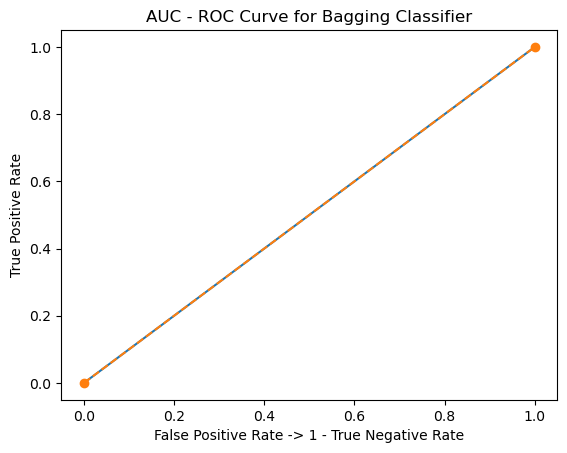

In [217]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], 'o--')
plt.title('AUC - ROC Curve for Bagging Classifier')
plt.xlabel('False Positive Rate -> 1 - True Negative Rate')
plt.ylabel('True Positive Rate')
plt.show()

## AdaBoost Classifier

In [218]:
model1=AdaBoostClassifier(base_estimator=RF_Final)
model1.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=2,
                                                         max_leaf_nodes=2))

In [219]:
ada_pred = model1.predict(x_test)

In [220]:
confusion_matrix(y_test, ada_pred)

array([[94,  0],
       [26,  0]], dtype=int64)

In [221]:
print(classification_report(y_test, ada_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        94
           1       0.00      0.00      0.00        26

    accuracy                           0.78       120
   macro avg       0.39      0.50      0.44       120
weighted avg       0.61      0.78      0.69       120



In [222]:
results=cross_val_score(model1,x_train,y_train,cv=KFold())
print(results.mean())

0.7895833333333333


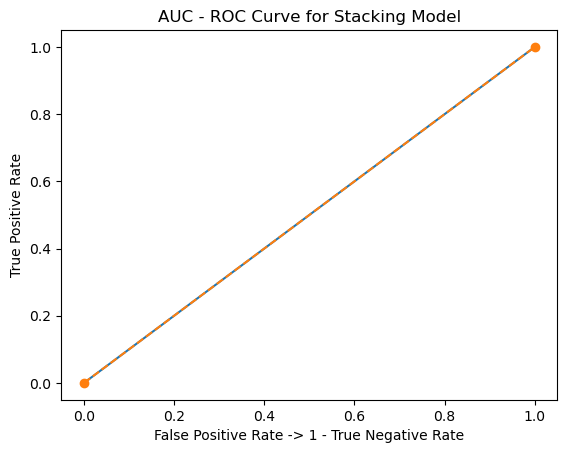

In [223]:
fpr, tpr, thresh = roc_curve(y_test, ada_pred)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], 'o--')
plt.title('AUC - ROC Curve for Stacking Model')
plt.xlabel('False Positive Rate -> 1 - True Negative Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Stacking Ensemble

In [224]:
estimators = []

In [225]:
model_1 = LogisticRegression()
estimators.append(('logreg', model_1))

In [226]:
model_2 = SVC()
estimators.append(('svm', model_2))

In [227]:
model_3 = DecisionTreeClassifier()
estimators.append(('dtree',model_3))

In [228]:
len(estimators)

3

In [229]:
ensemble = VotingClassifier(estimators)
ensemble.fit(x_train,y_train)

VotingClassifier(estimators=[('logreg', LogisticRegression()), ('svm', SVC()),
                             ('dtree', DecisionTreeClassifier())])

In [230]:
st_pred = ensemble.predict(x_test)

In [231]:
confusion_matrix(y_test, st_pred)

array([[94,  0],
       [26,  0]], dtype=int64)

In [232]:
print(classification_report(y_test, st_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        94
           1       0.00      0.00      0.00        26

    accuracy                           0.78       120
   macro avg       0.39      0.50      0.44       120
weighted avg       0.61      0.78      0.69       120



In [233]:
results=cross_val_score(ensemble,x_train,y_train,cv=KFold())
print(results.mean())

0.7958333333333334


In [234]:
fpr,tpr,thresh = roc_curve(y_test,st_pred)

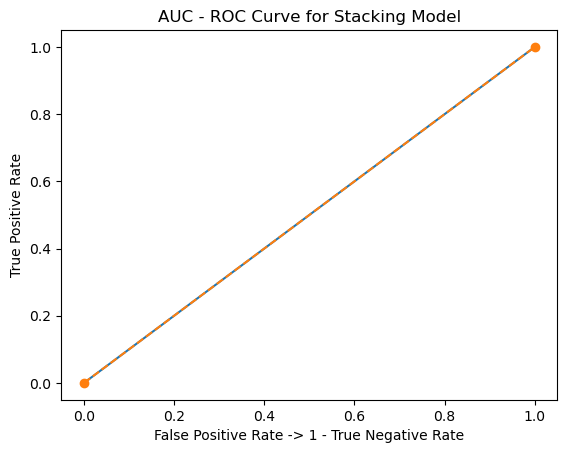

In [235]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], 'o--')
plt.title('AUC - ROC Curve for Stacking Model')
plt.xlabel('False Positive Rate -> 1 - True Negative Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Decision Tree

In [236]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth= 2, max_leaf_nodes= 2)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=2)

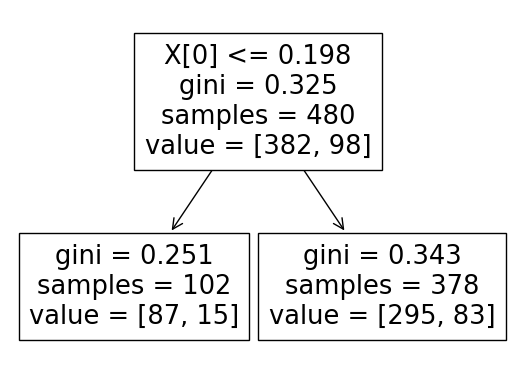

In [237]:
tree.plot_tree(model_gini);

In [238]:
features = X.columns.values
features

array(['City.Population', 'Work.Experience', 'Urban_YES', 'Undergrad_YES',
       'Maritial'], dtype=object)

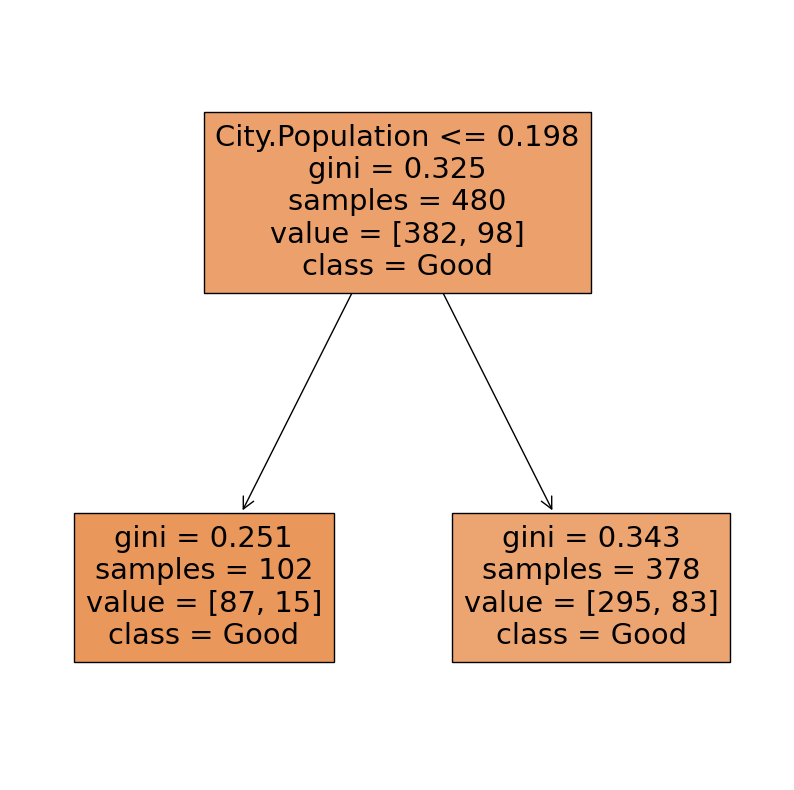

In [239]:
classes = ['Good','Risky']
fig, axes = plt.subplots(figsize = (10,10))
tree.plot_tree(model_gini, feature_names=features, class_names=classes, filled=True )
plt.show()

In [240]:
train_predicted1 = model_gini.predict(x_train)

In [241]:
confusion_matrix(y_train, train_predicted1)

array([[382,   0],
       [ 98,   0]], dtype=int64)

In [242]:
test_predicted1 = model_gini.predict(x_test)

In [243]:
confusion_matrix(y_test, test_predicted1)

array([[94,  0],
       [26,  0]], dtype=int64)

In [244]:
print(classification_report(y_train, train_predicted1))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       382
           1       0.00      0.00      0.00        98

    accuracy                           0.80       480
   macro avg       0.40      0.50      0.44       480
weighted avg       0.63      0.80      0.71       480



In [245]:
print(classification_report(y_test, test_predicted1))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        94
           1       0.00      0.00      0.00        26

    accuracy                           0.78       120
   macro avg       0.39      0.50      0.44       120
weighted avg       0.61      0.78      0.69       120



In [246]:
test_predicted1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [247]:
## For better understanding than confusion matrix
pd.crosstab(y_test,test_predicted1)

col_0   0
row_0    
0      94
1      26

>> 0 means Good and 1 mean Risky